In [1]:
import pandas as pd
df = pd.read_excel('df2_data.xlsx')
df.to_csv('df2_data.csv', index=False)


In [2]:
import pandas as pd
df = pd.read_csv('df2_data.csv')
df.head()


Age at presentation (in yrs)  Age at last follow up  Sex (m/f)  Religion  \
0                           8.0                   10.0          0  0.000000   
1                          17.0                   18.0          0  0.000000   
2                           7.0                   17.0          1  0.000000   
3                          10.0                   10.0          1  0.333333   
4                           8.0                   15.0          0  0.000000   

   Max education attained  Rural/Urban  Distance from LGBRIMH (in KM)  \
0                     0.0          0.5                           62.0   
1                     0.4          0.5                           55.0   
2                     0.0          0.5                          102.0   
3                     0.4          0.5                           29.0   
4                     0.0          0.5                          102.0   

   Socioeconomic status  Age at onset(in years)  \
0                  0.00                     8.0   
1                  0.00                    17.0   
2                  0.00                     5.5   
3                  0.33                     0.0   
4                  0.33                     5.5   

   Time period between onset to first consultation at LGBRIMH (DUI) (in days)  \
0                                                150                            
1                                                  3                            
2                                                  0                            
3                                                 10                            
4                                                912                            

   ...  anxious  hallucination  depressed  seizure  adhd  depression1  \
0  ...        0              0          0        1     0            0   
1  ...        0              0          0        1     0            0   
2  ...        0              0          0        1     0            0   
3  ...        0              0          0        0     1            0   
4  ...        0              0          0        1     0            0   

   School Adjustment  \
0               0.00   
1               0.66   
2               0.00   
3               1.00   
4               0.00   

   If yes, after how many days from first presentation diagnosis changed (in days)  \
0                                                  0                                 
1                                                  0                                 
2                                                  0                                 
3                                                  0                                 
4                                                  0                                 

   Continued medication 1/stopped/changed  depression2  
0                                       4            0  
1                                       4            0  
2                                       3            0  
3                                       4            0  
4                                       3            0  

[5 rows x 63 columns]

In [3]:
df4 = df

In [4]:
import pandas as pd
sorted_df = pd.read_excel('sorted_merged_results.xlsx')
selected_features = sorted_df['Column Name'].tolist()[:30]
df4= df4[selected_features]


In [5]:
df4['Final'] = df['Final']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8888\4197094083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Final'] = df['Final']


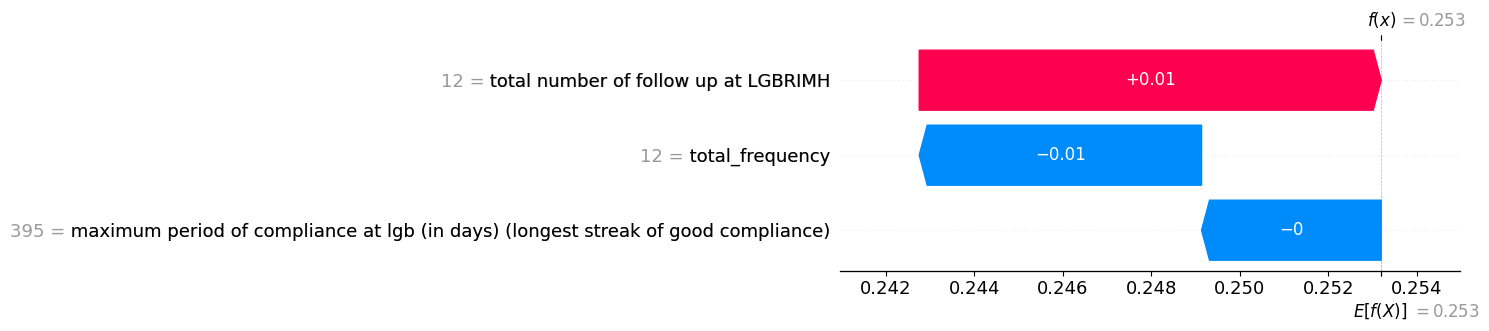

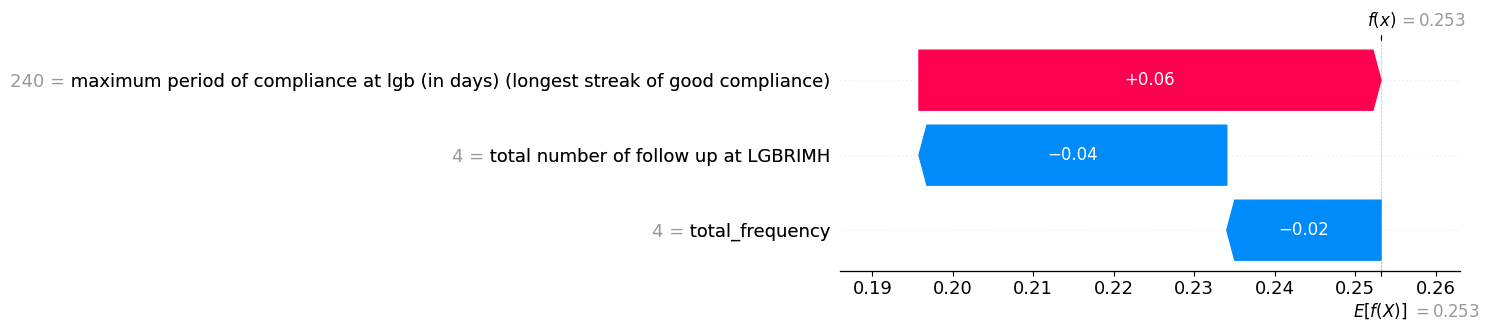

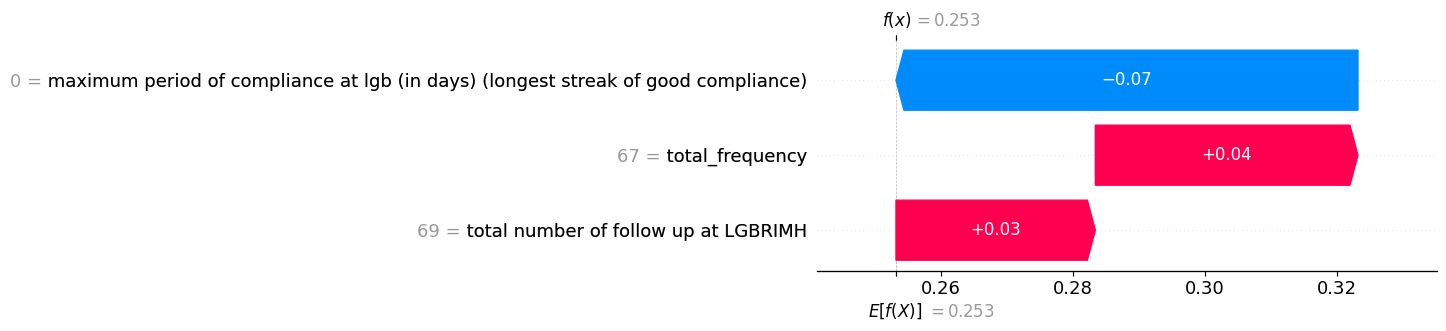

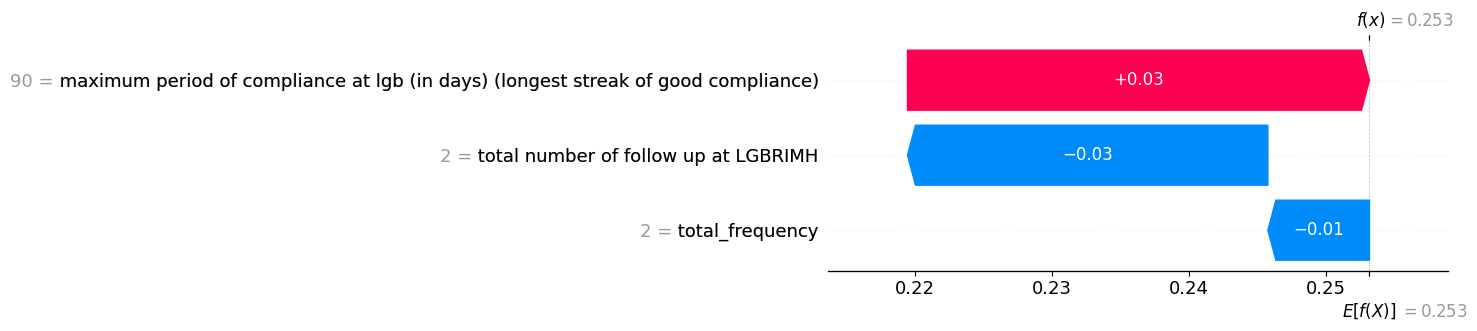

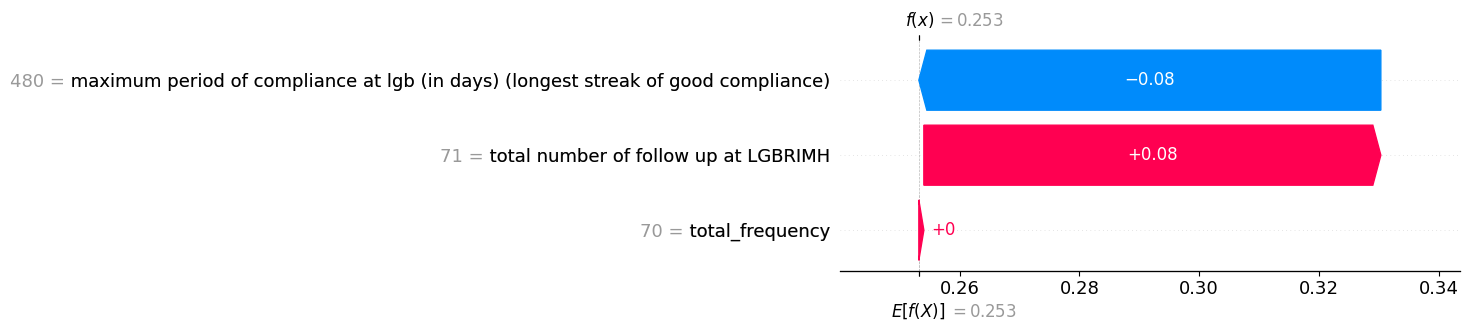

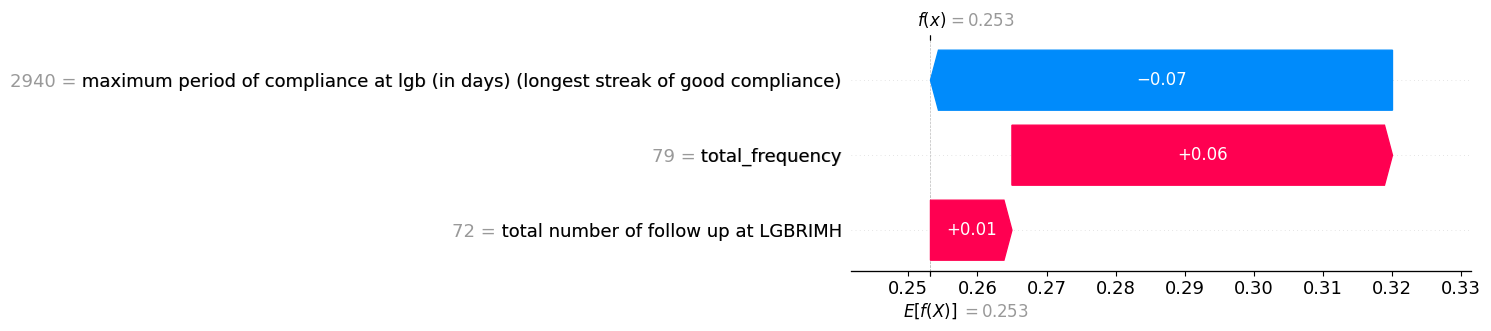

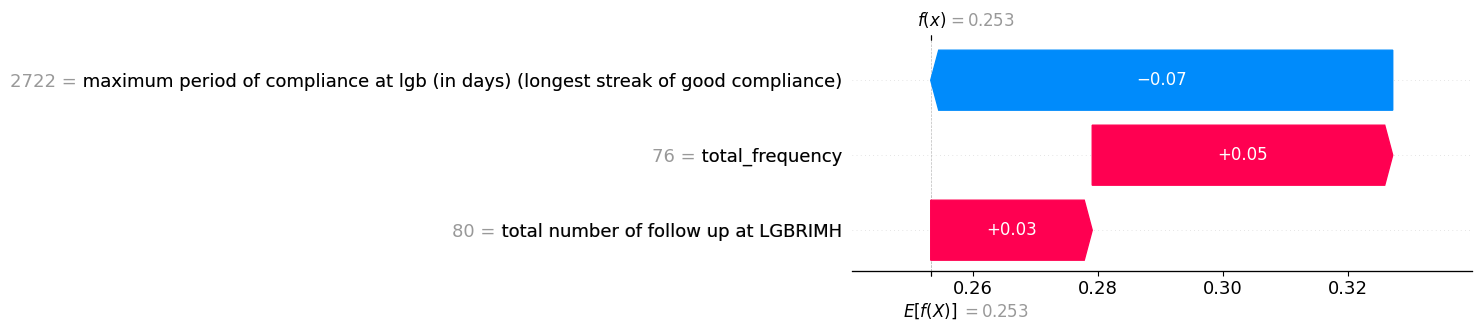

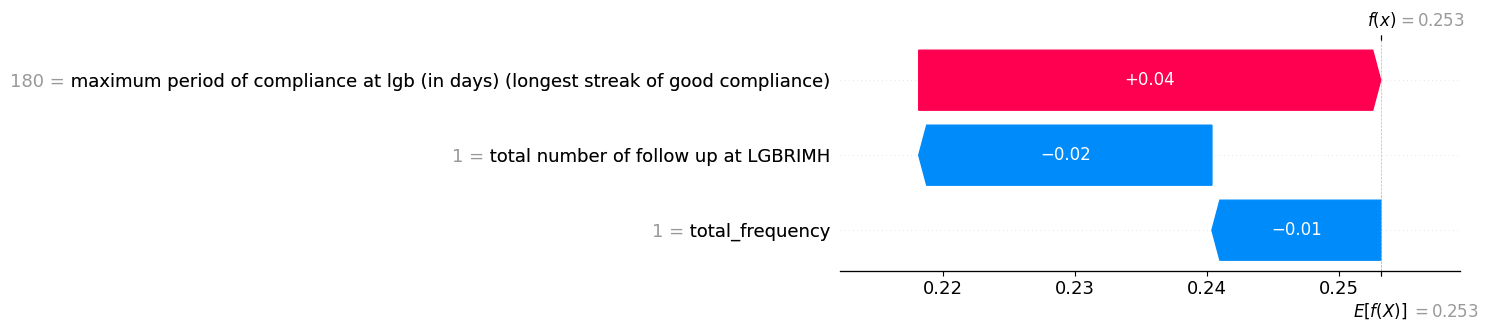

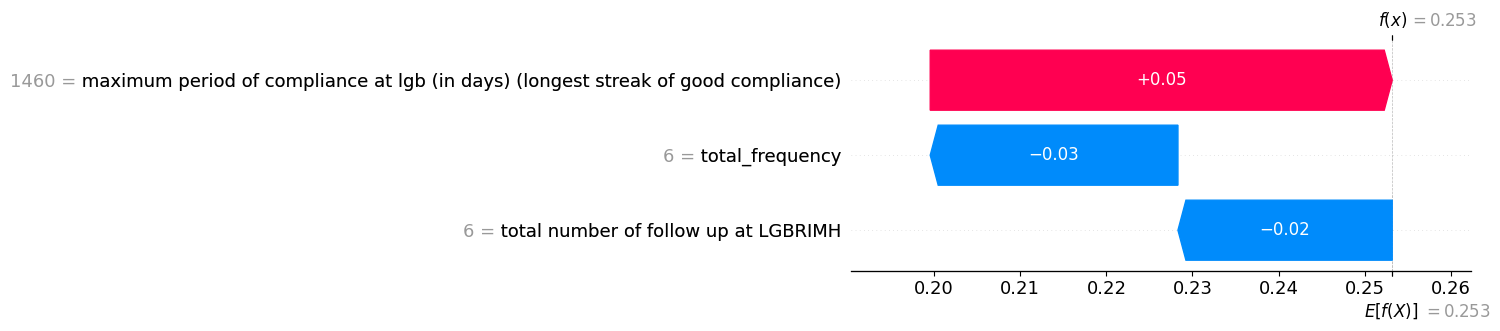

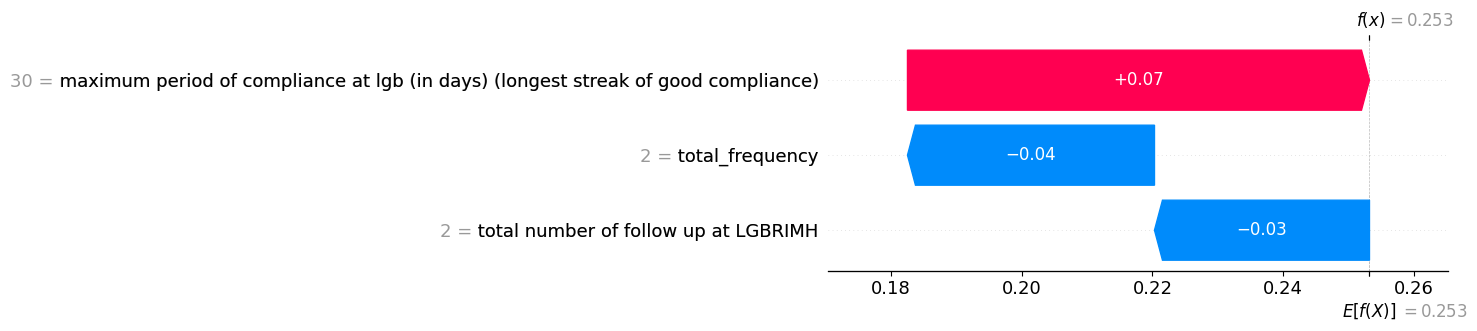

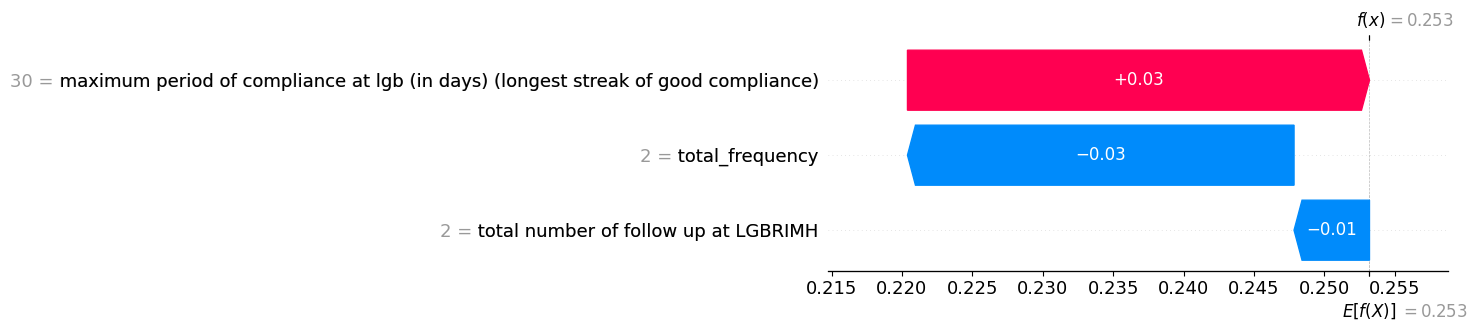

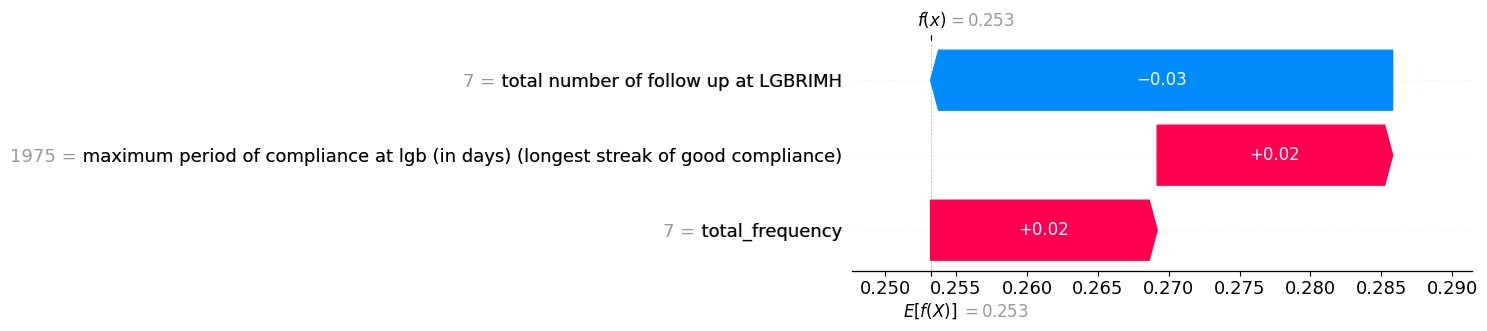

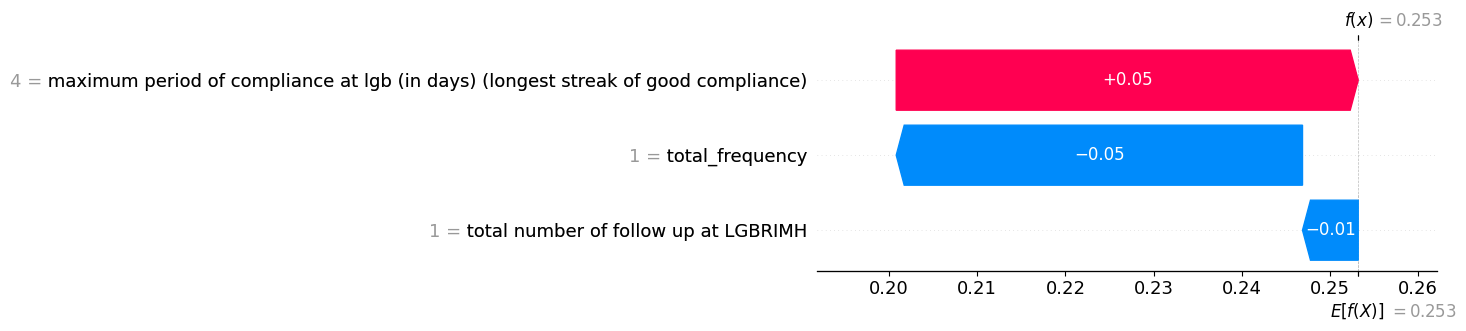

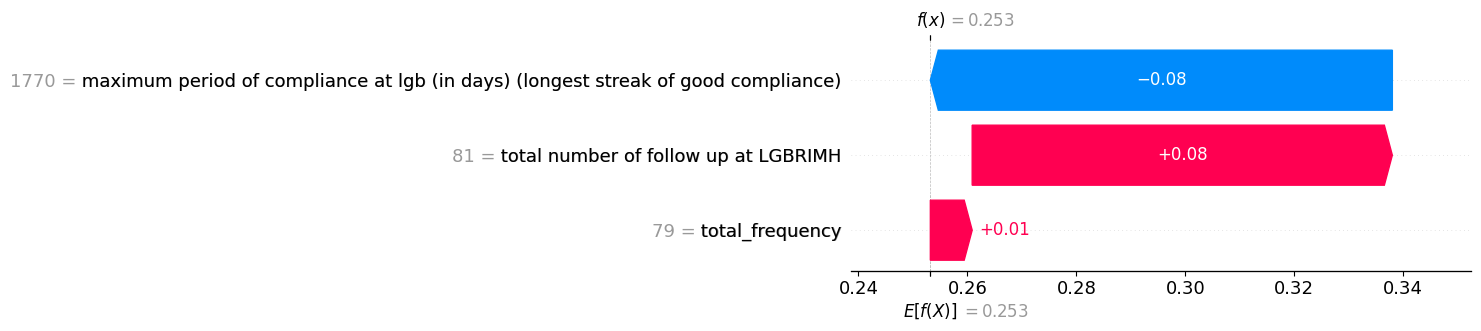

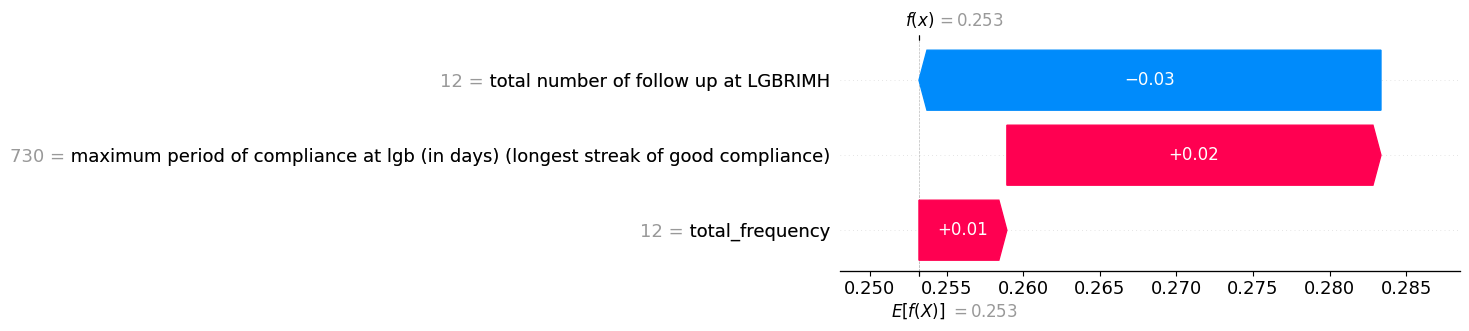

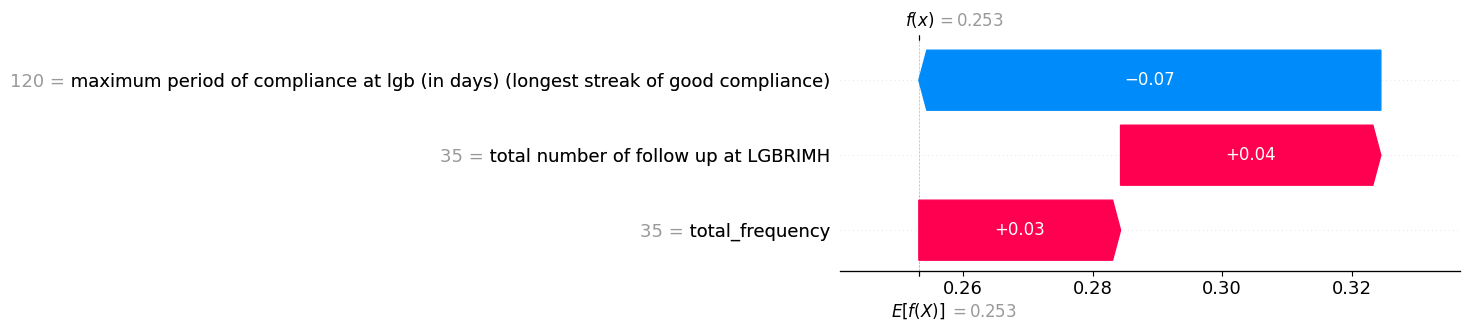

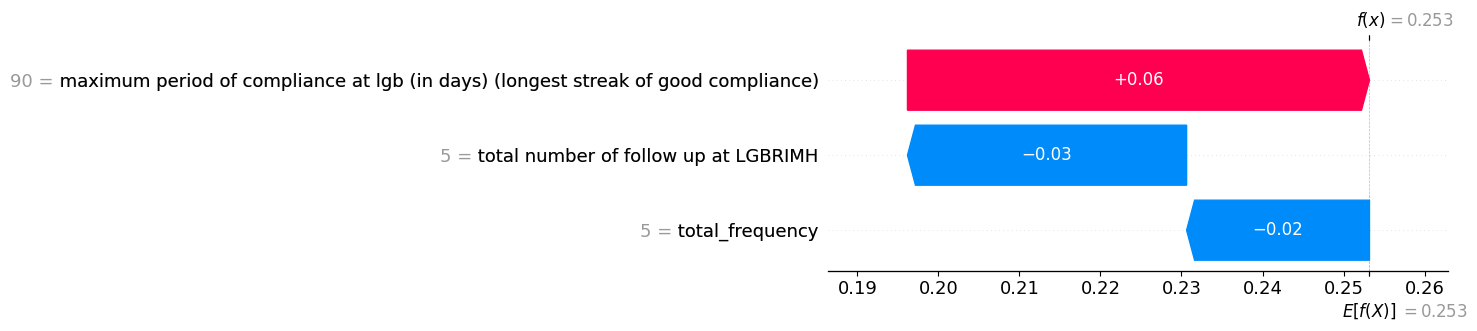

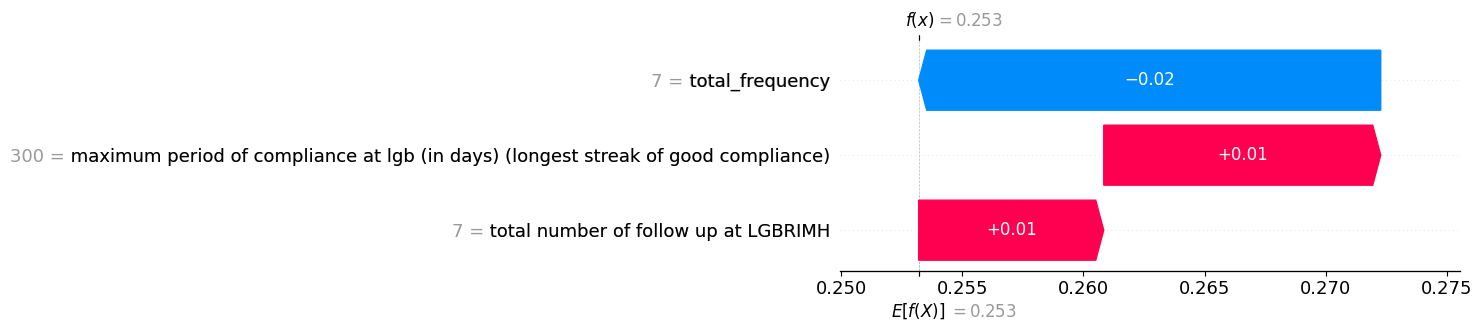

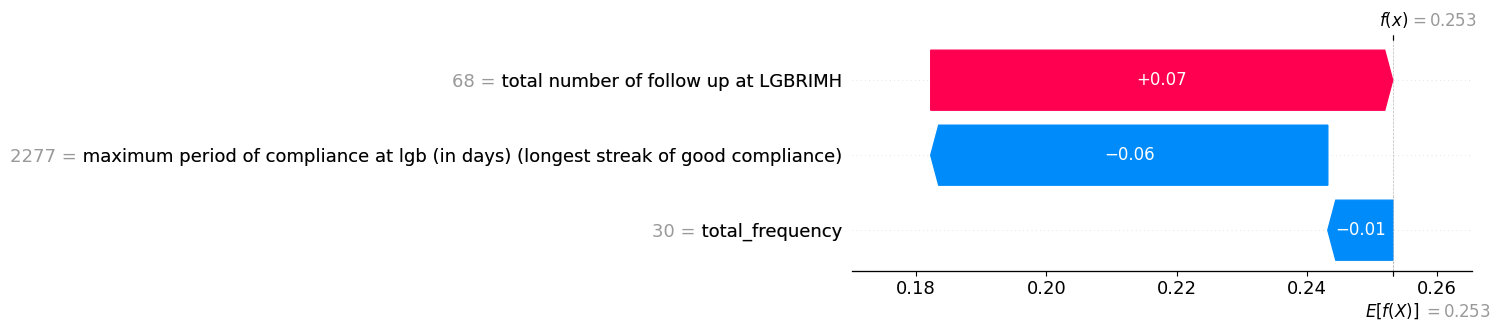

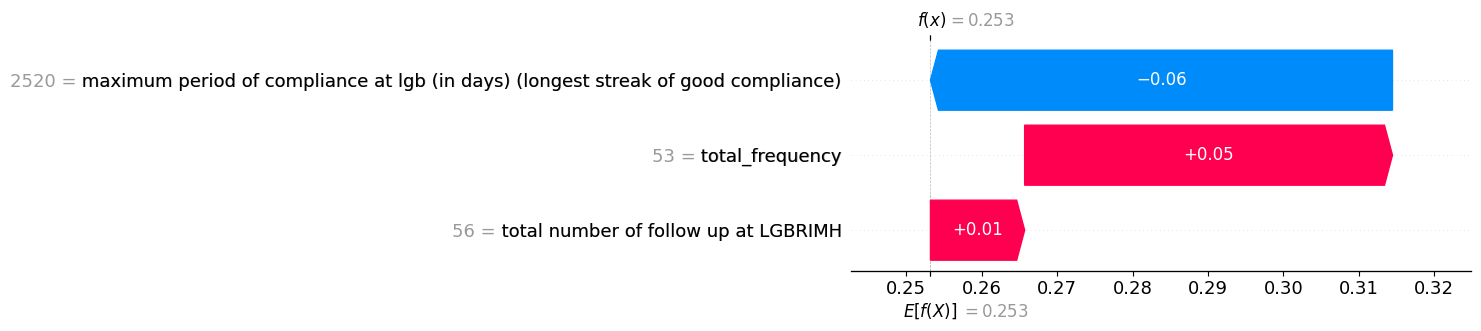

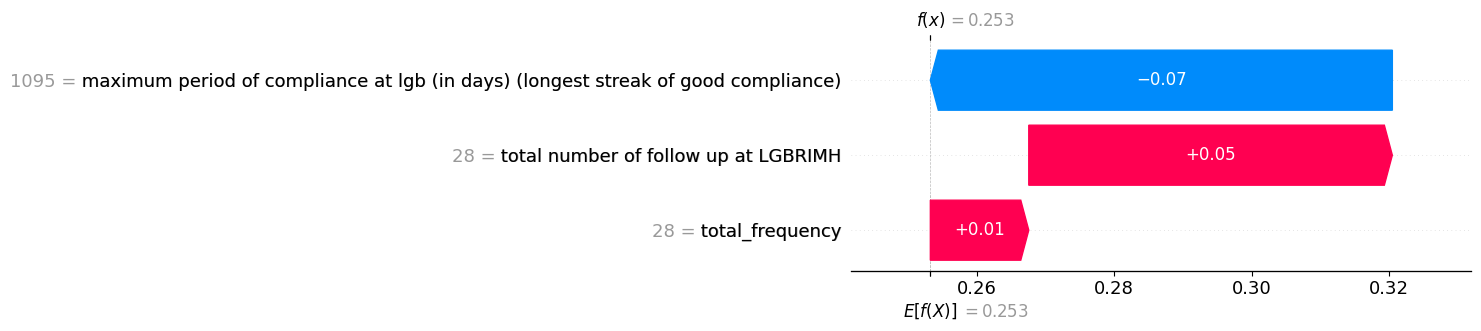

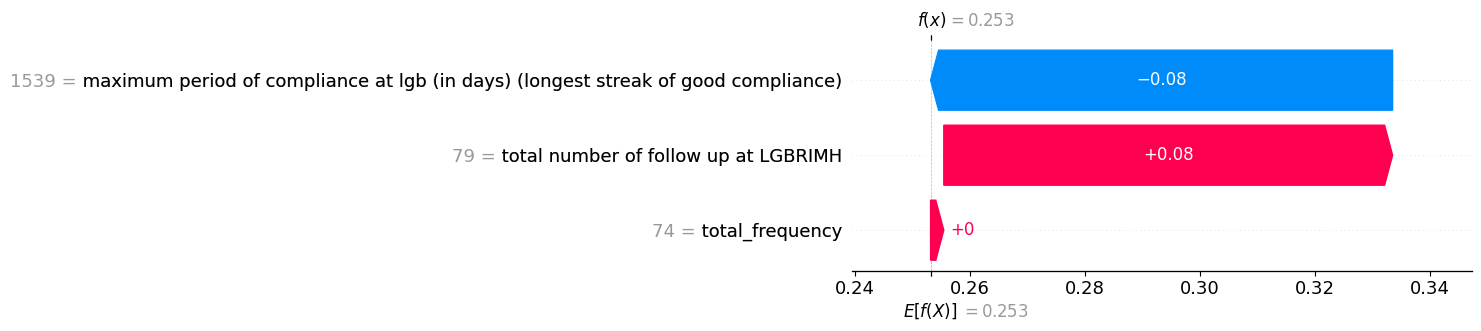

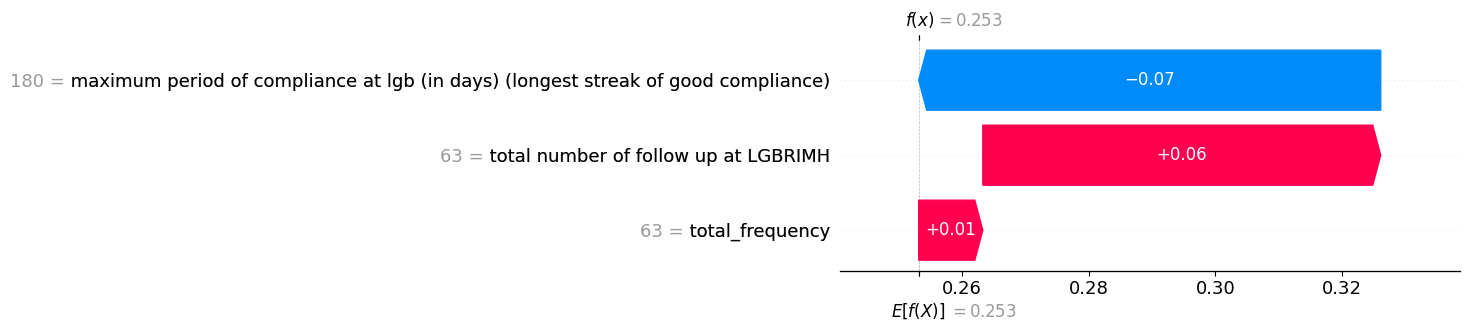

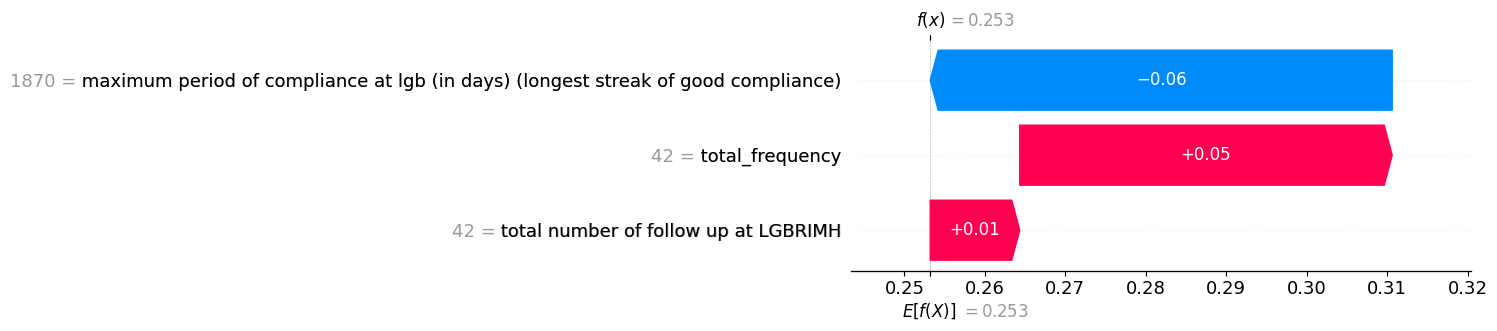

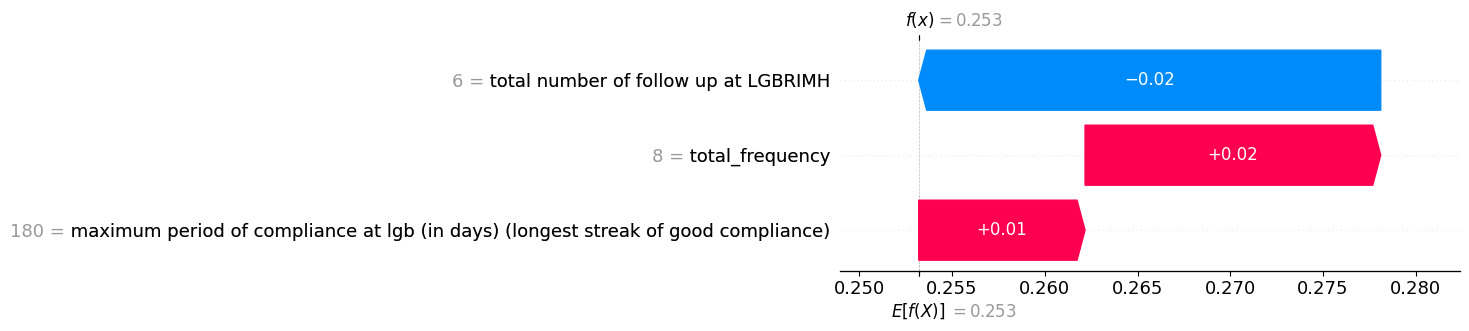

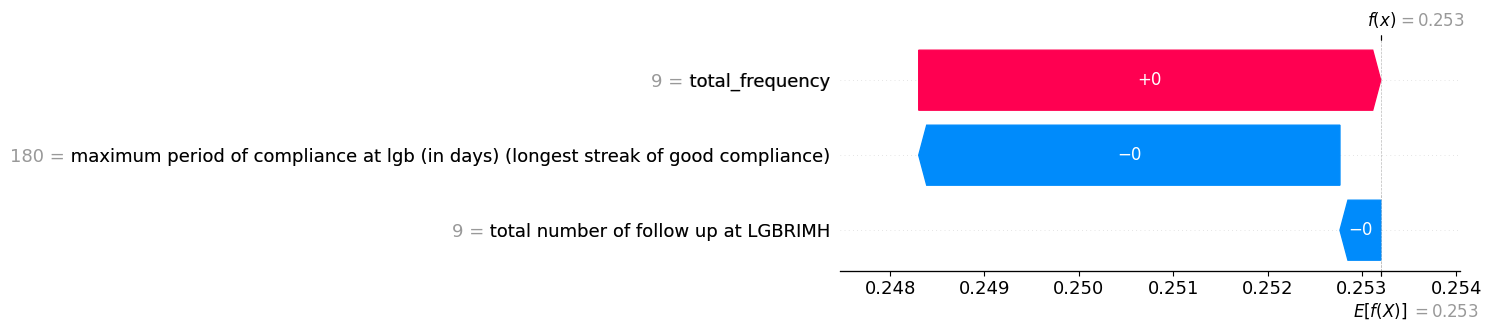

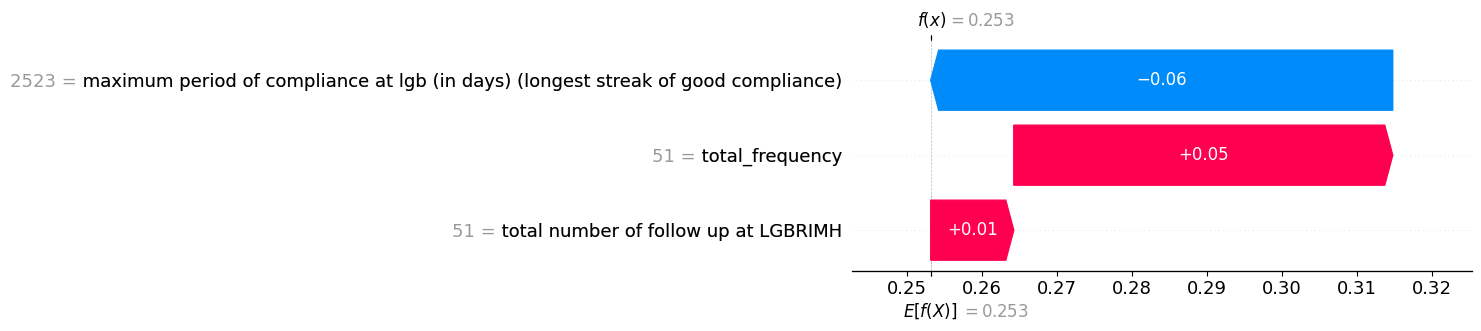

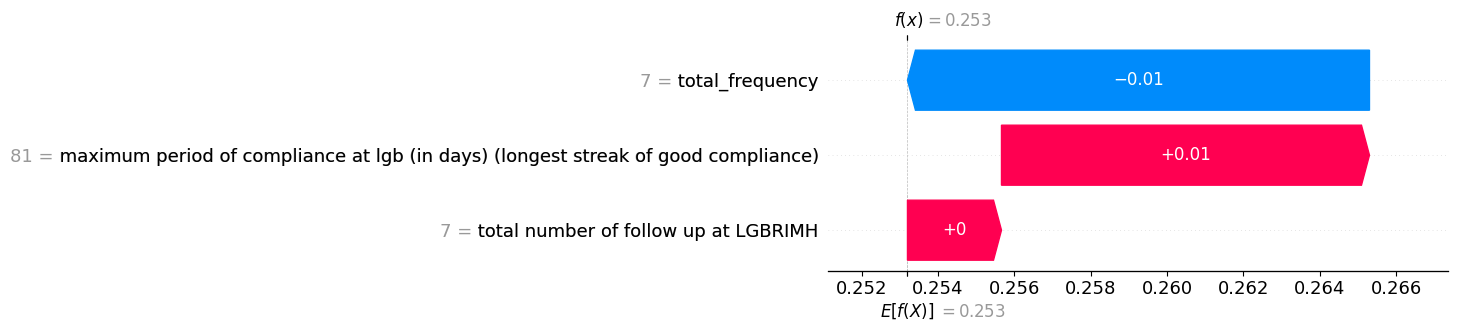

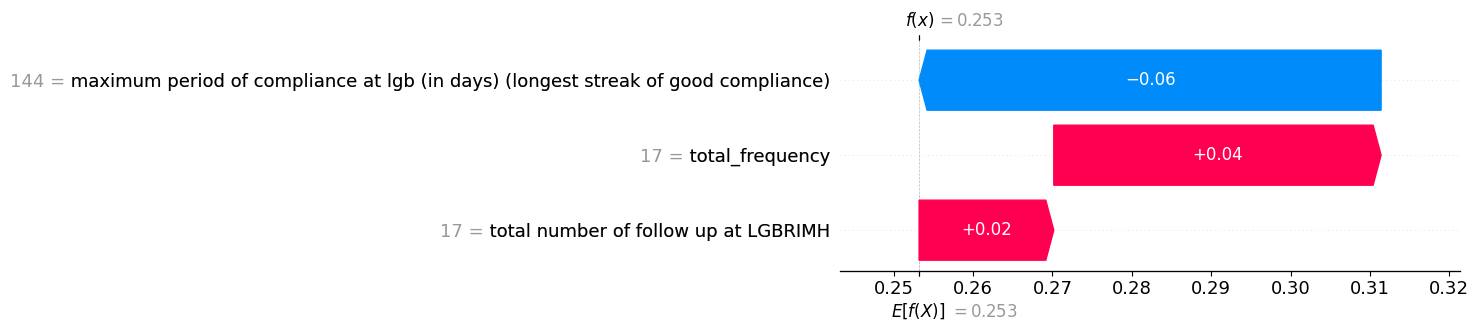

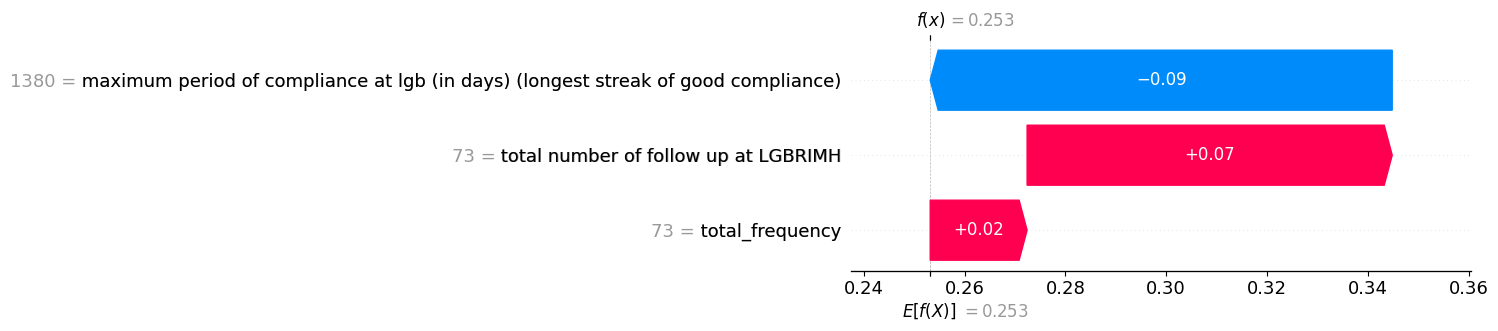

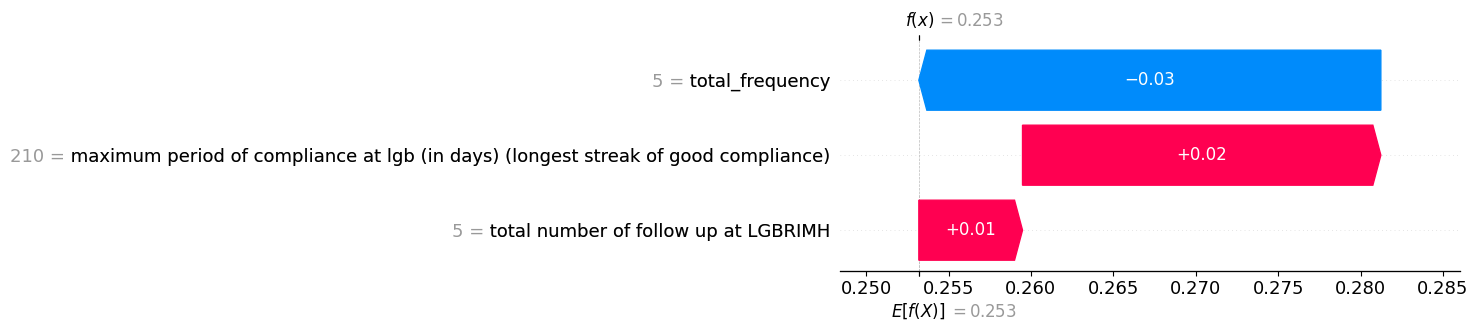

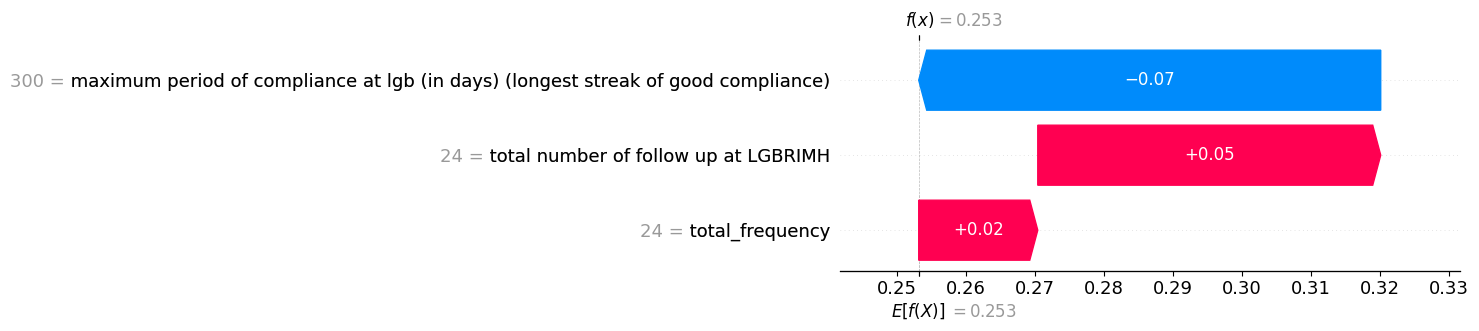

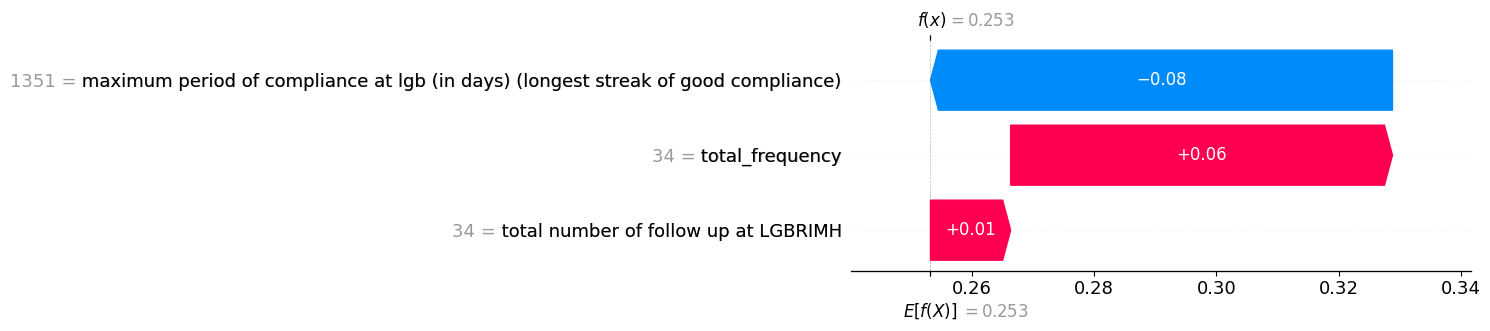

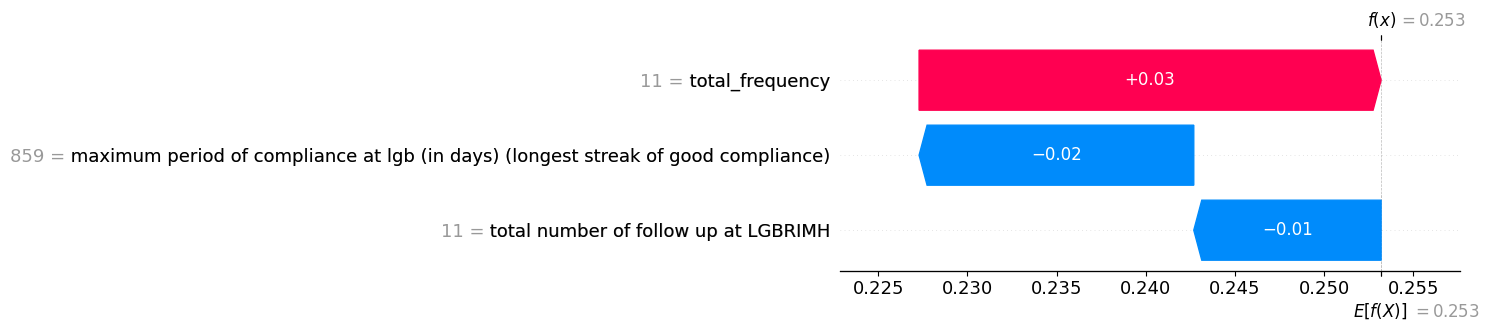

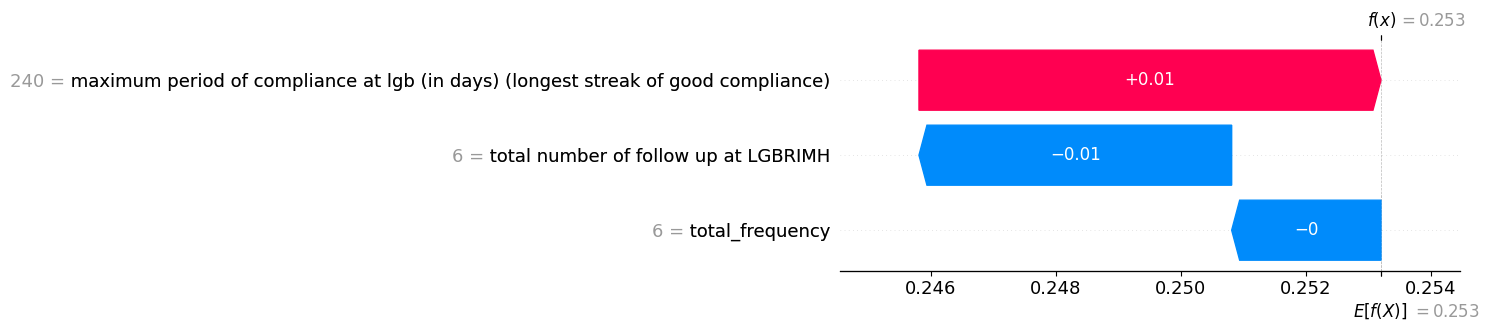

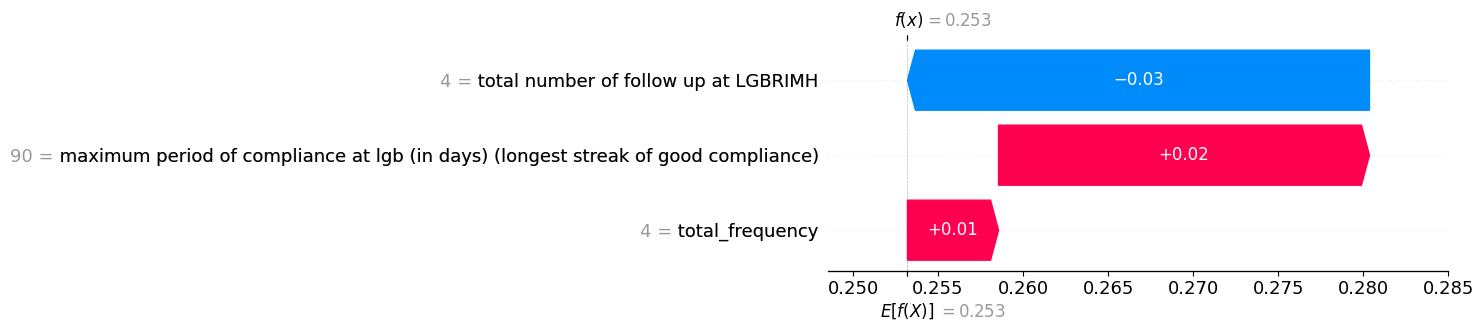

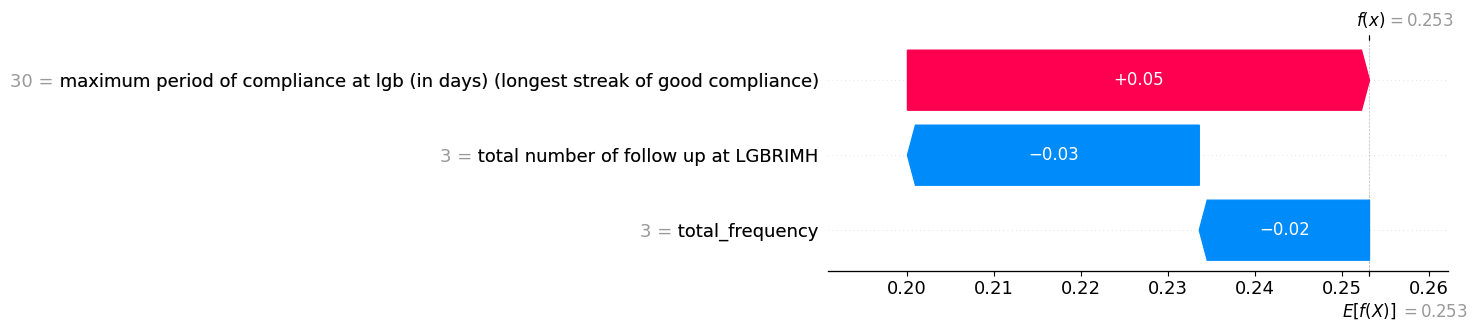

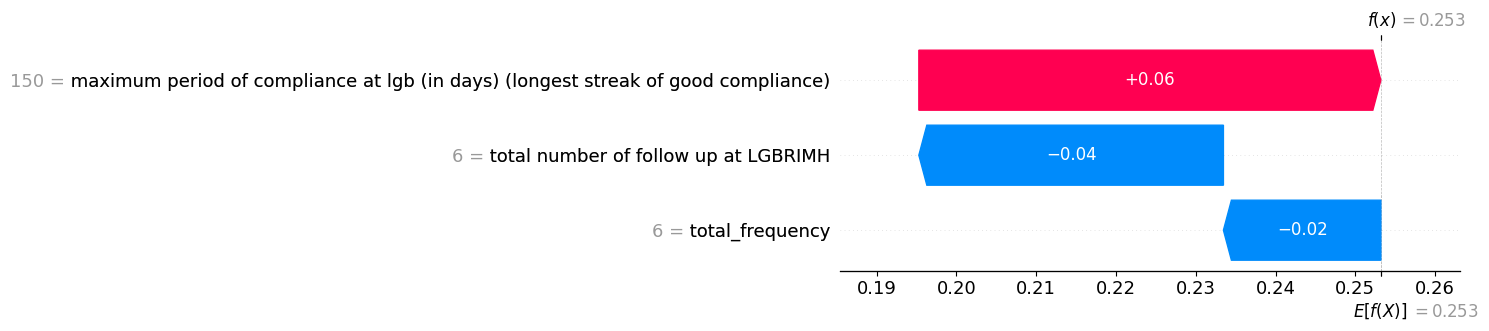

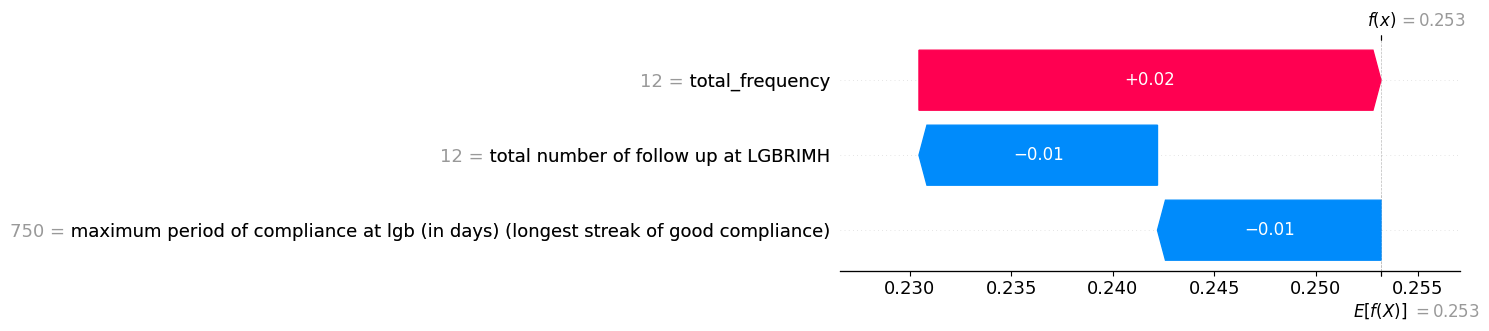

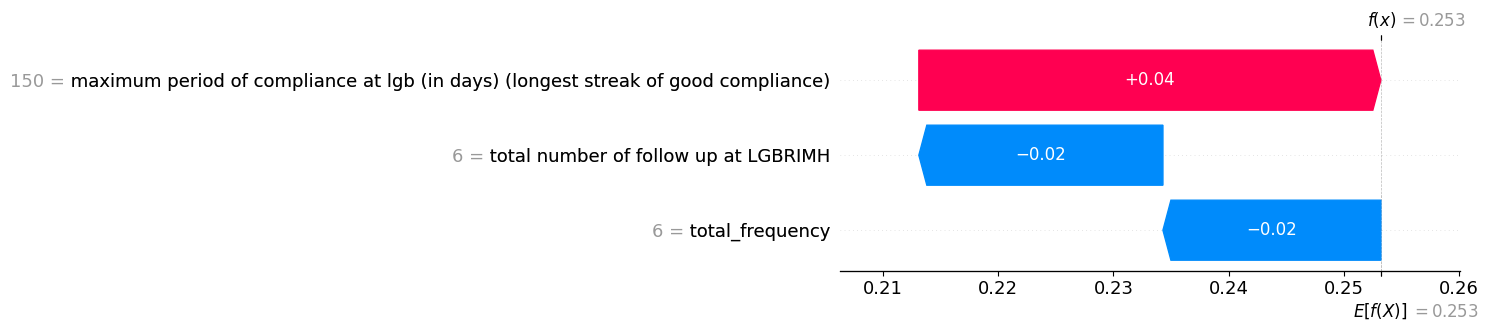

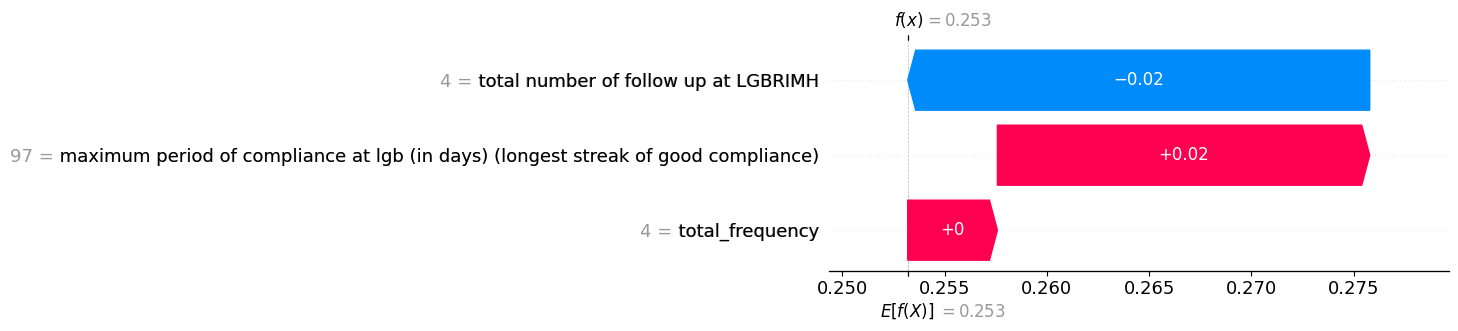

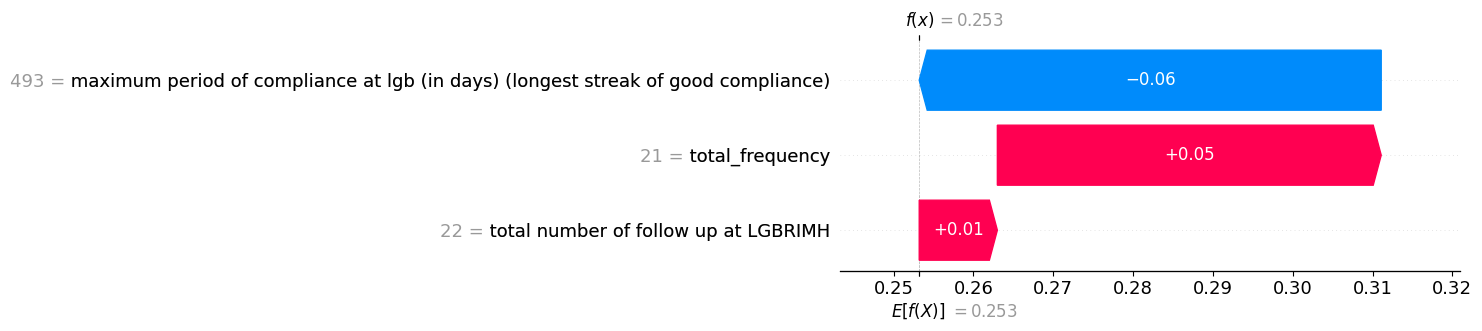

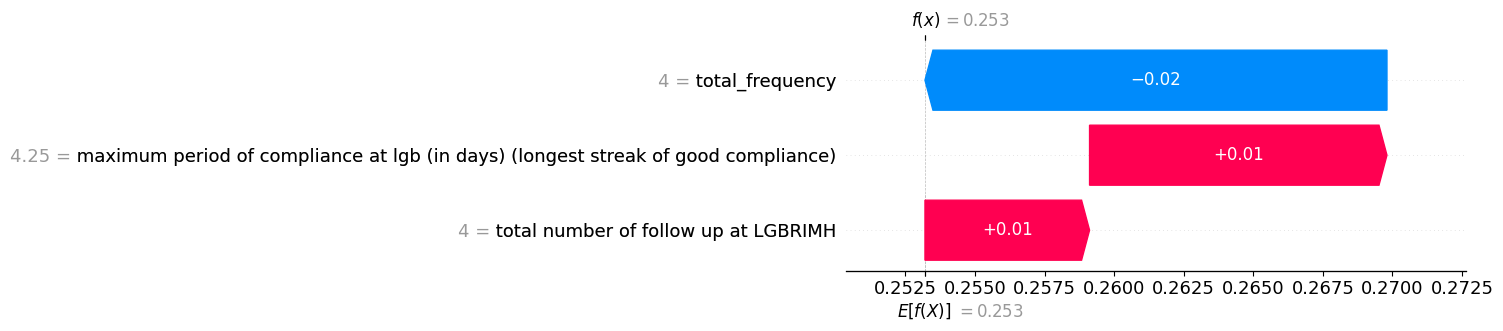

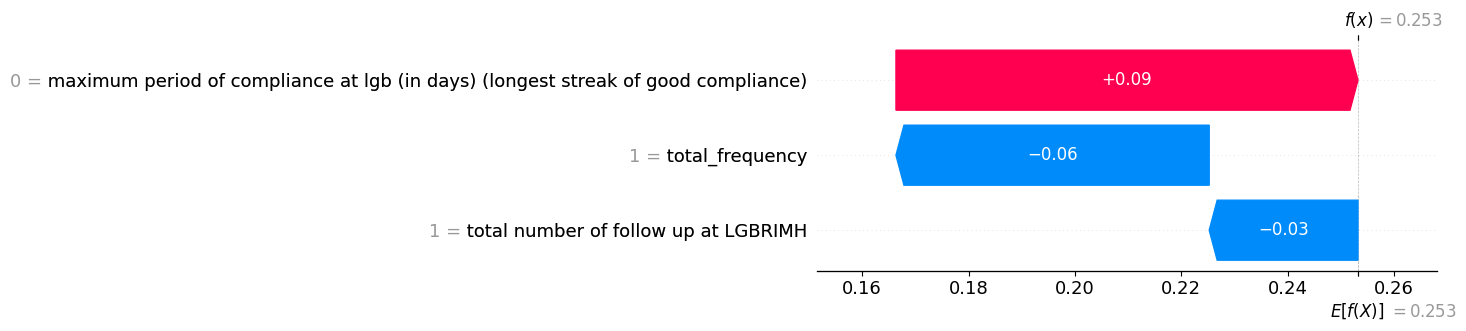

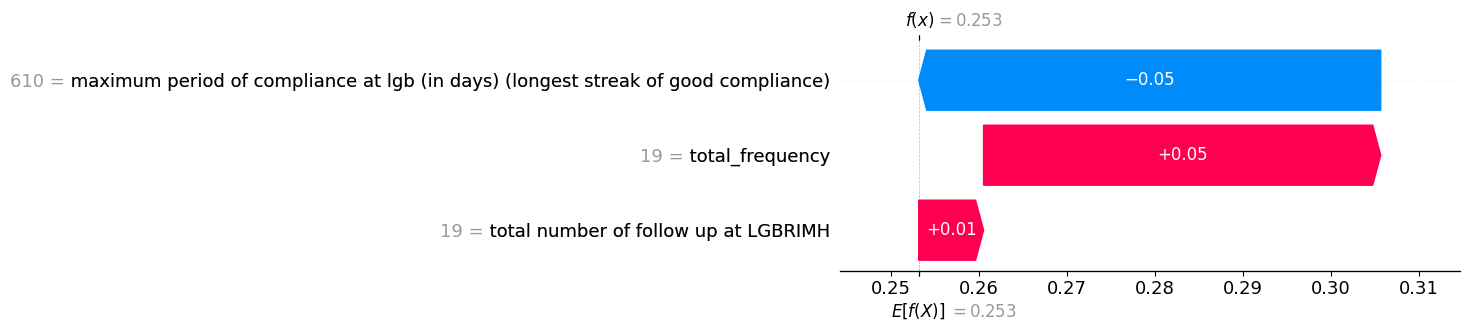

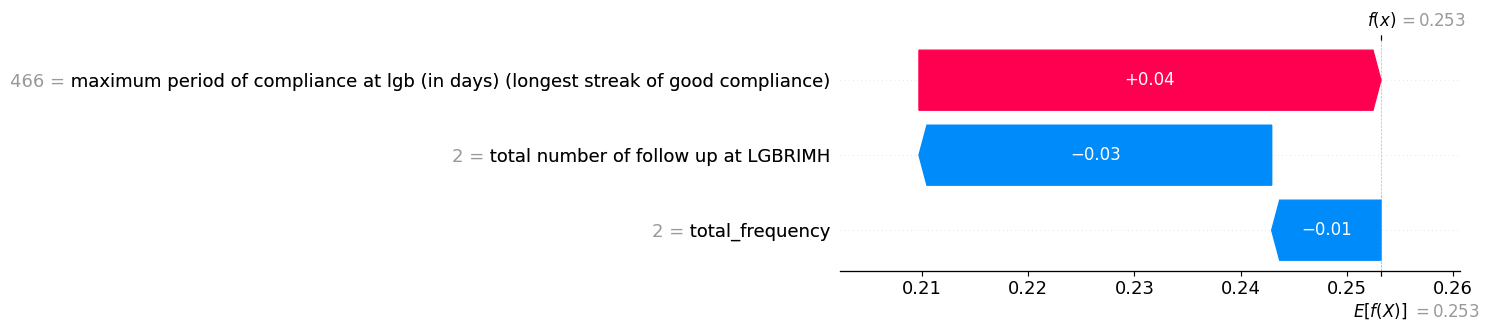

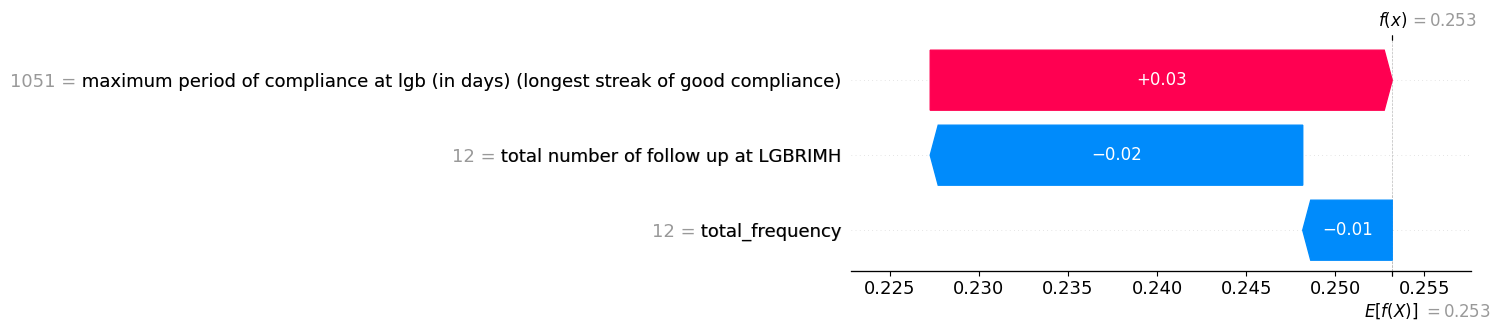

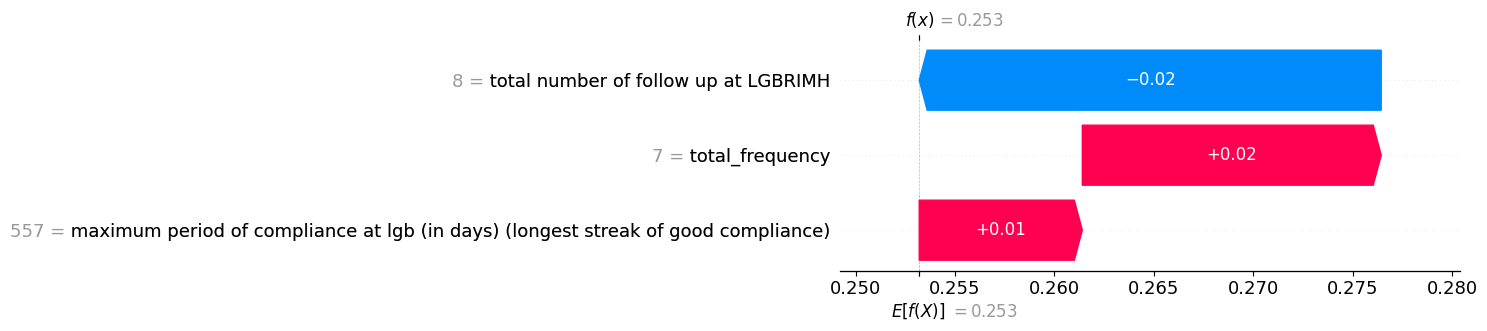

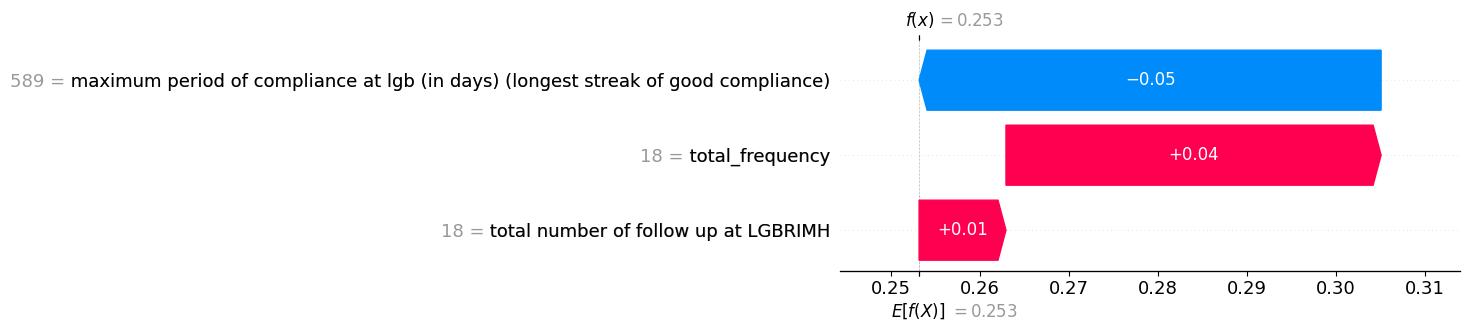

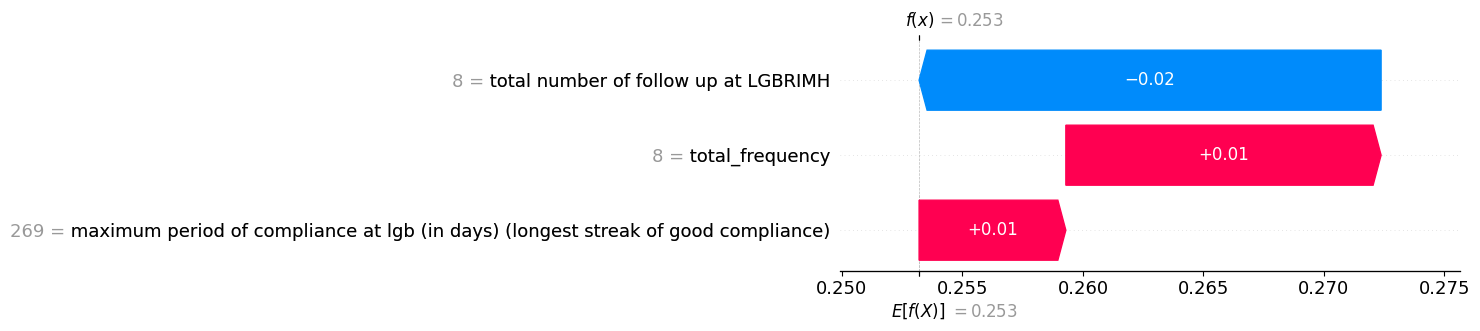

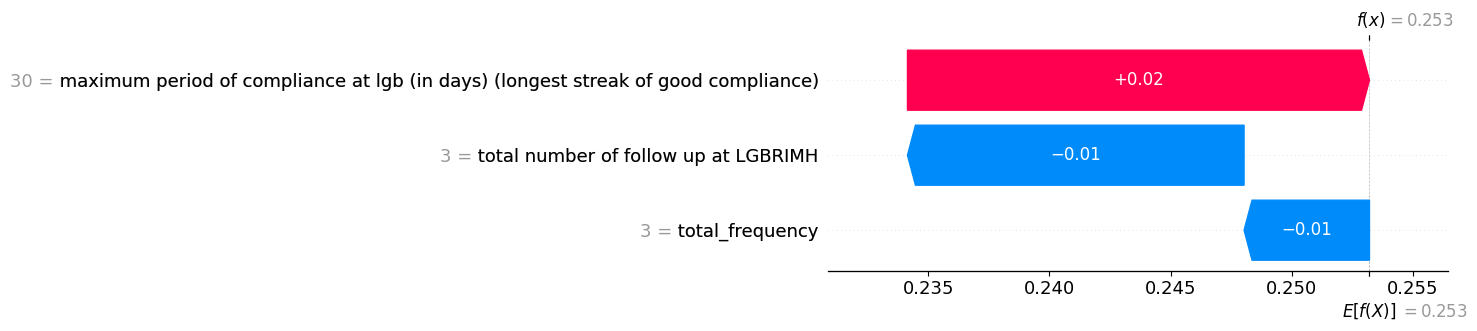

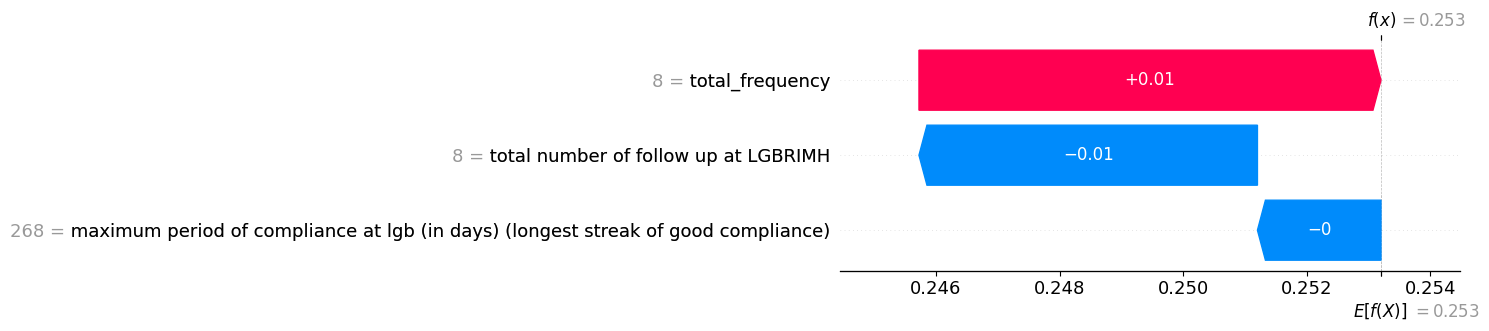

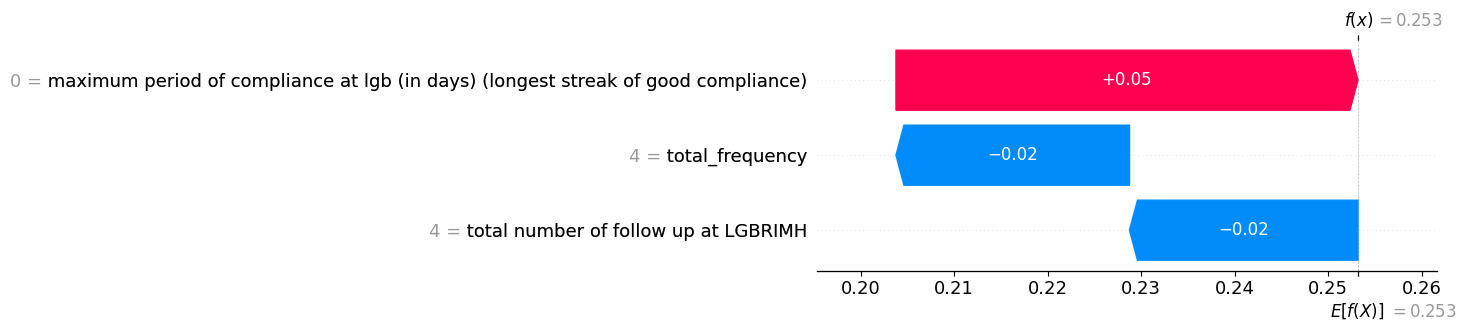

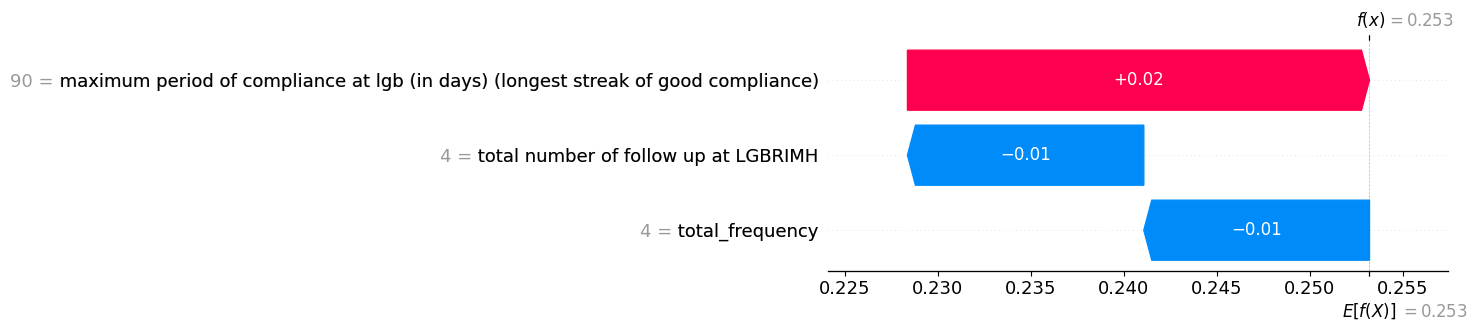

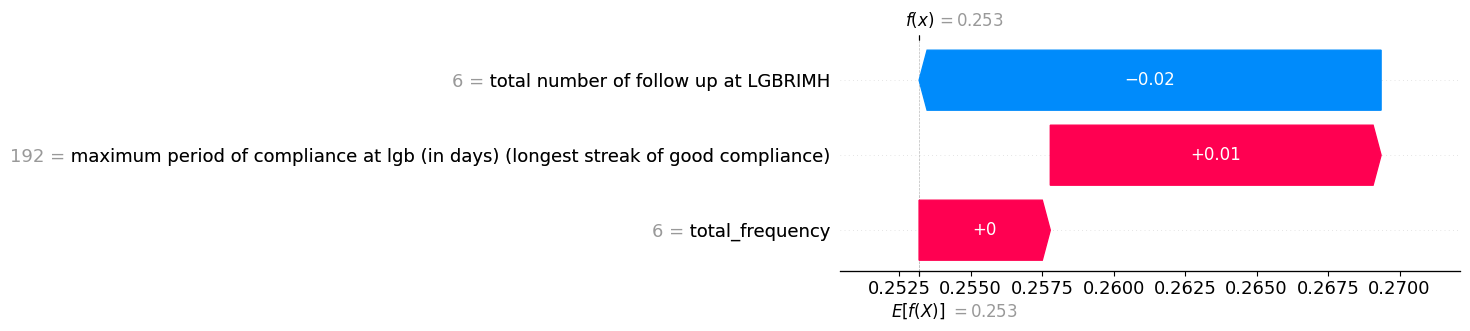

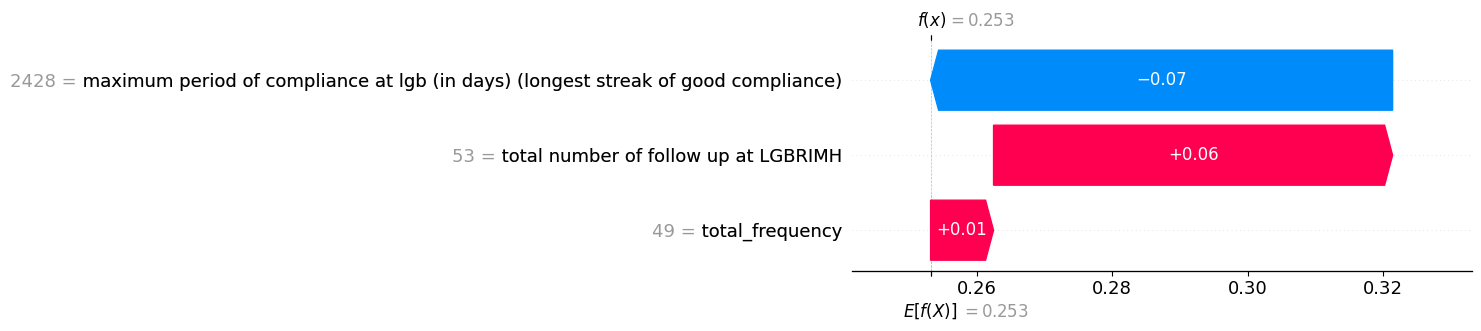

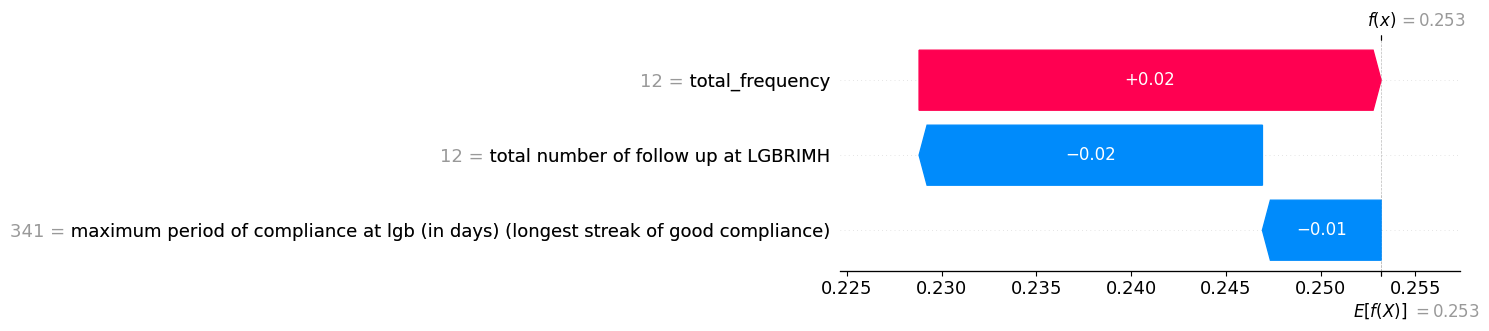

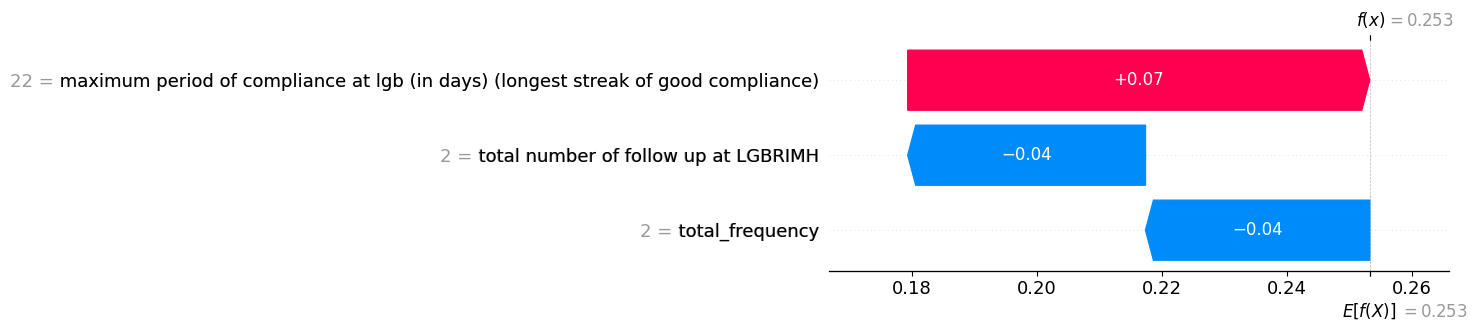

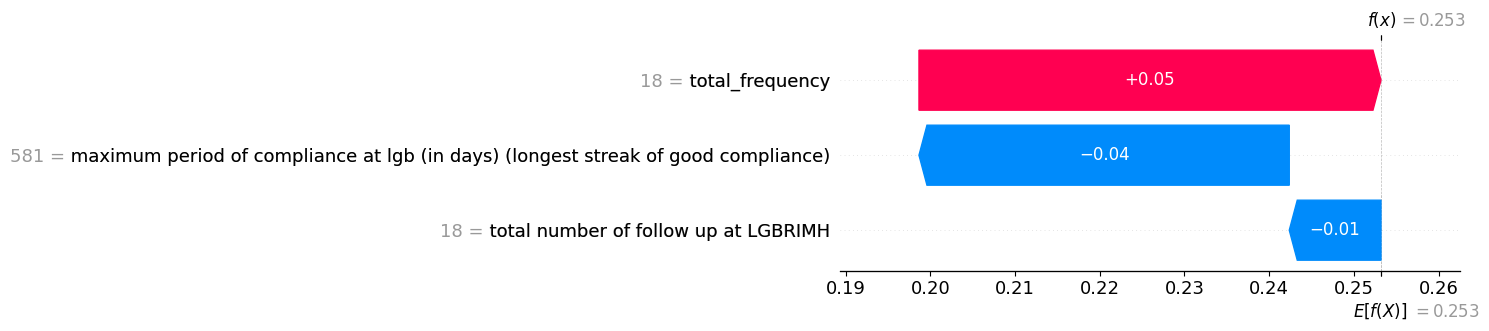

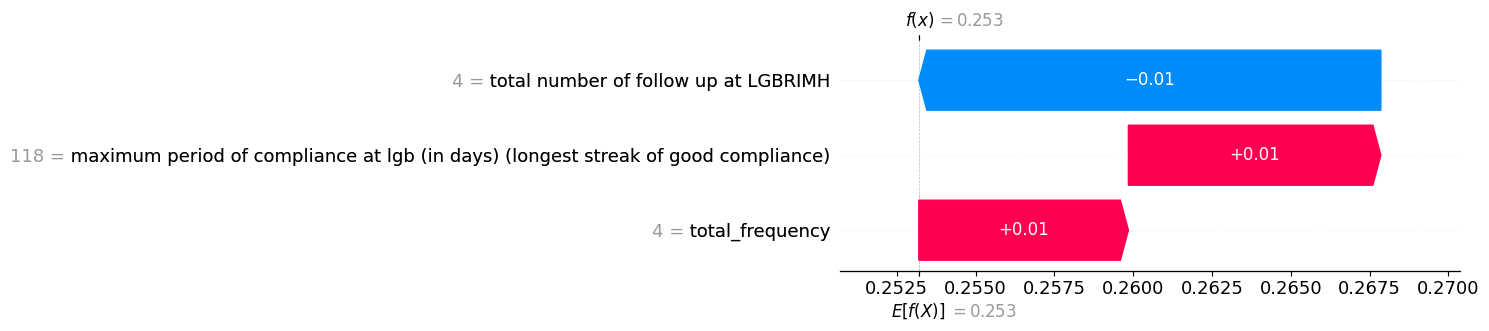

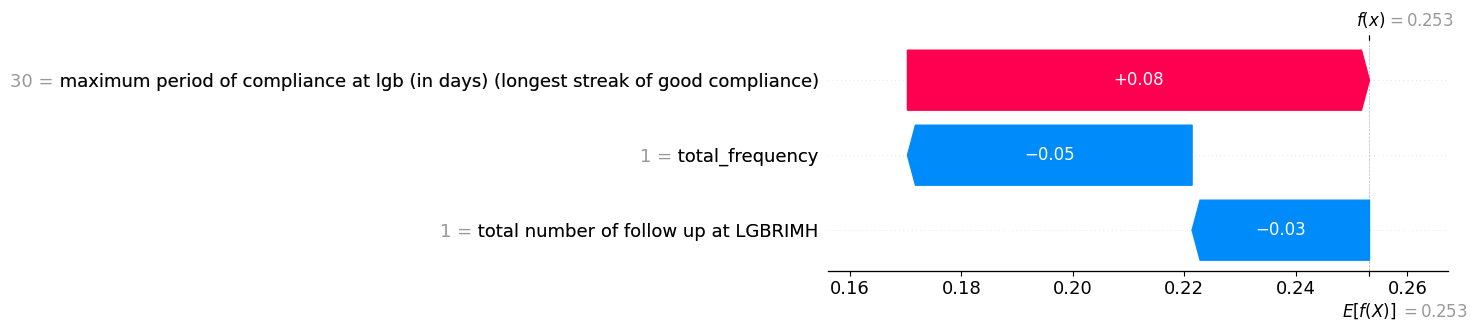

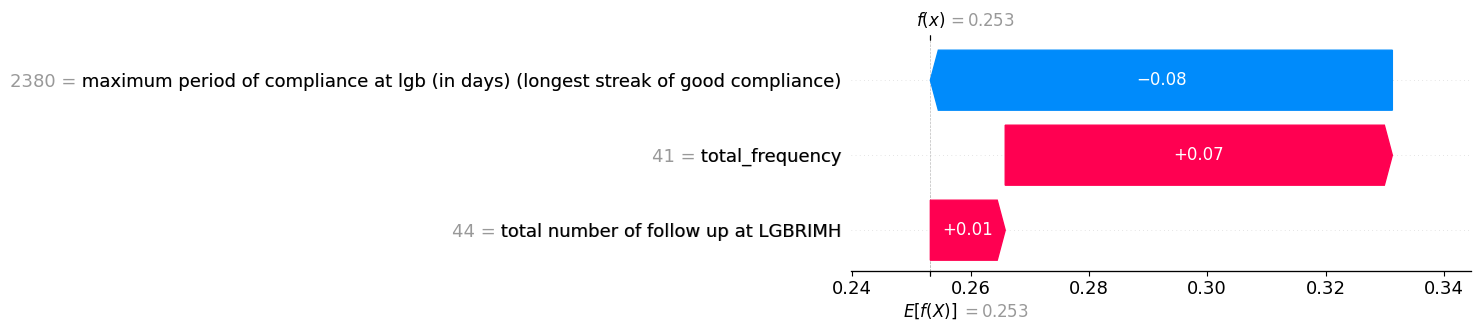

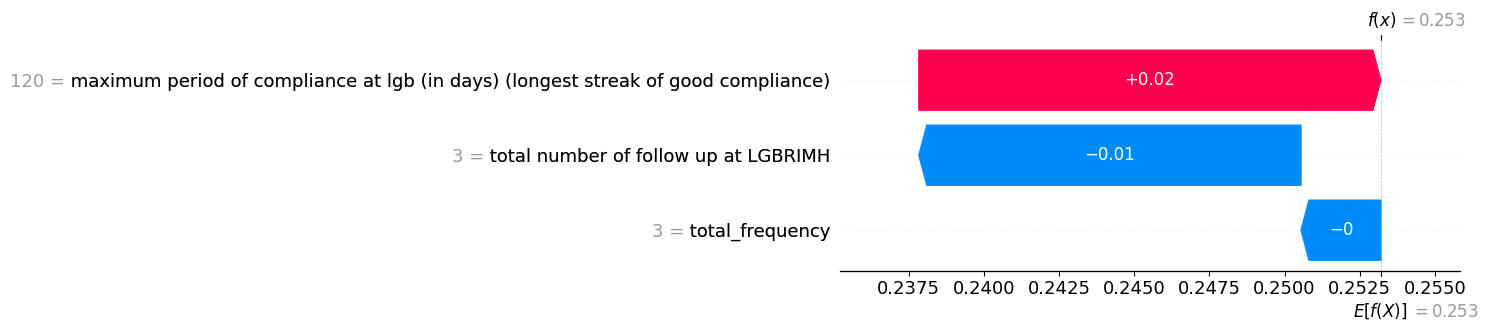

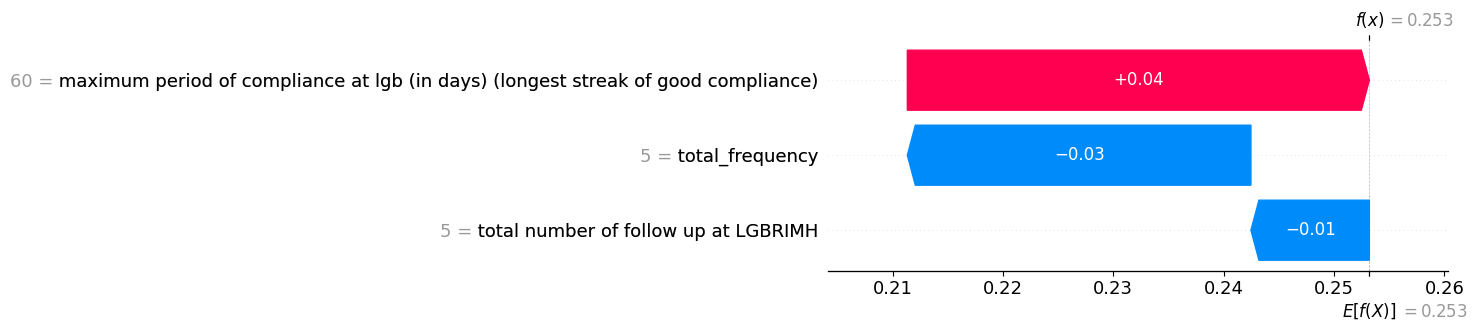

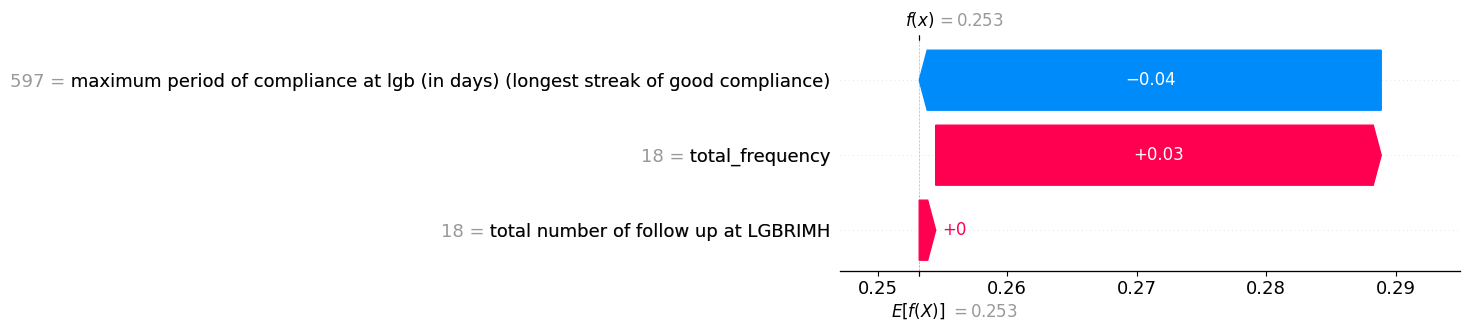

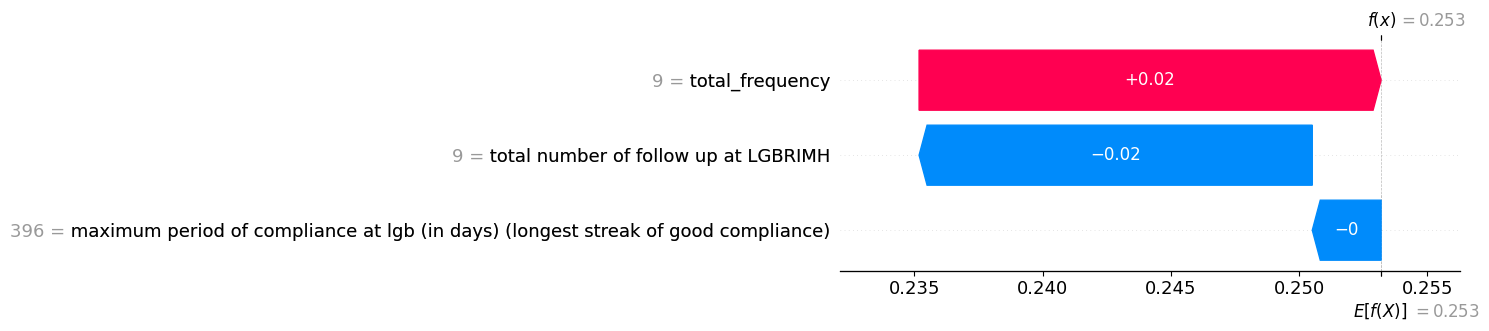

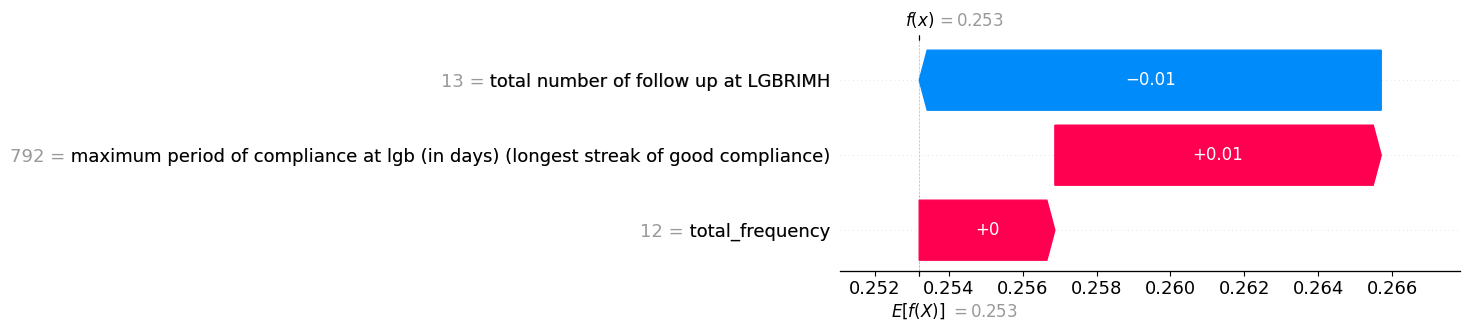

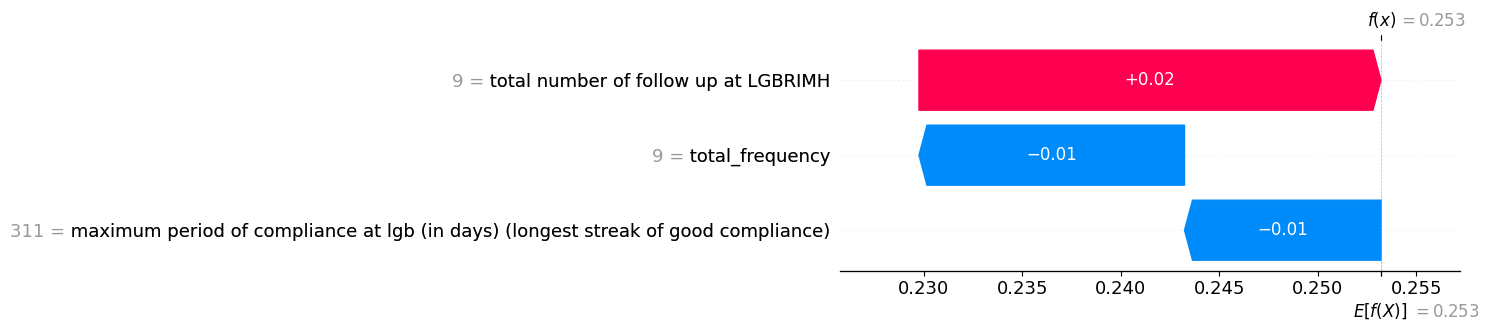

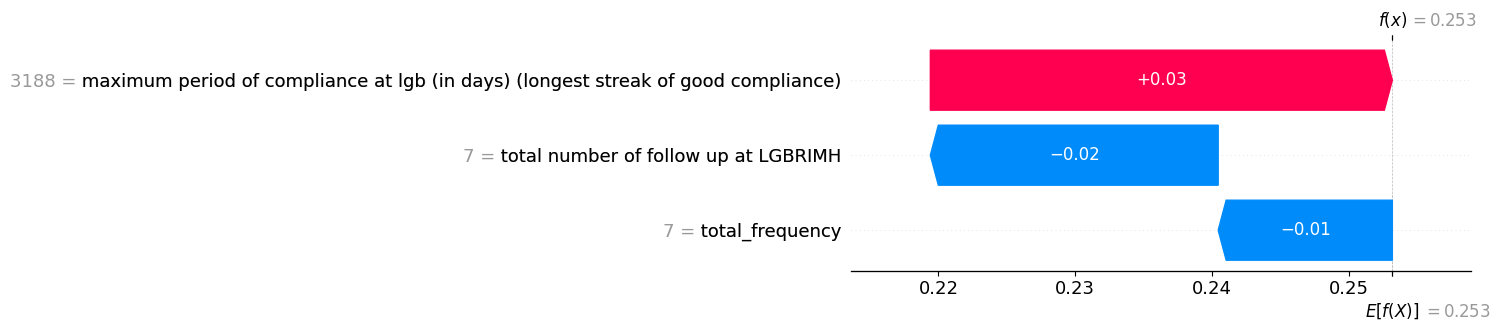

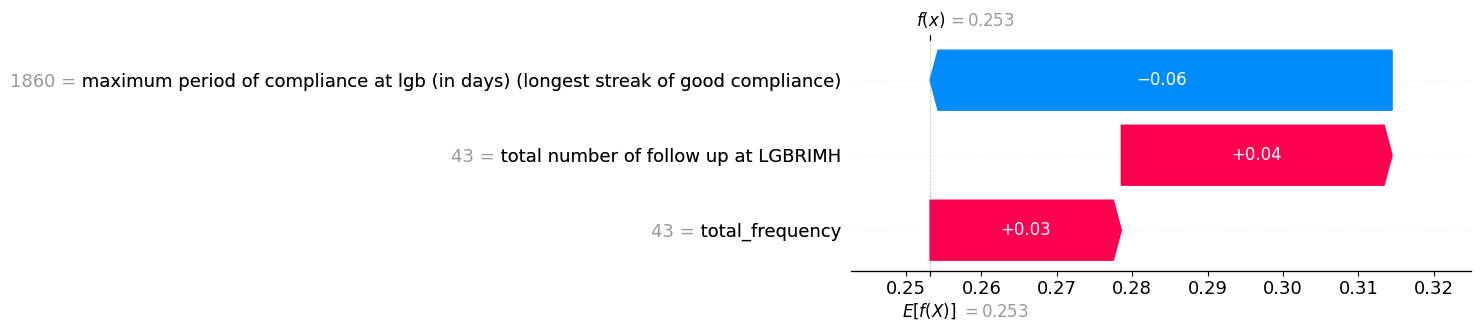

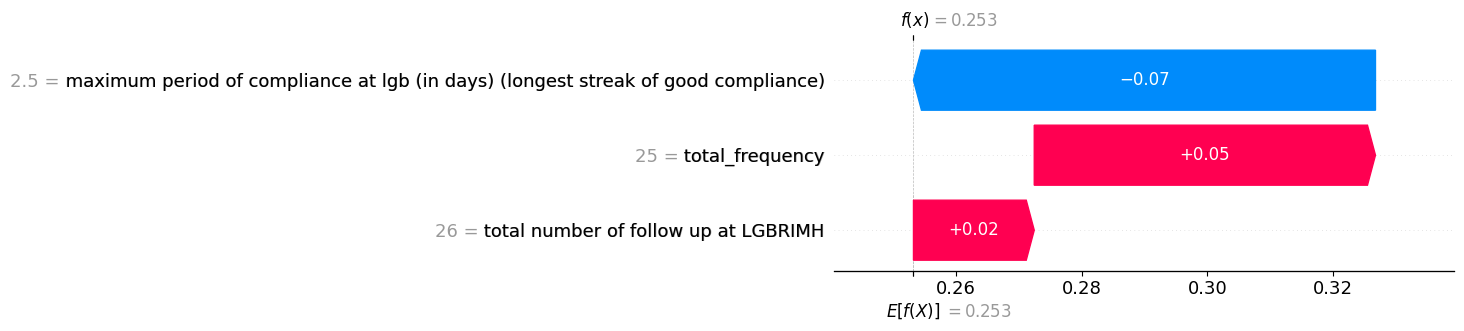

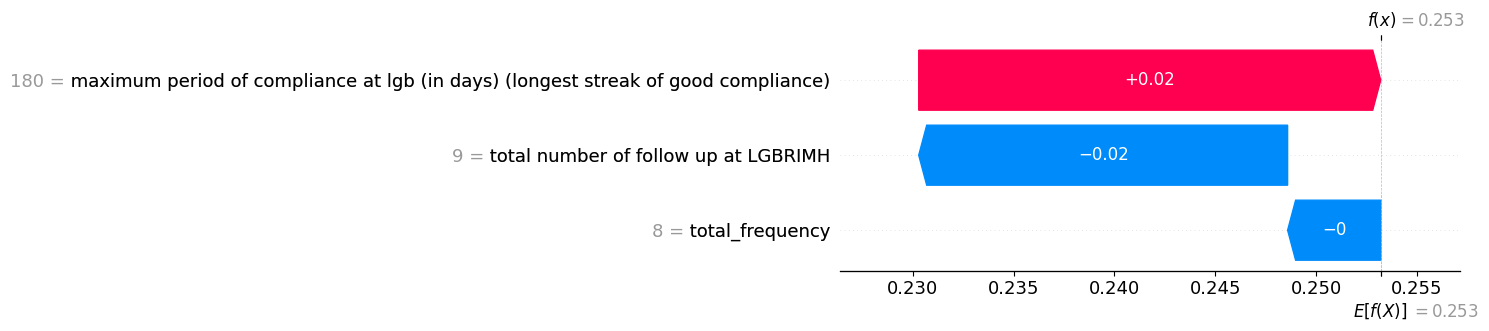

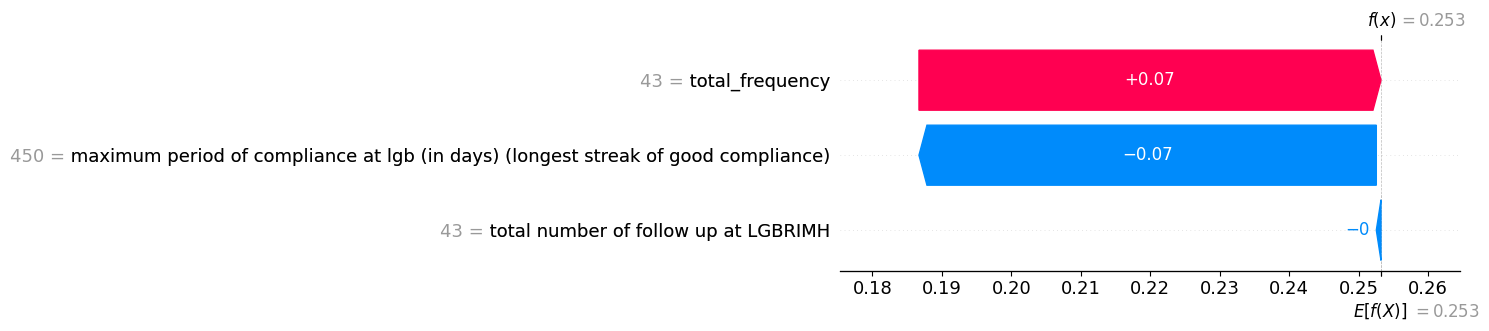

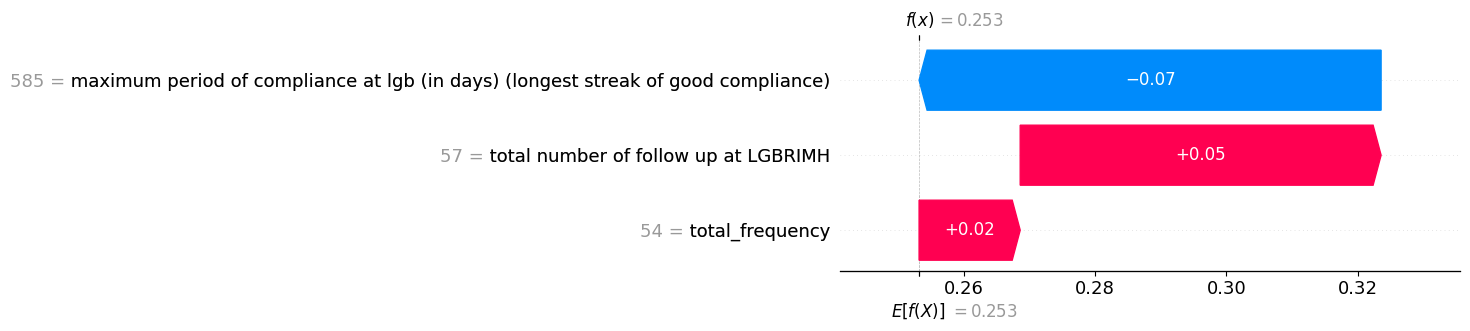

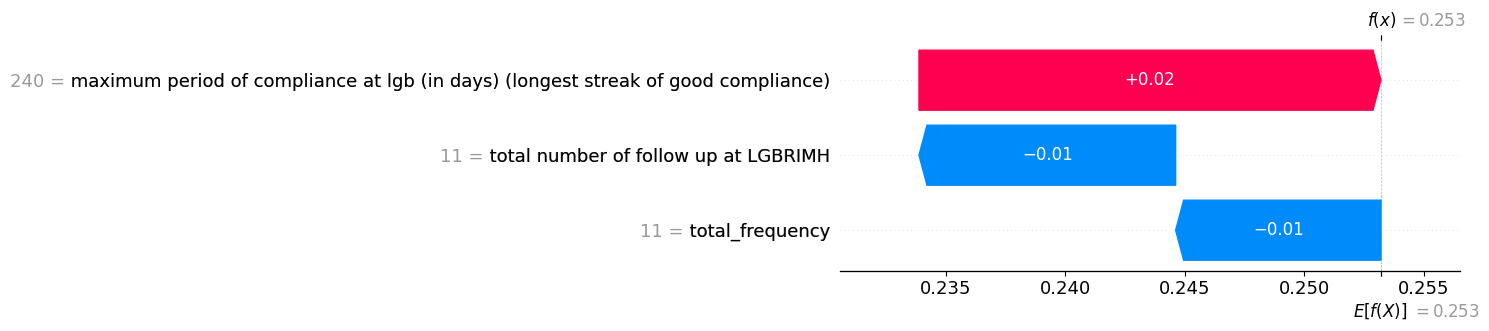

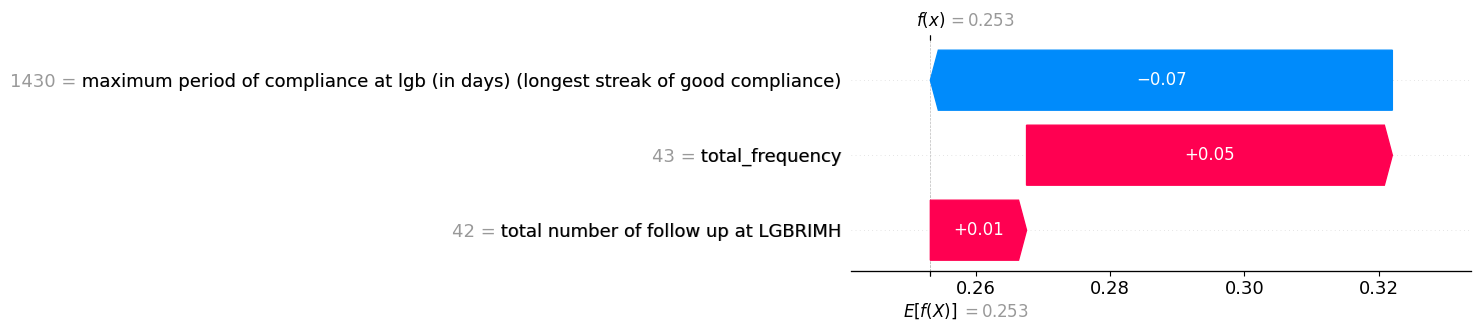

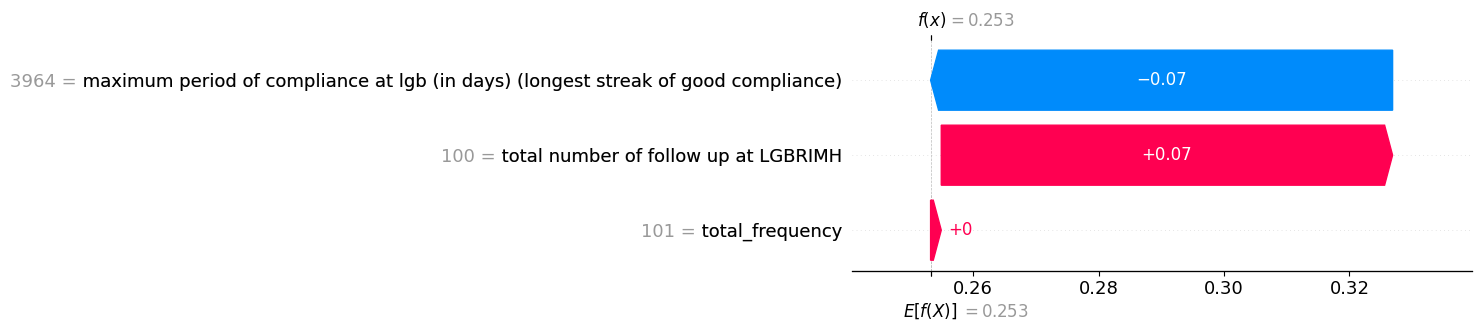

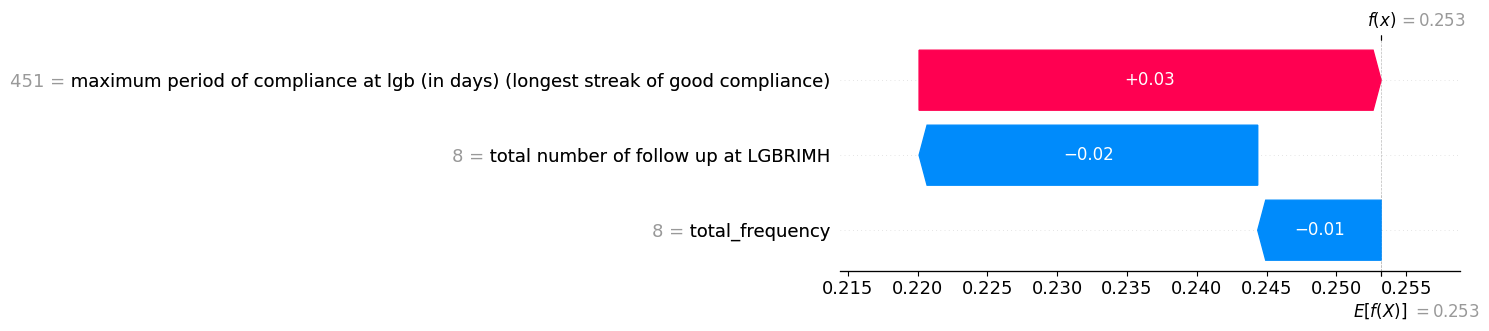

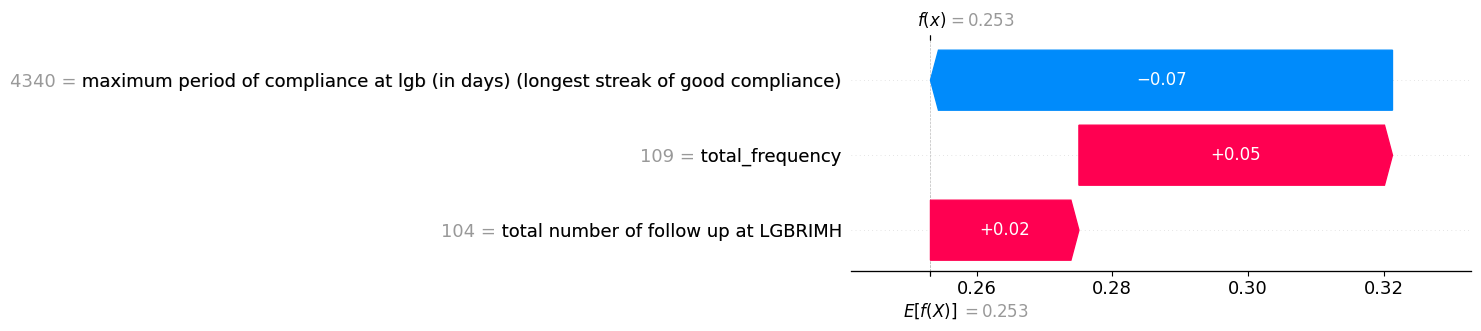

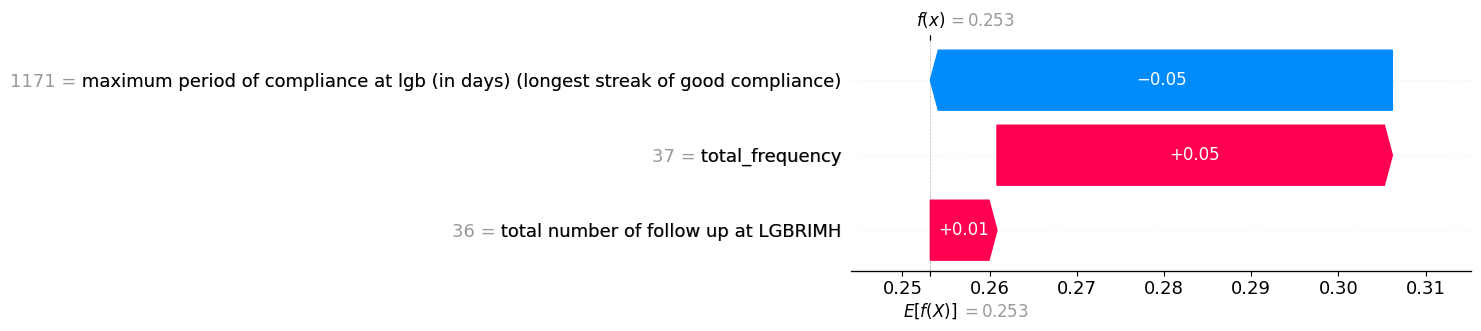

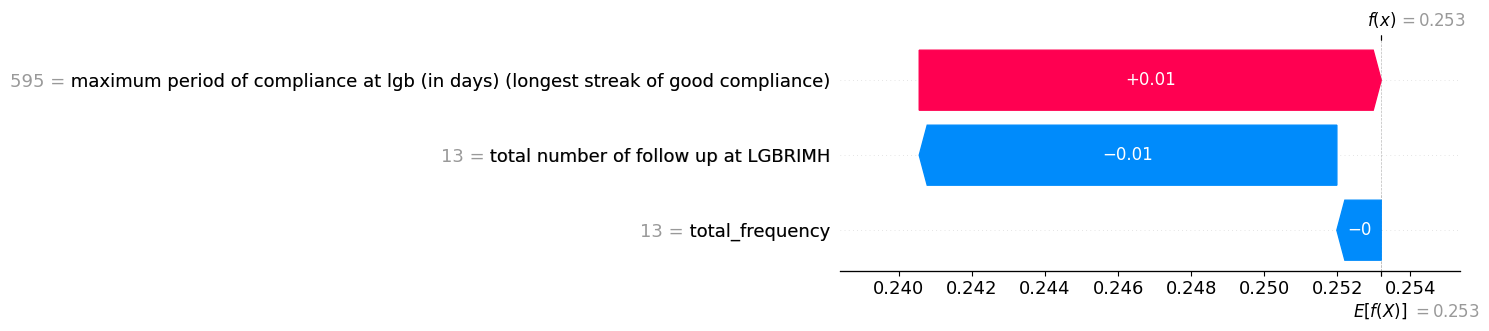

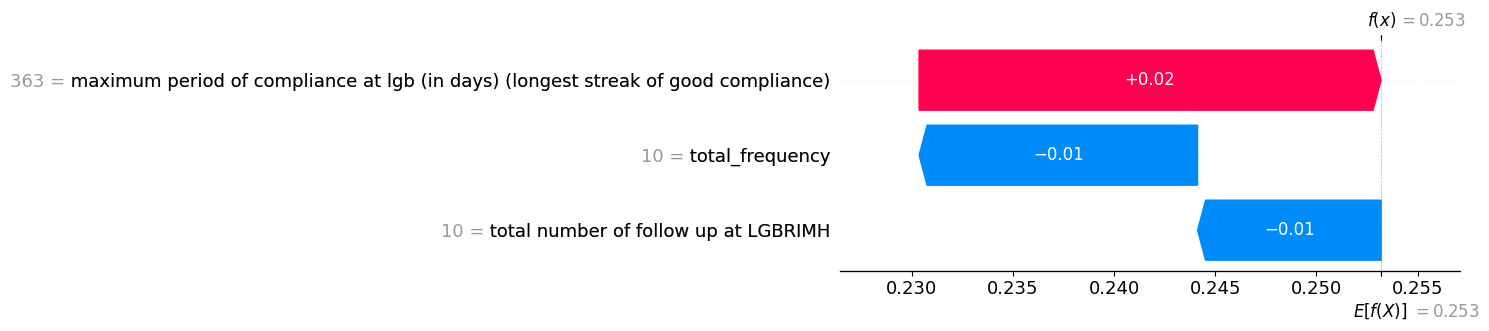

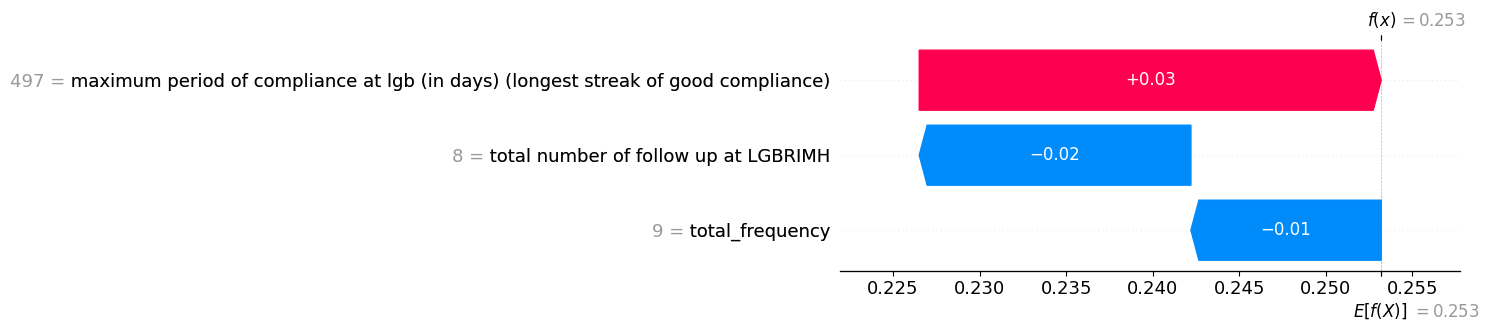

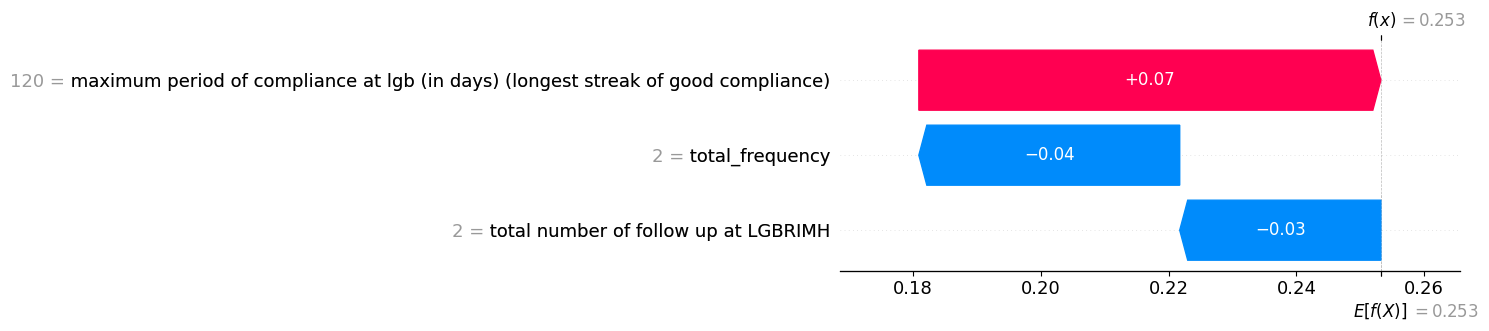

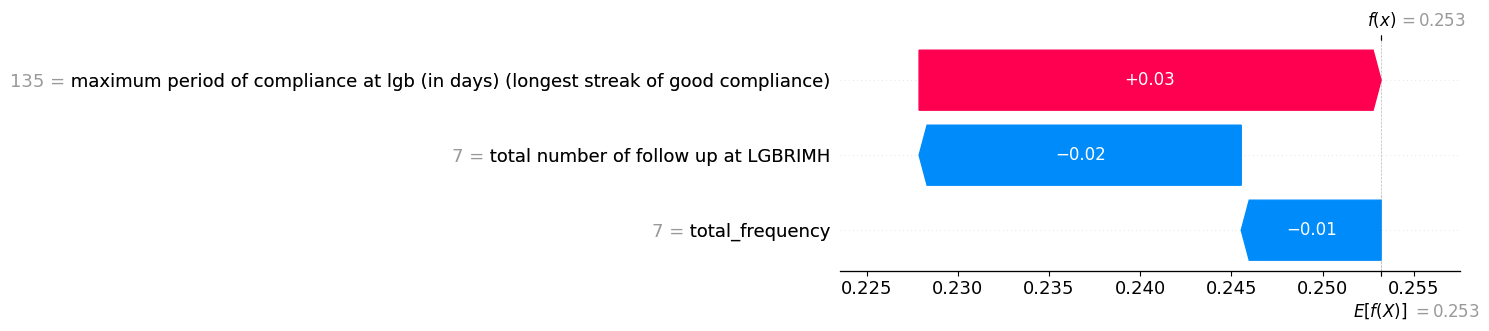

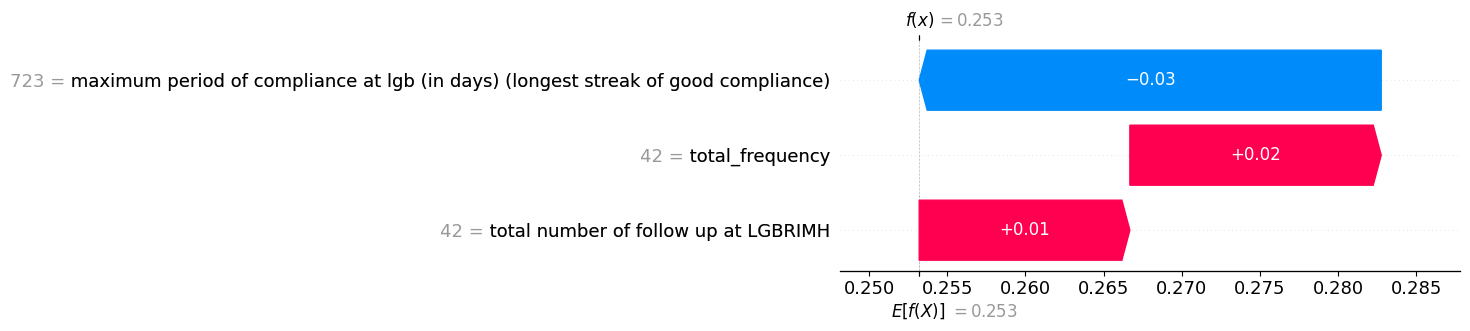

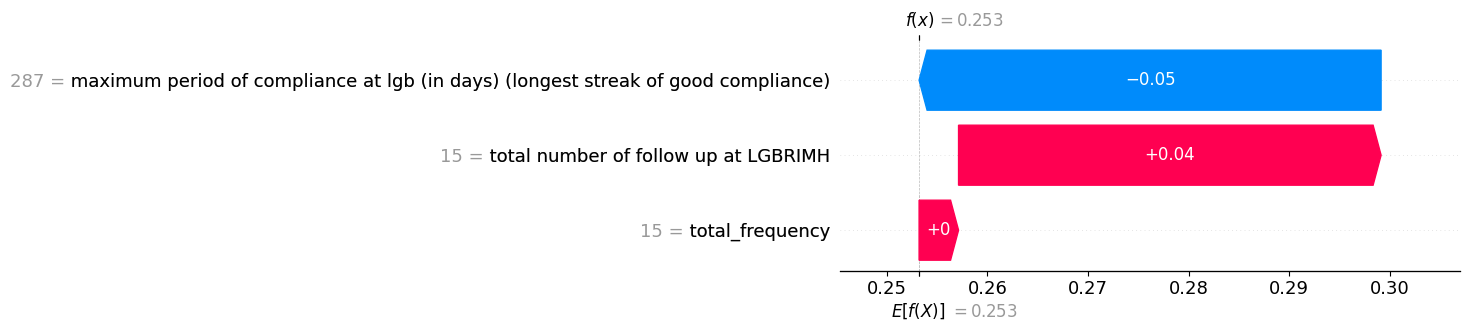

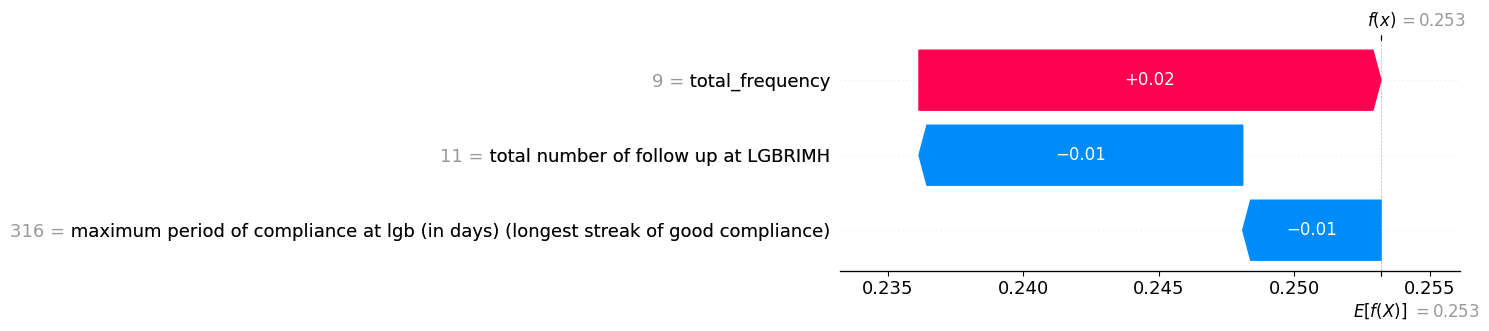

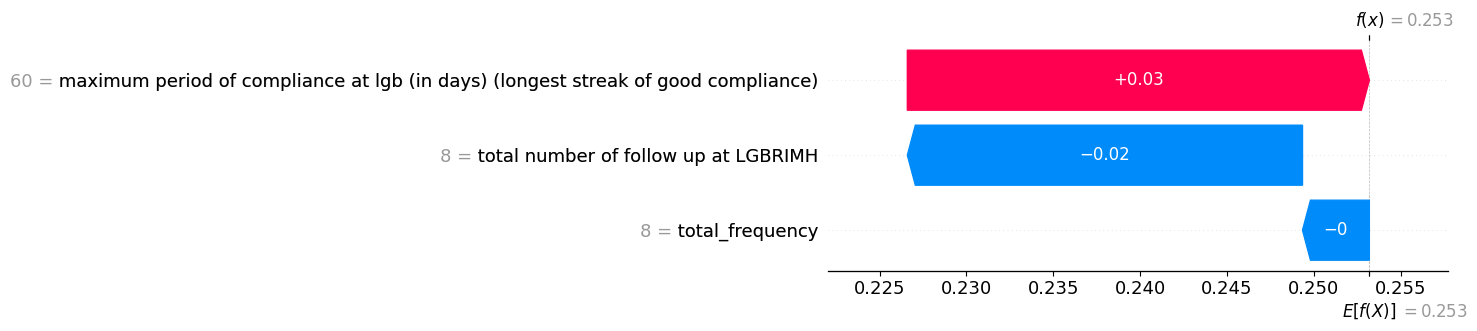

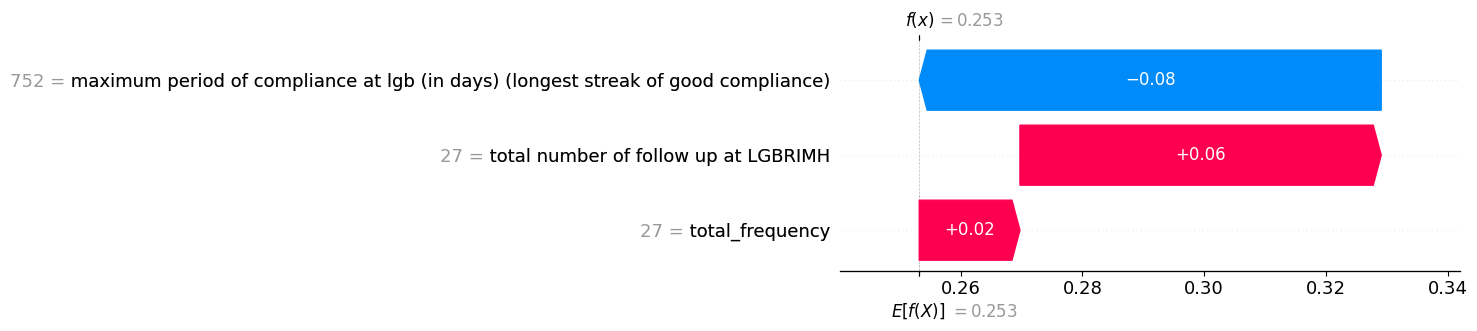

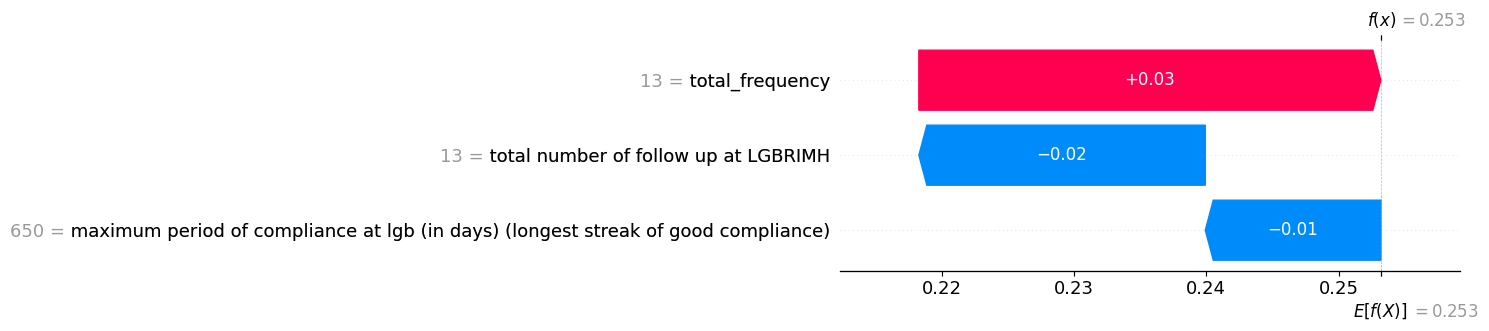

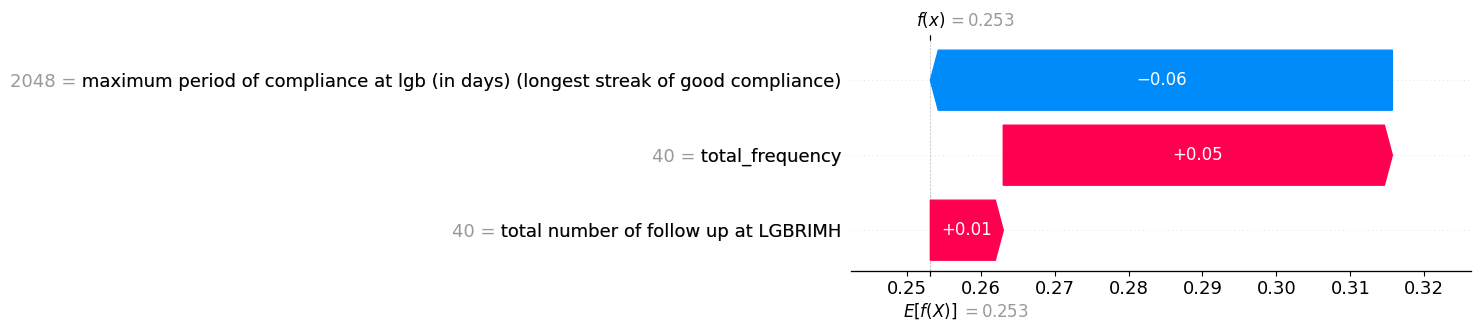

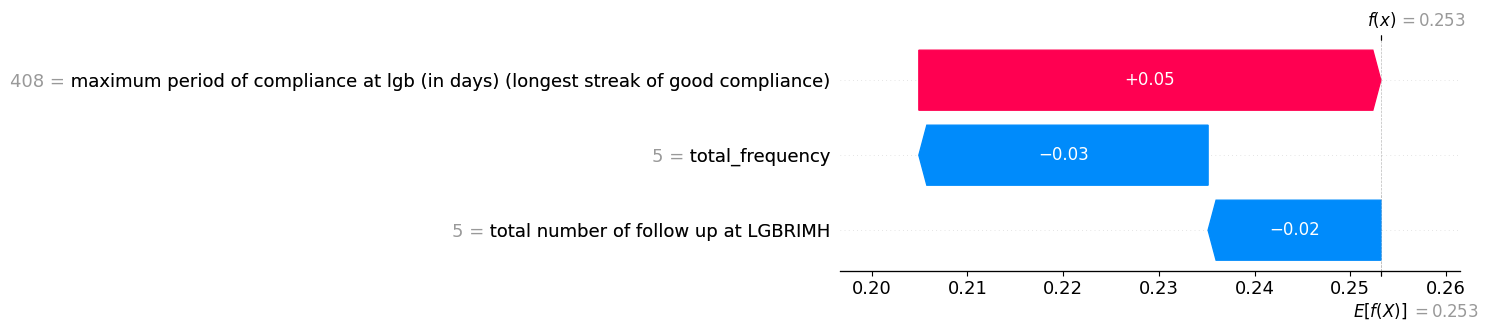

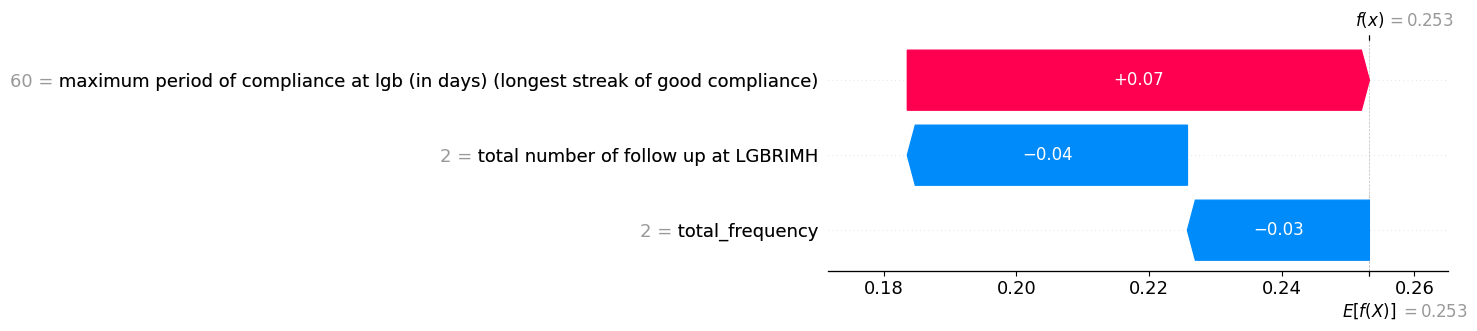

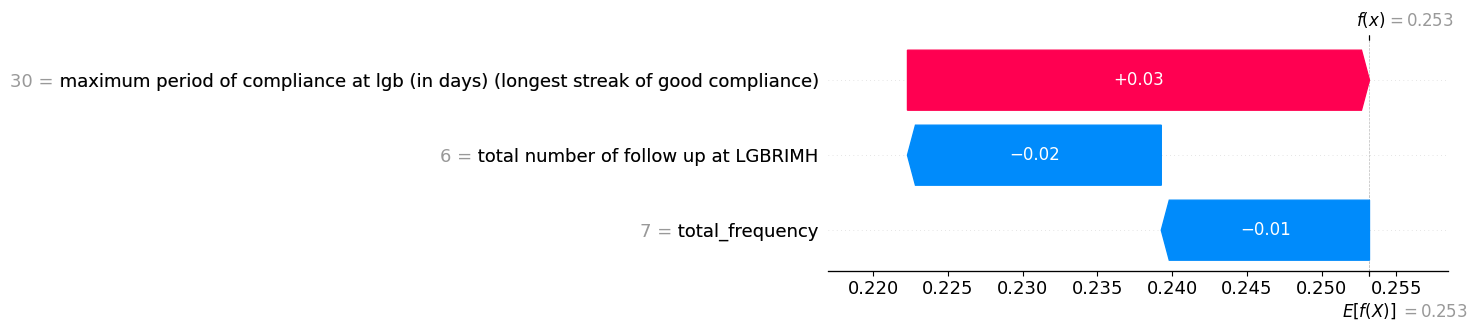

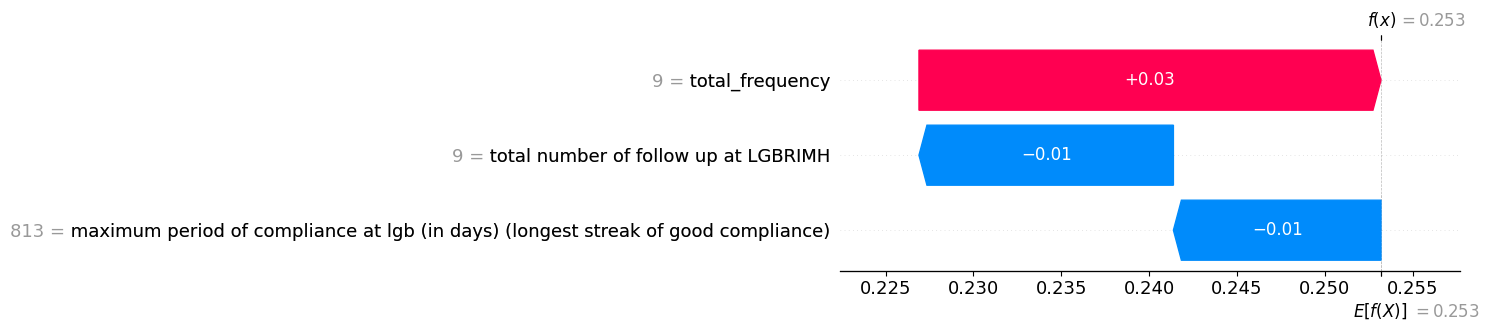

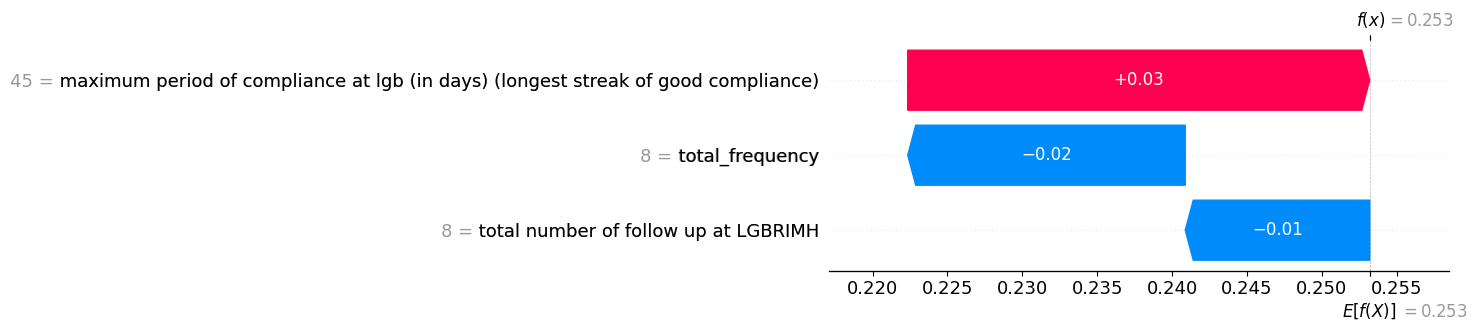

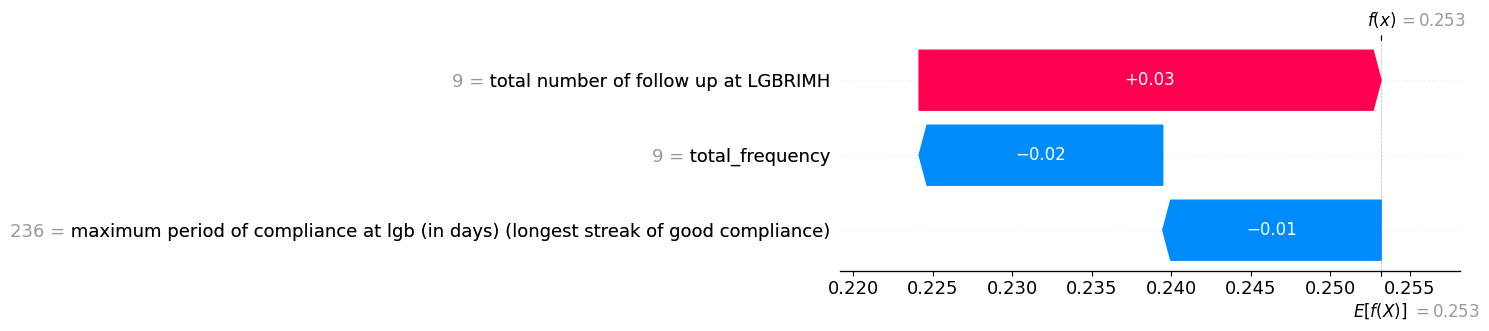

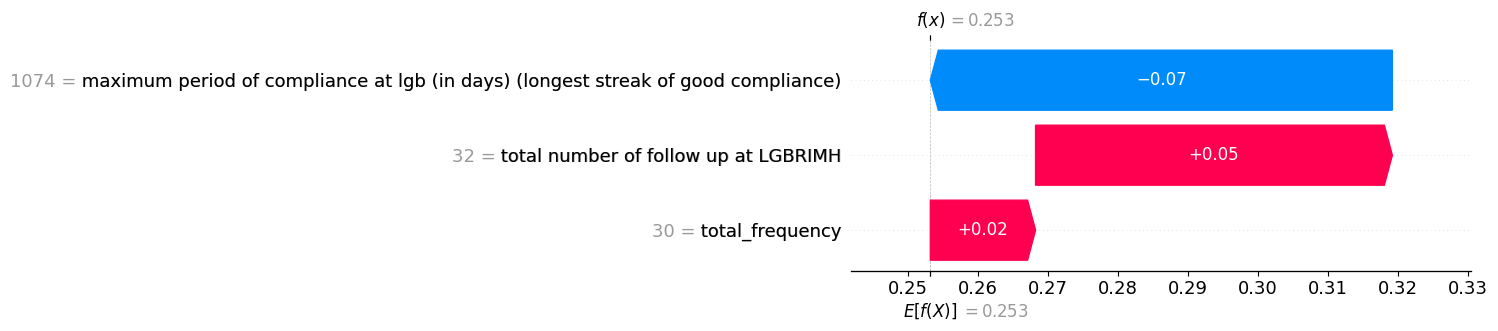

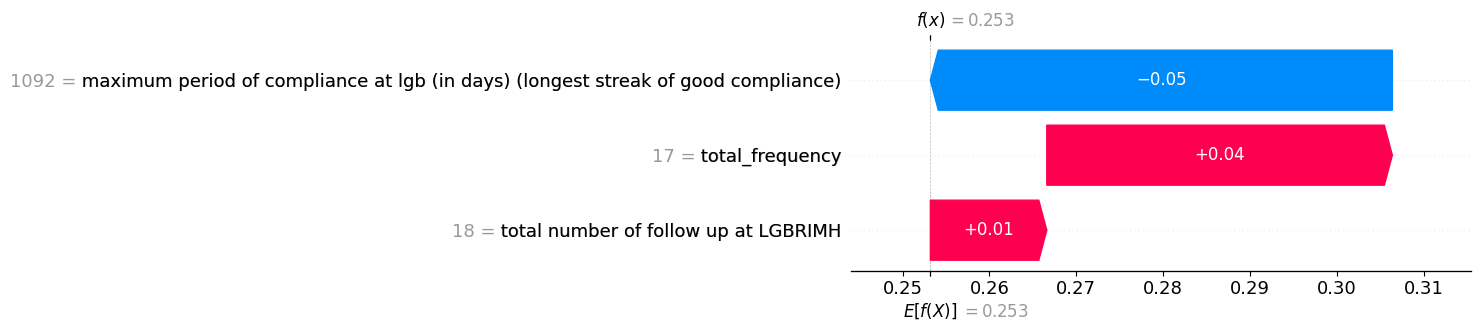

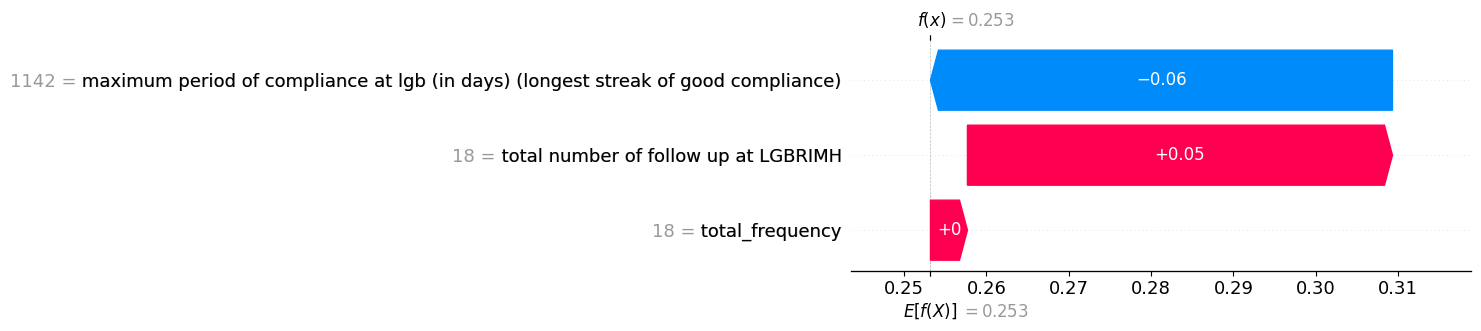

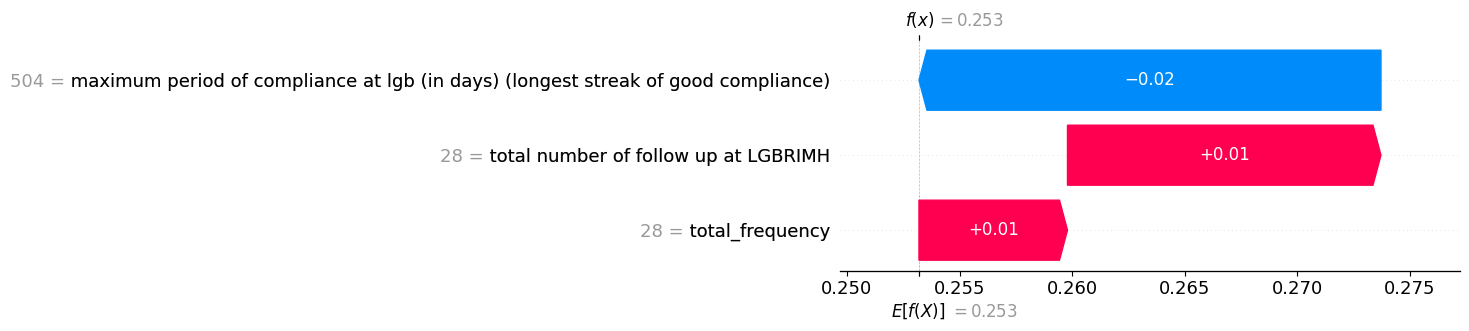

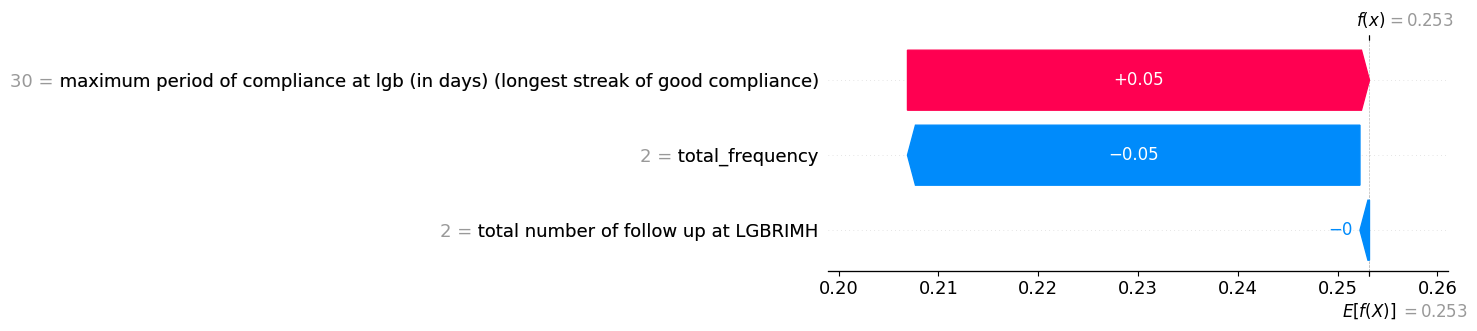

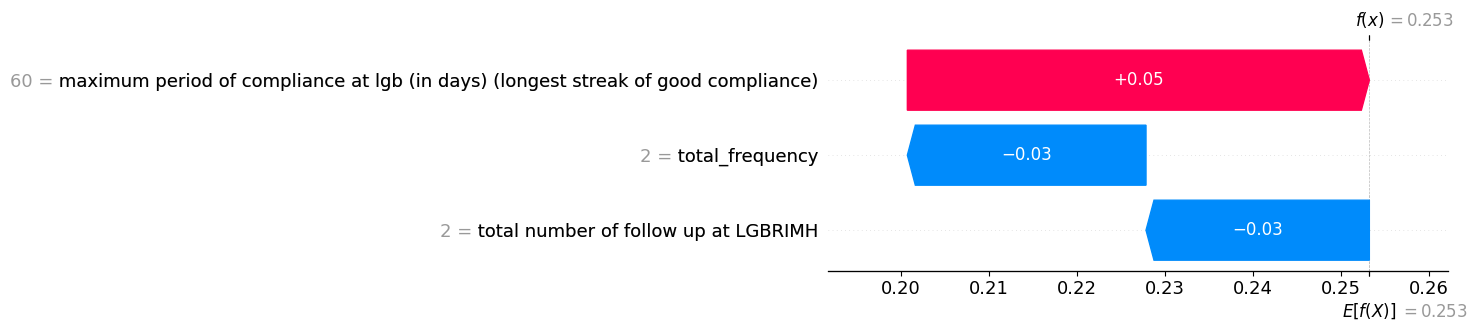

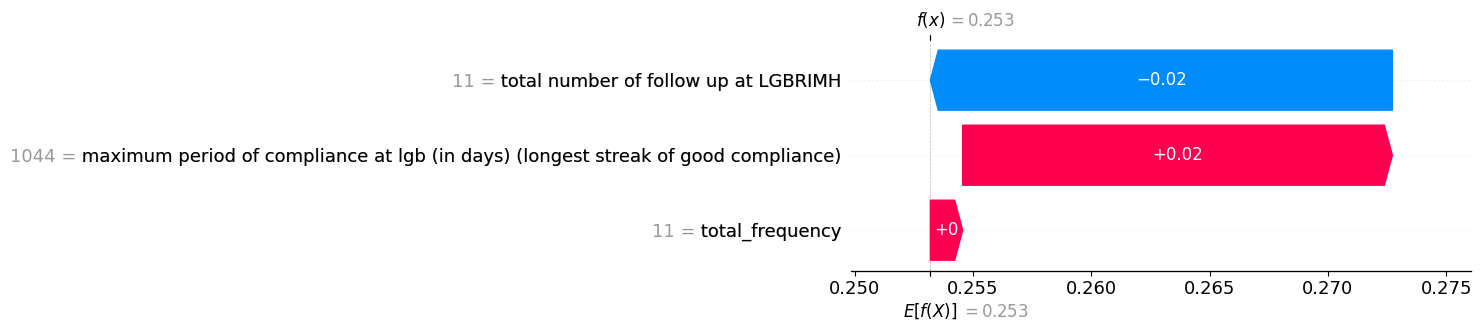

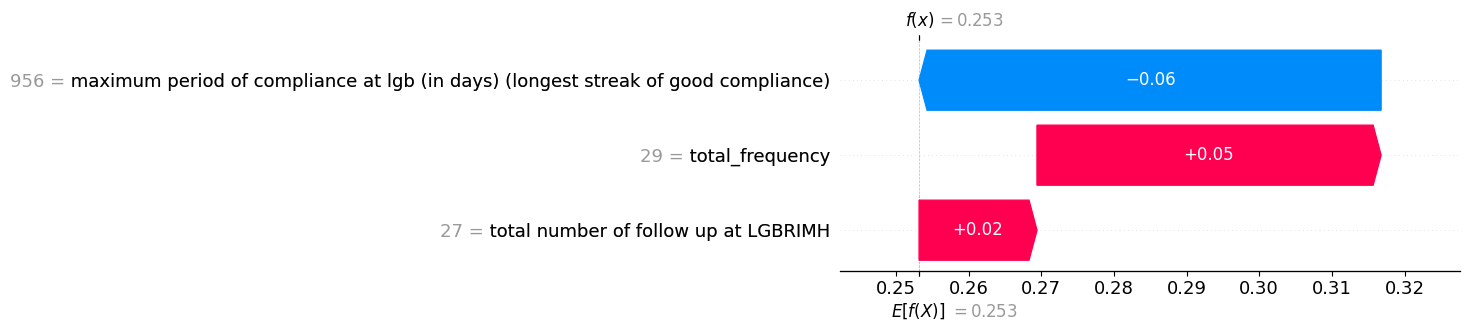

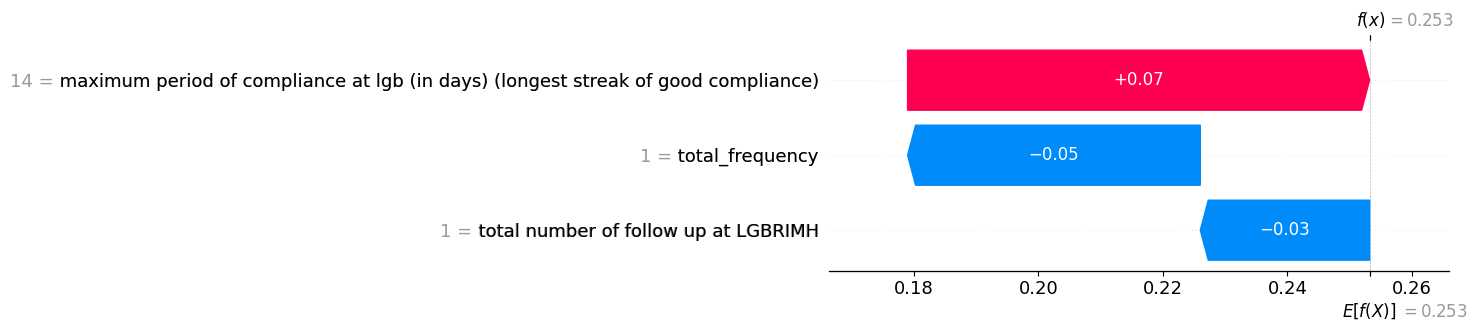

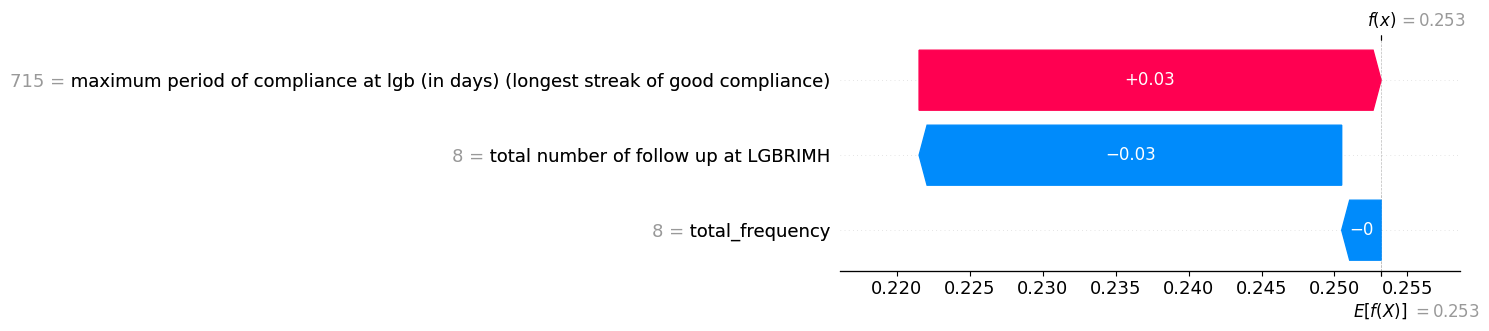

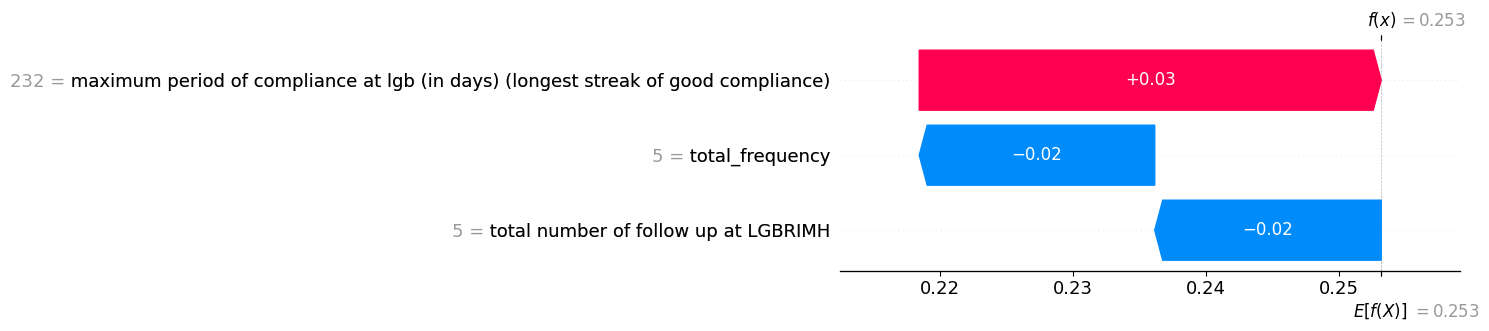

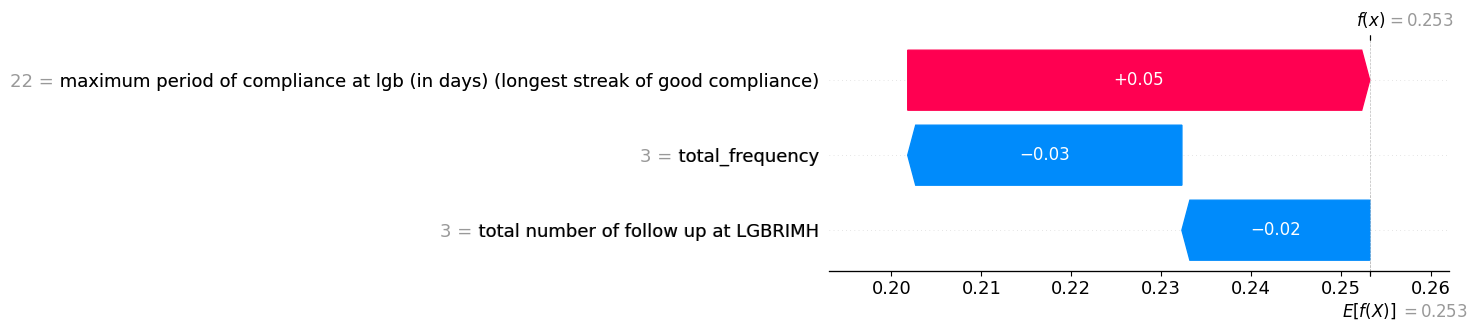

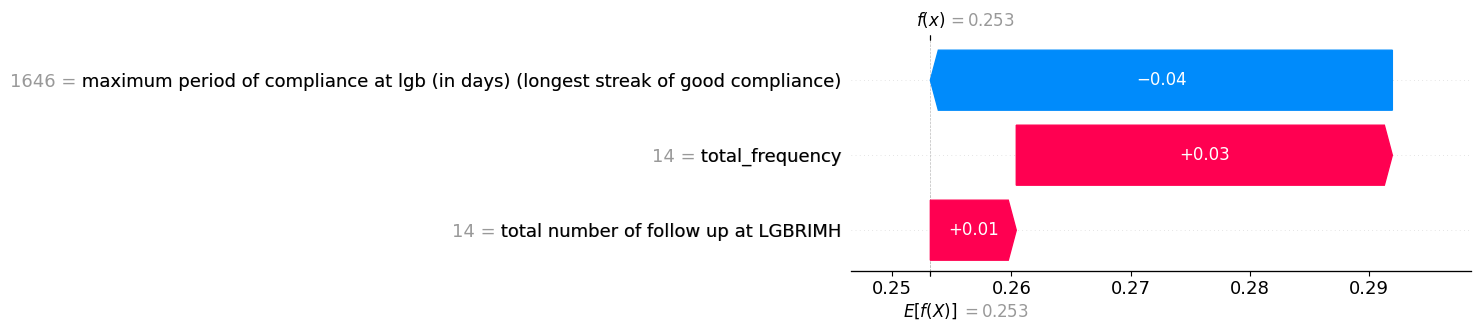

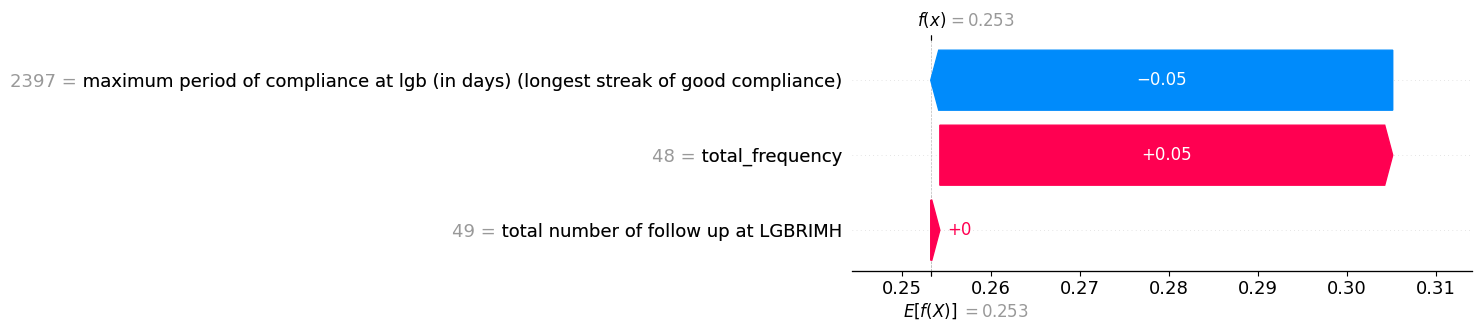

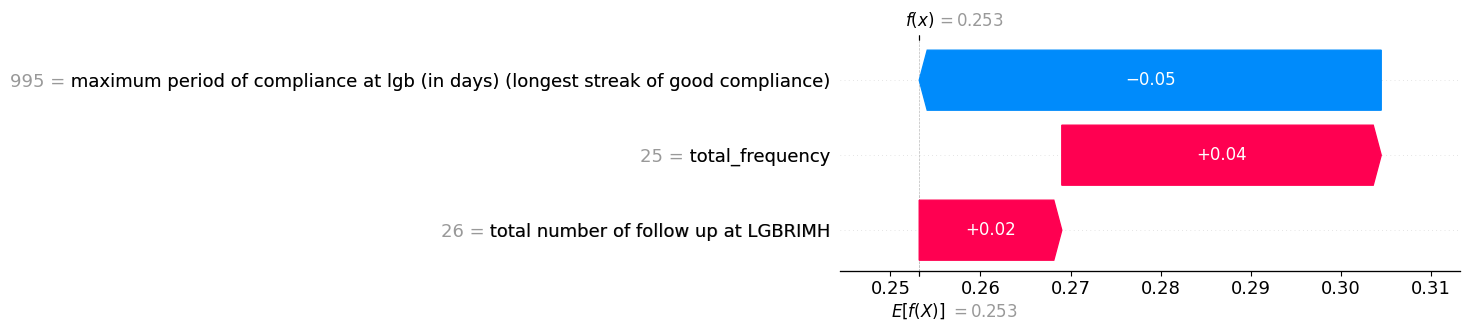

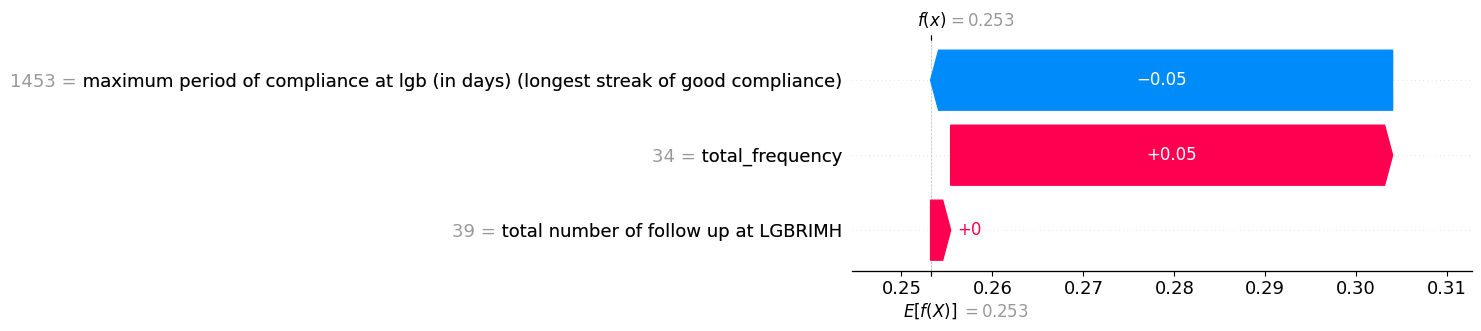

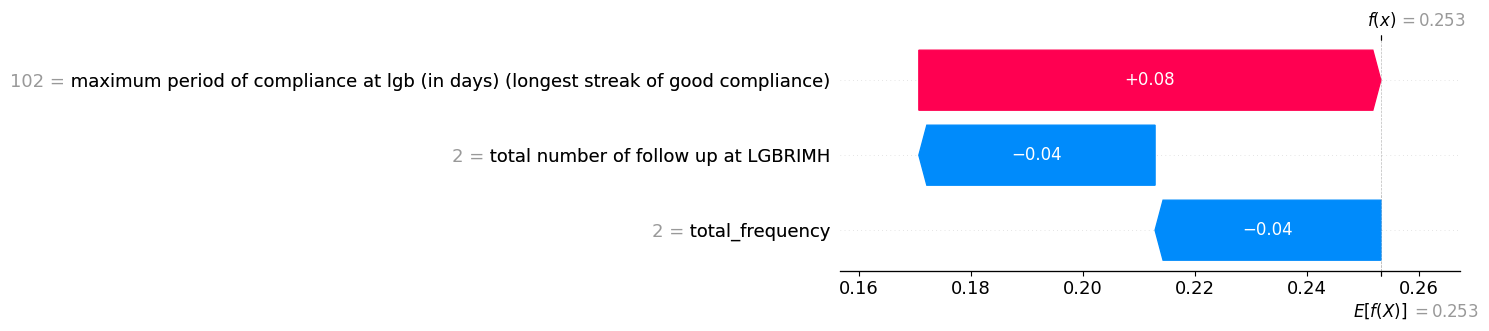

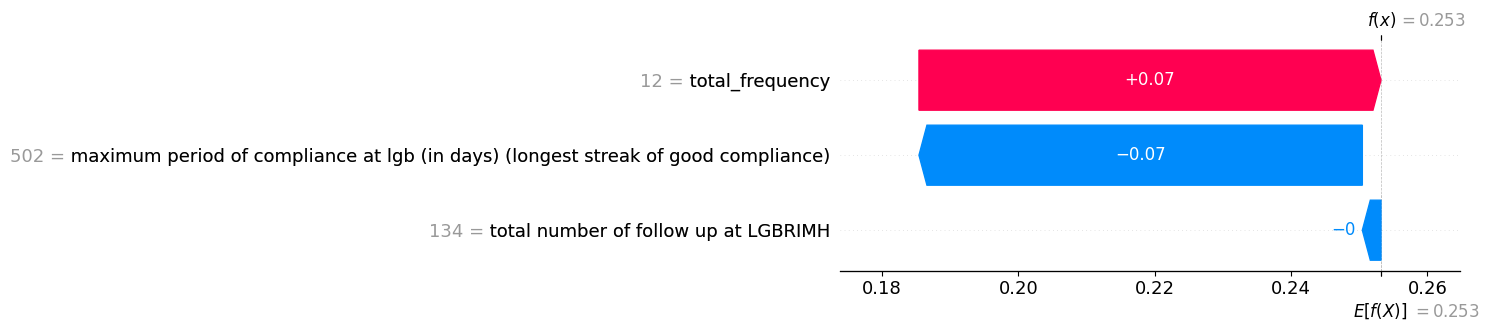

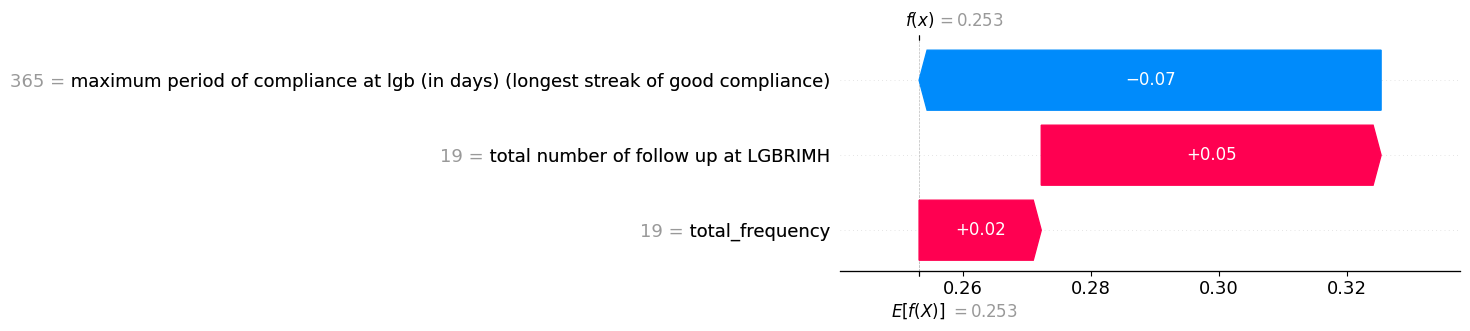

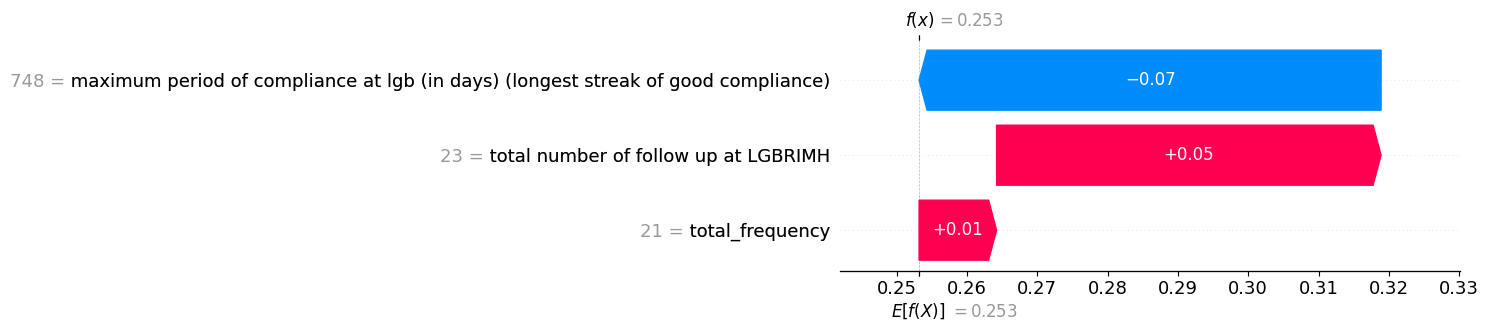

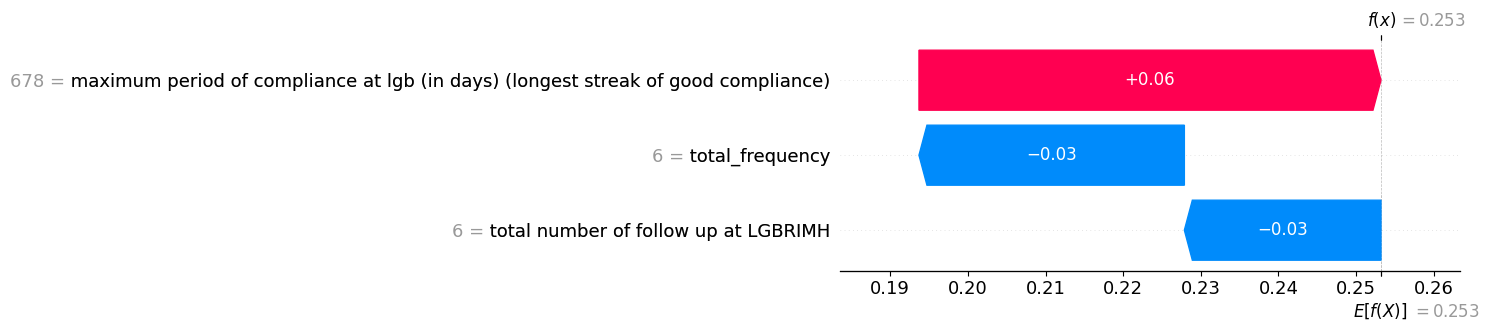

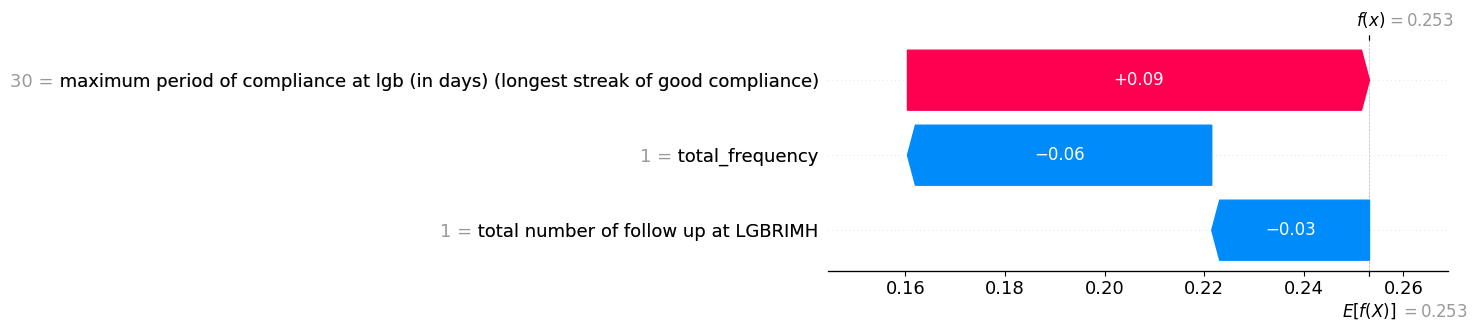

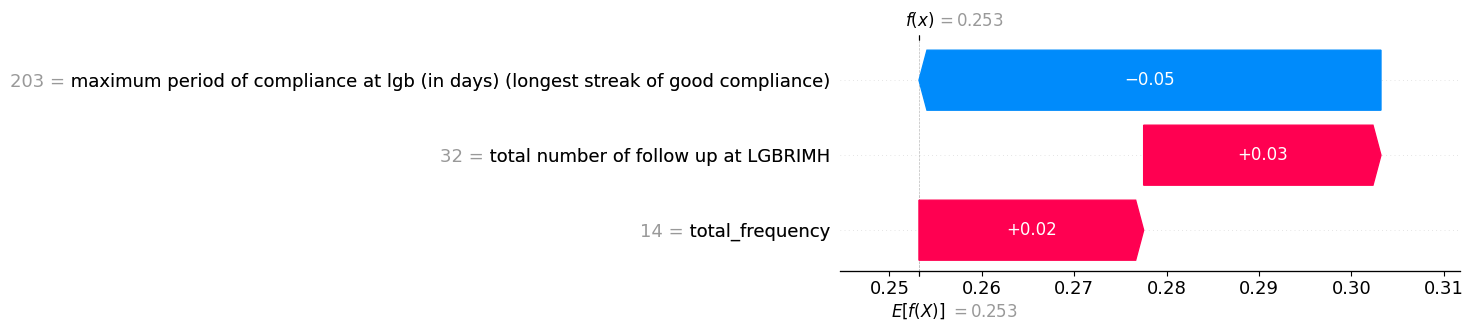

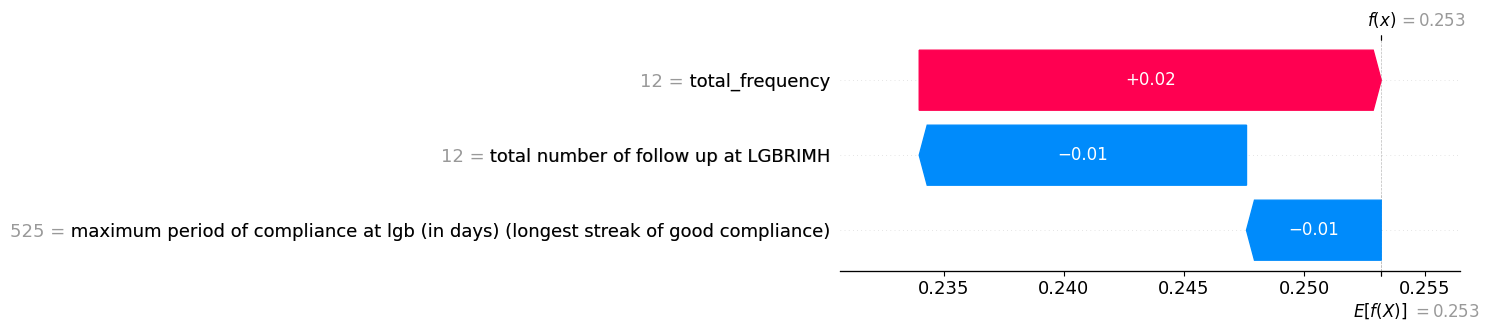

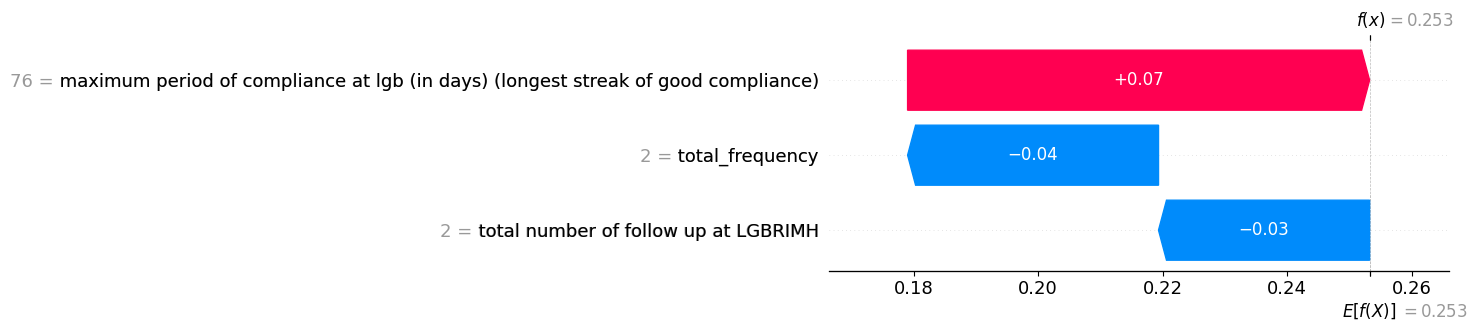

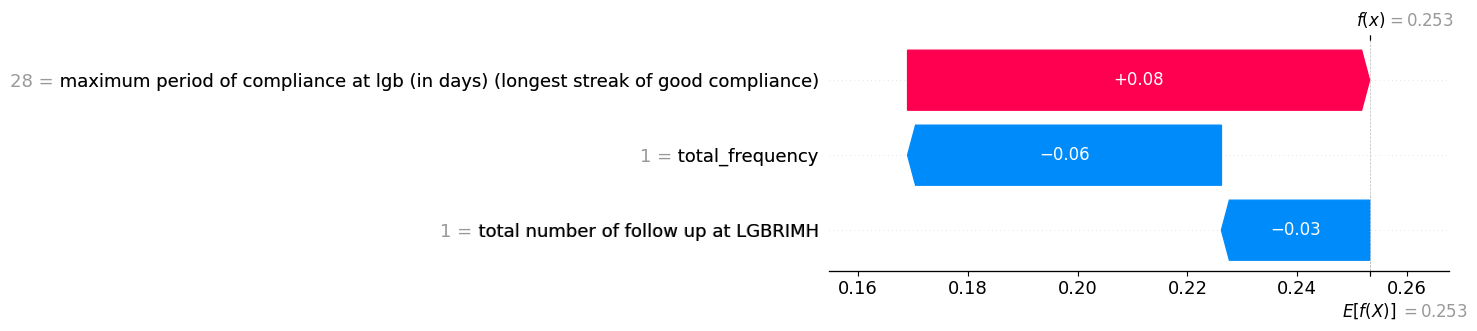

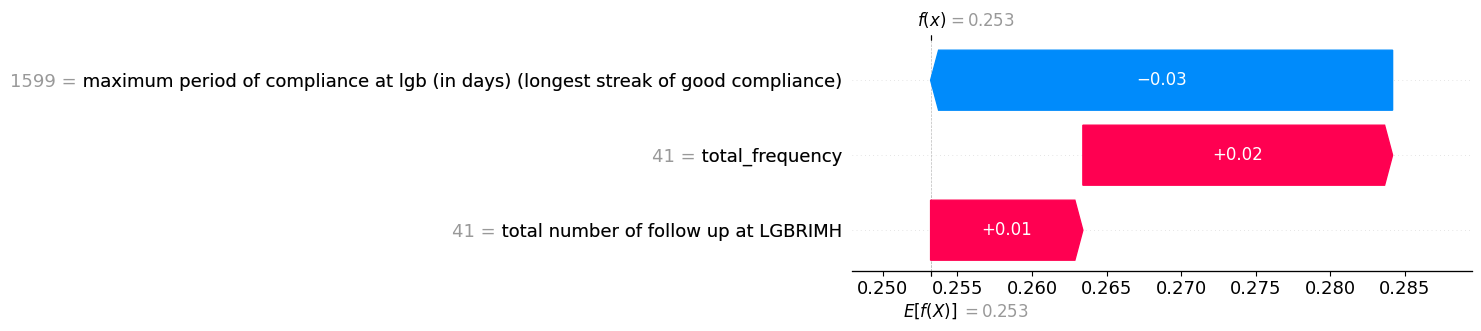

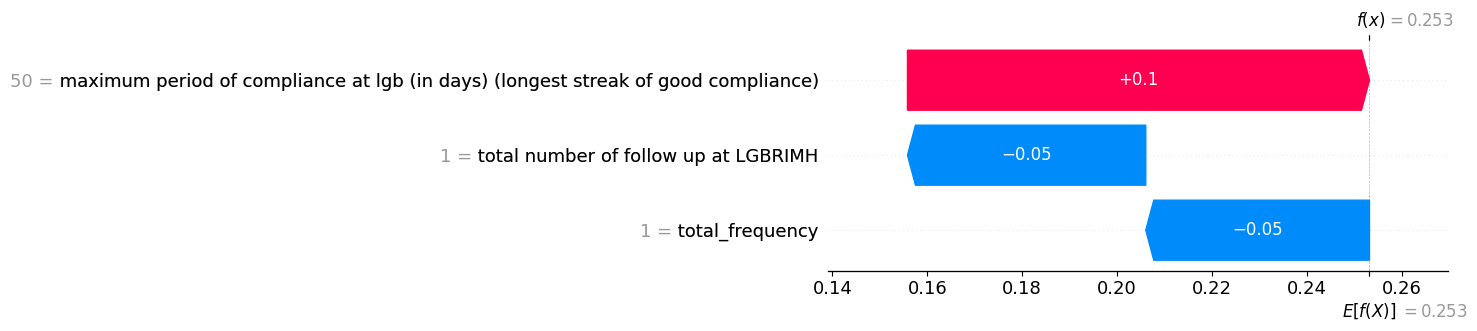

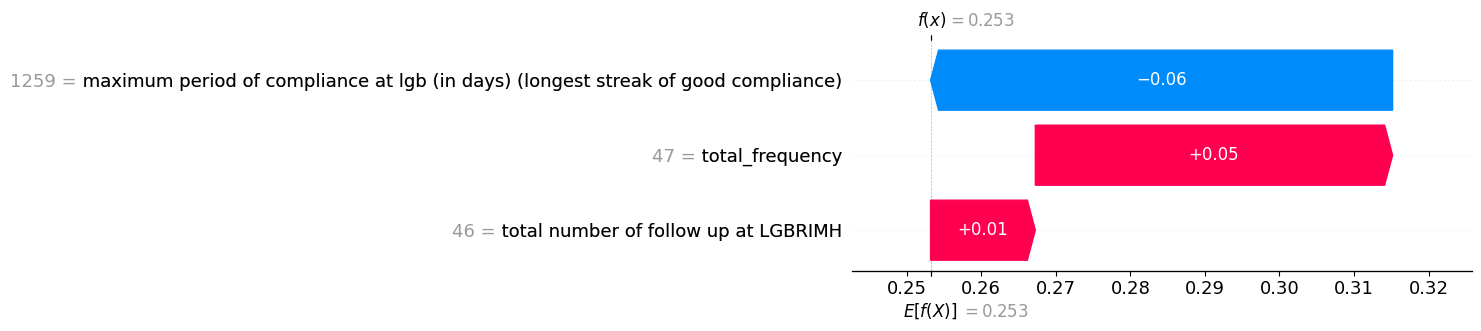

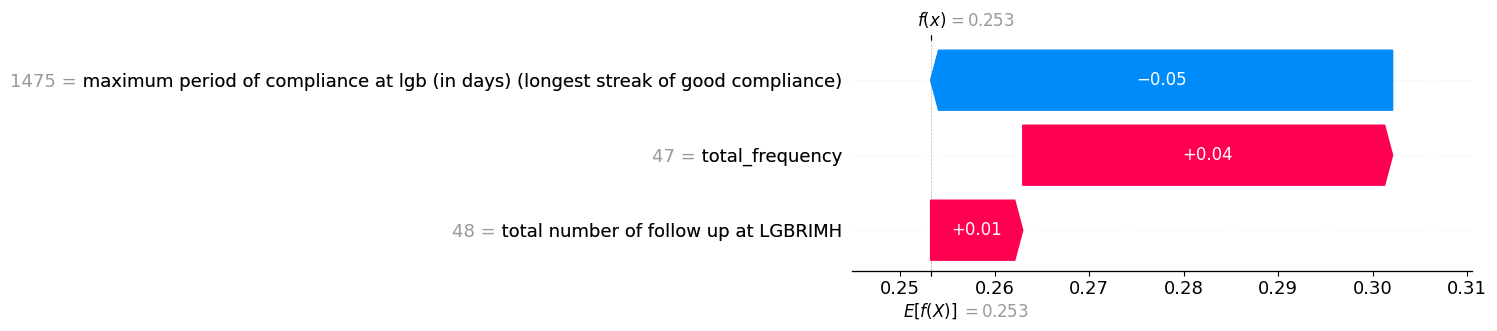

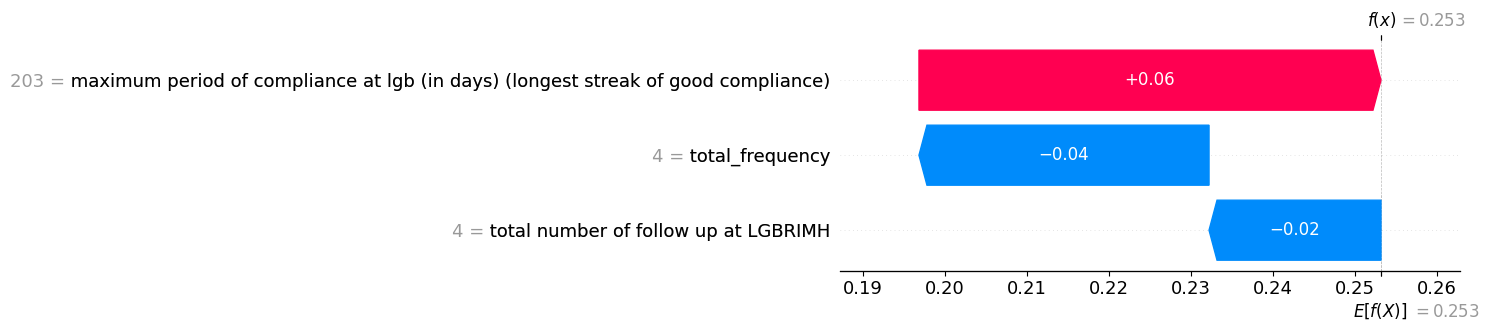

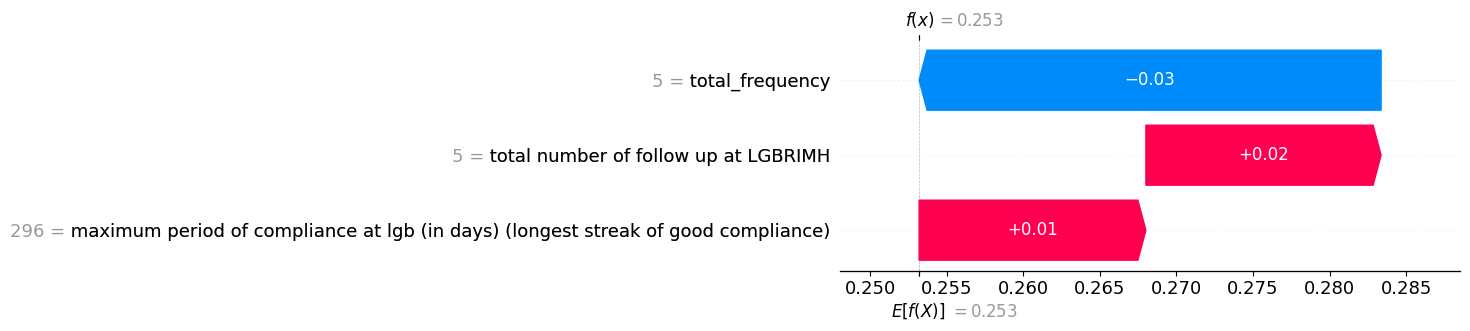

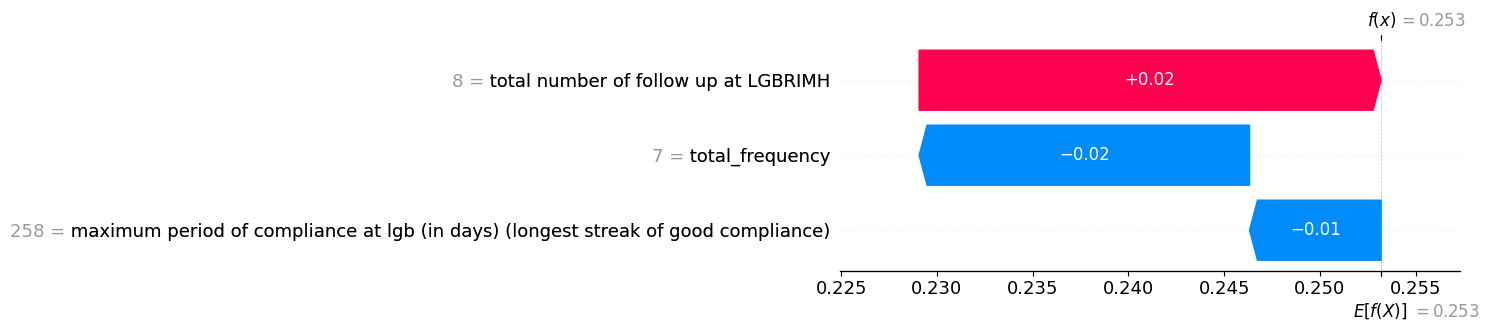

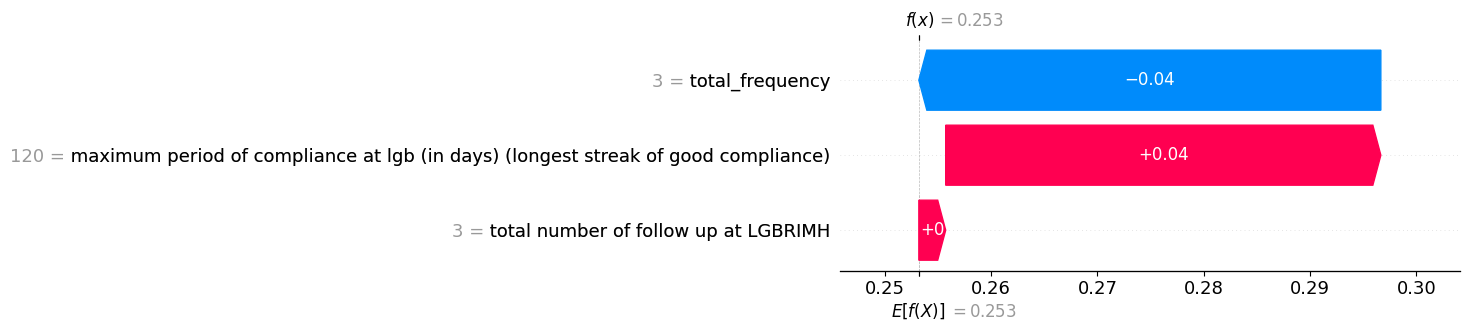

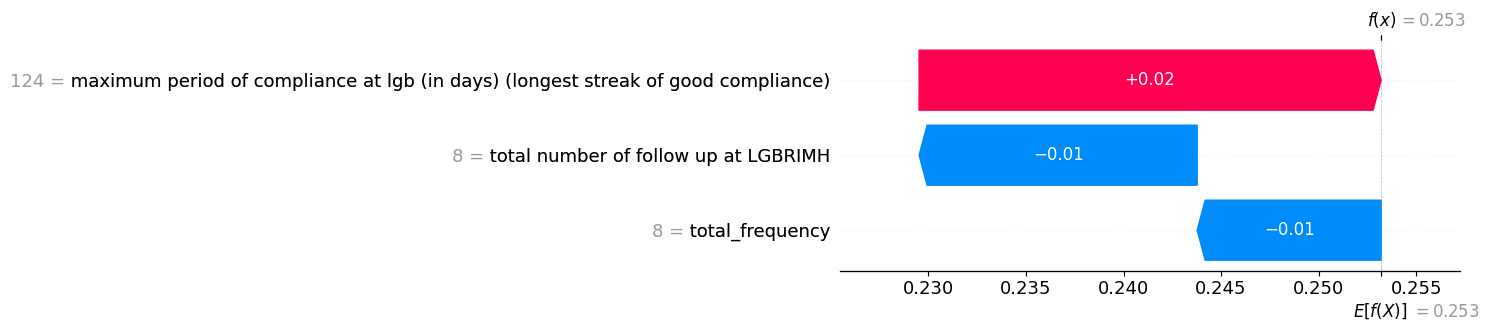

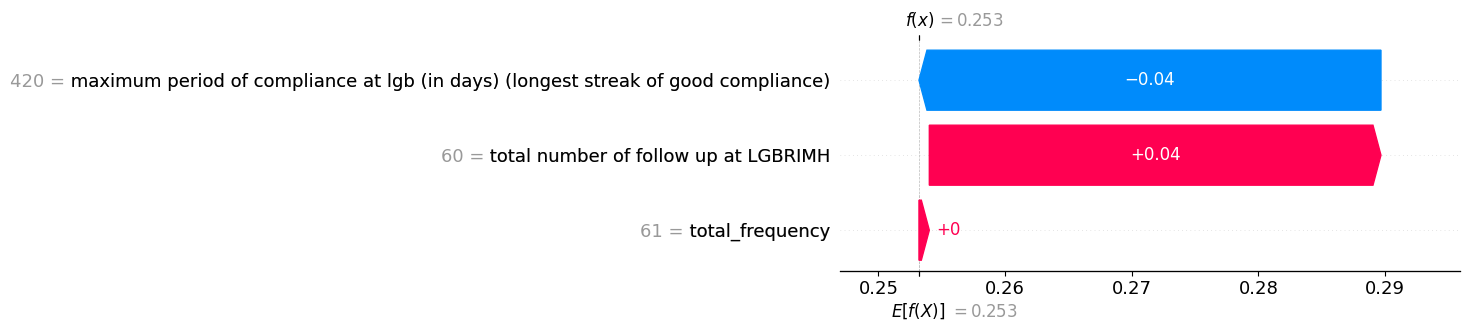

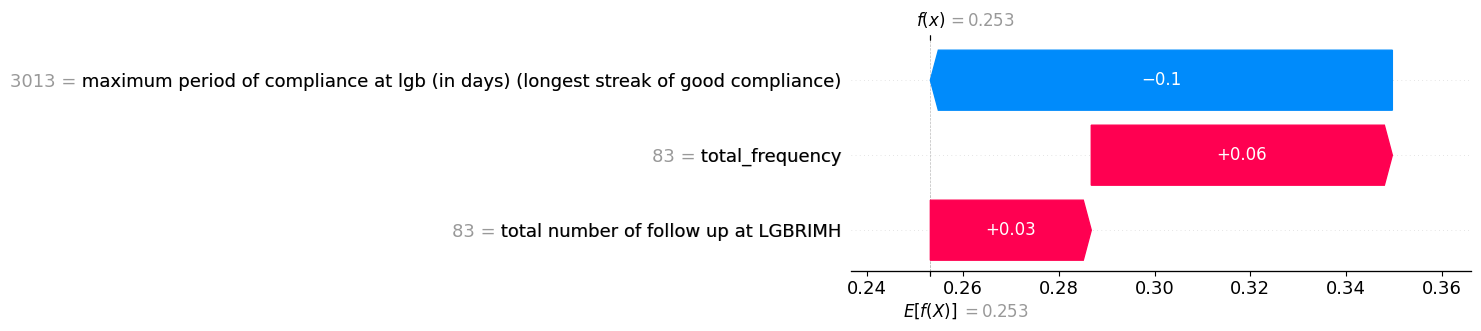

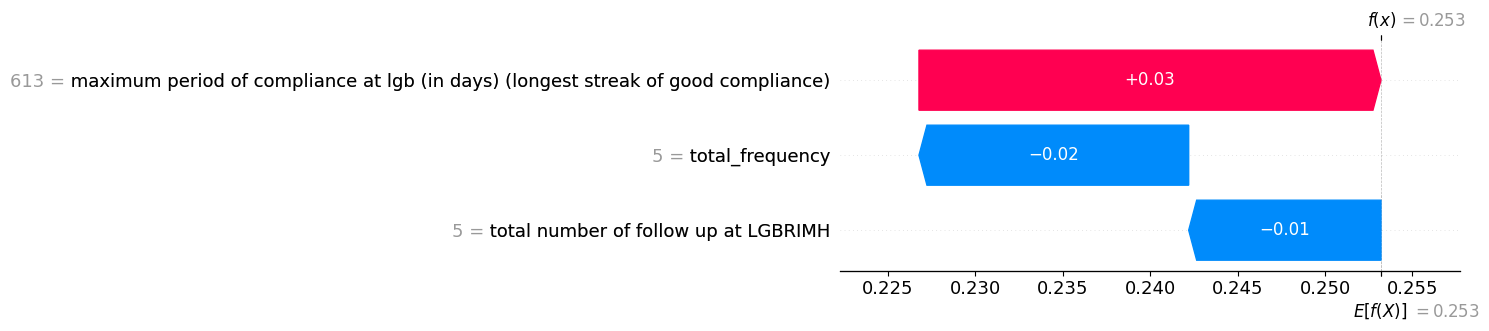

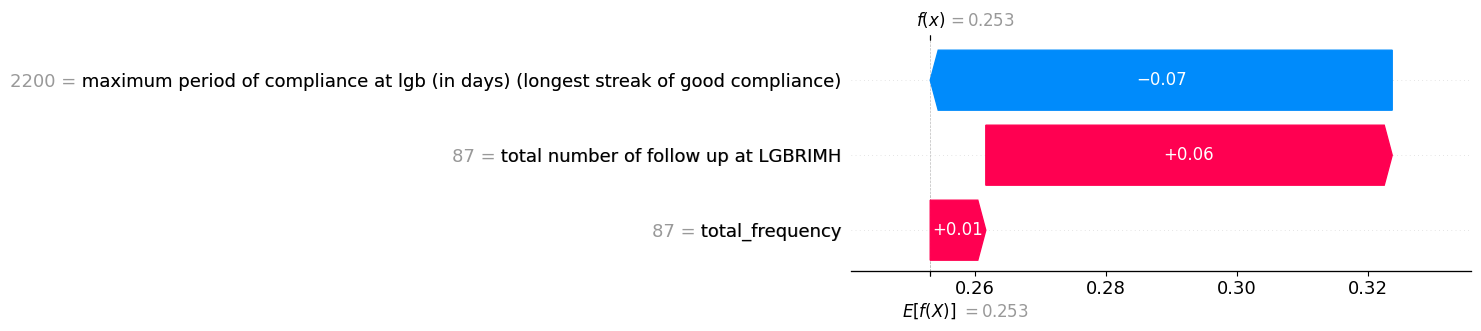

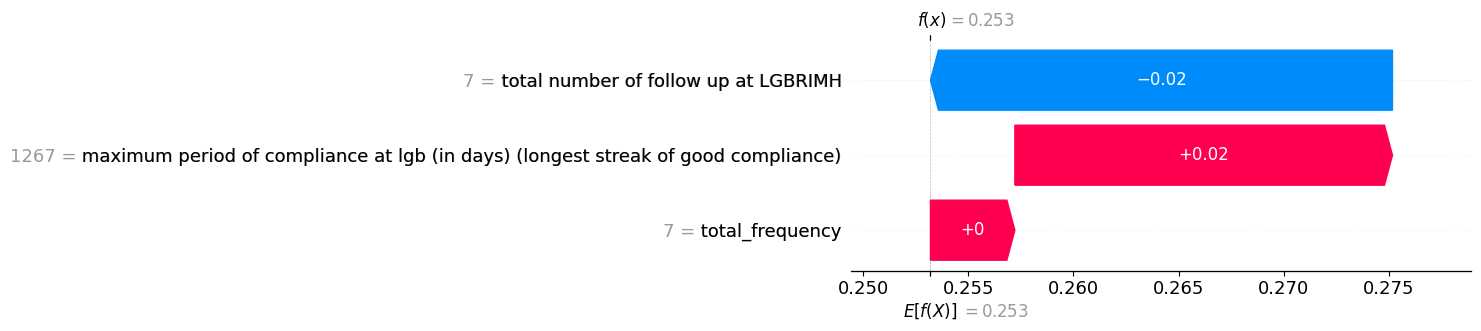

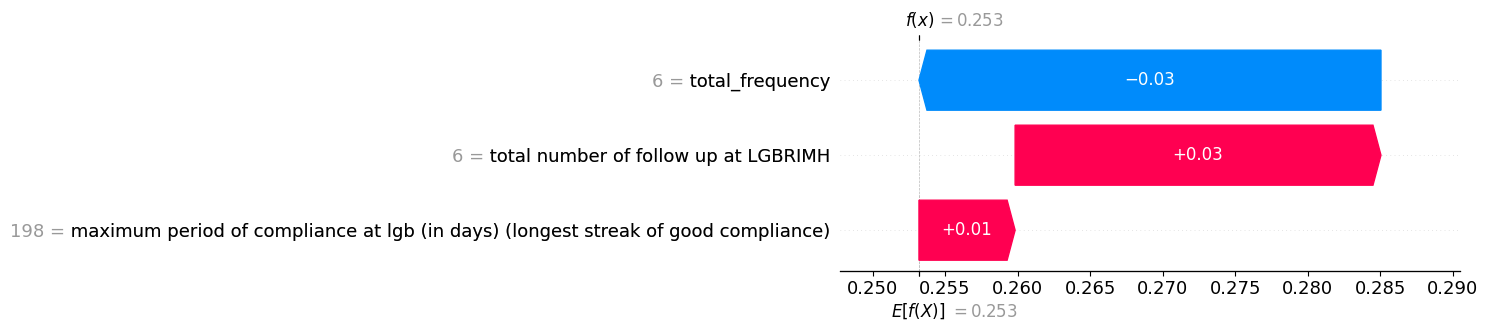

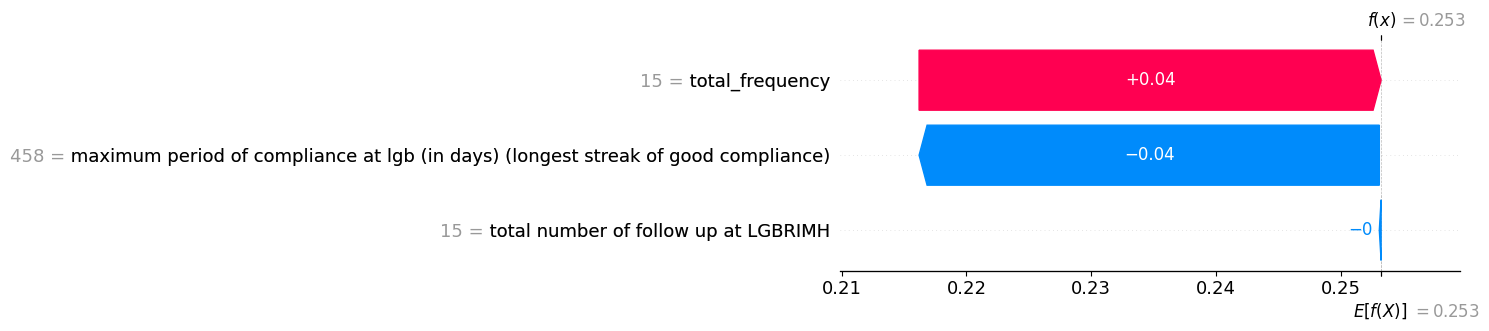

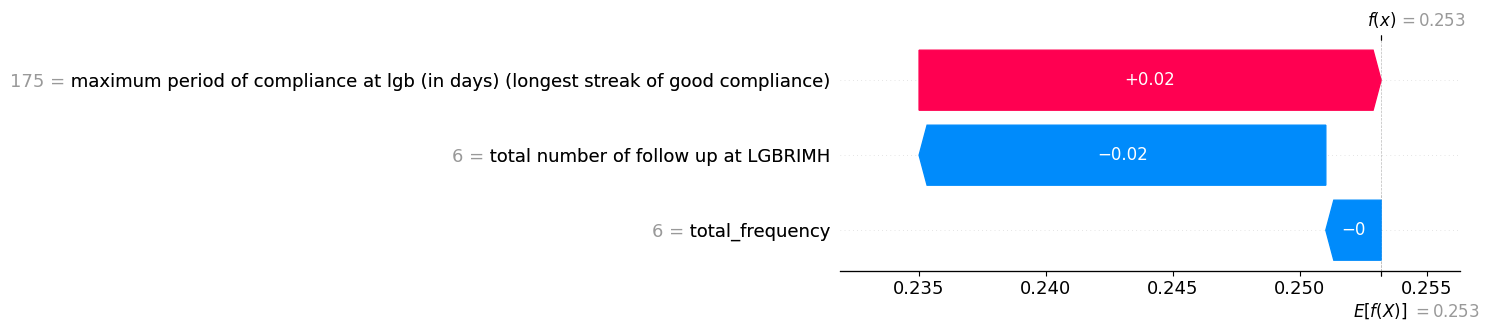

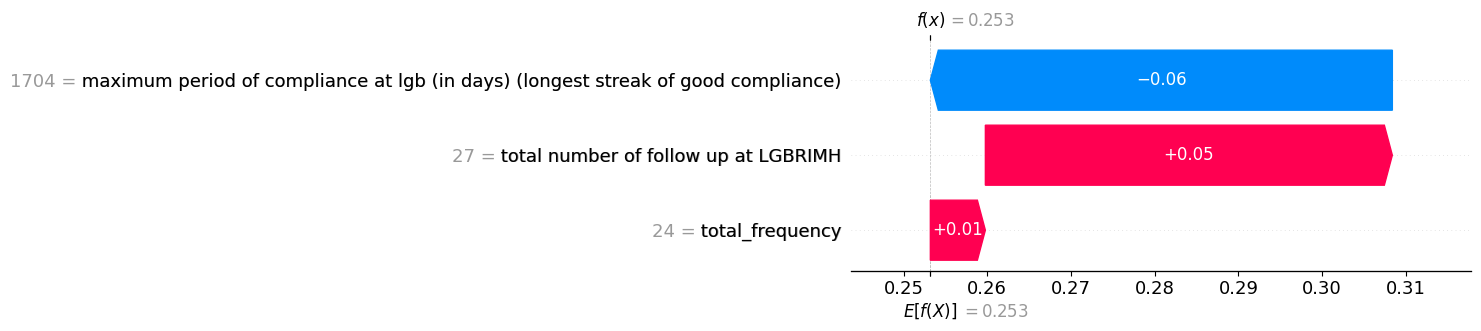

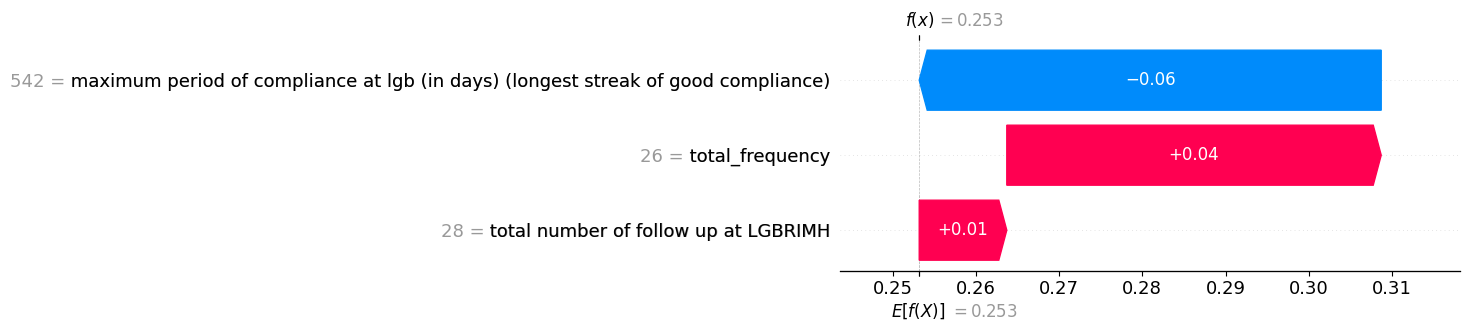

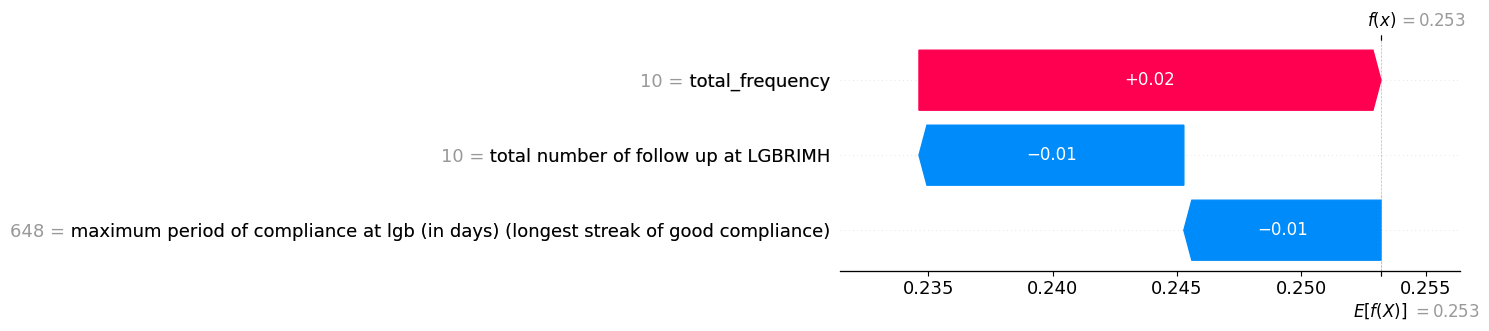

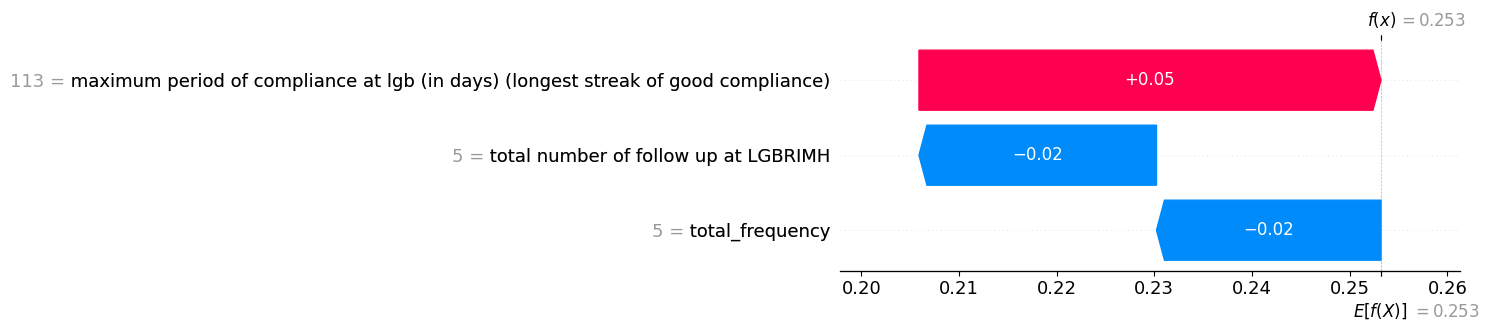

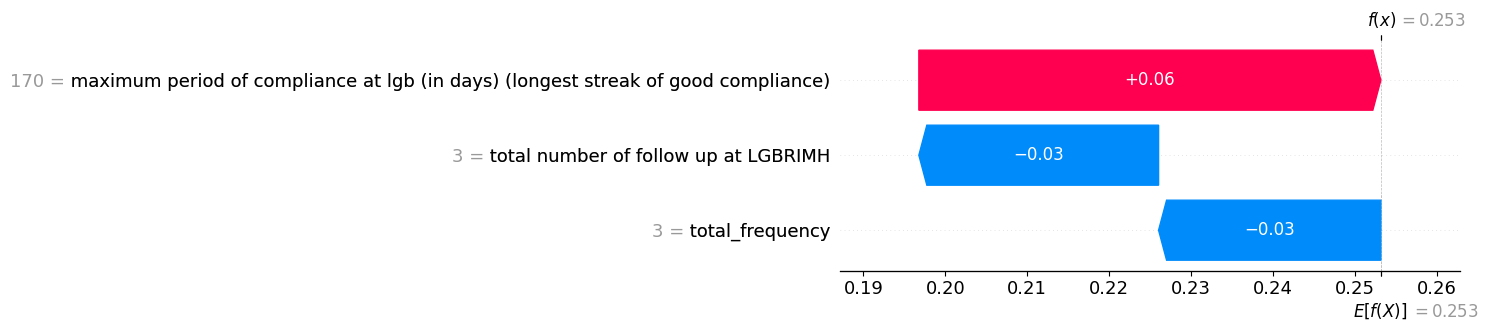

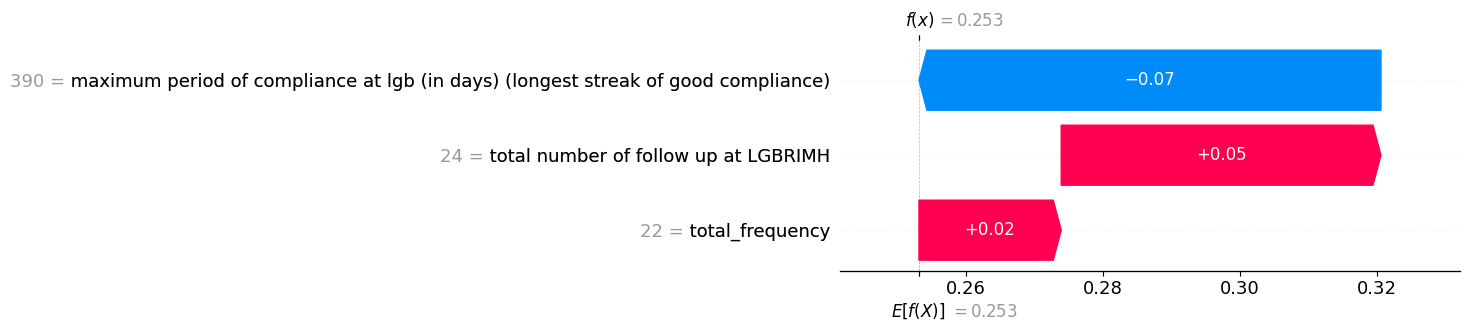

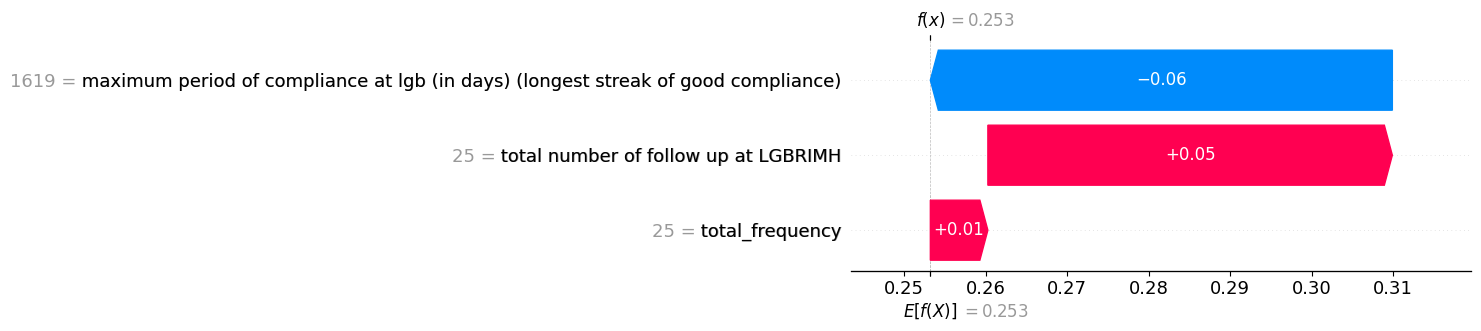

In [6]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier

features = df4.drop(columns=['Final'])  # Features (independent variables)
target = df4['Final']  # Target variable

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(features, target)
explainer = shap.Explainer(rf_classifier, features)

def explain_predictions():
    for idx, instance in features.iterrows():
        shap_values = explainer.shap_values(instance)
        shap.waterfall_plot(shap.Explanation(values=shap_values[1], base_values=explainer.expected_value[1], data=features.iloc[idx]), max_display=5) # Assuming class 1 is positive class

# Call the function to explain predictions for each instance
explain_predictions()


In [8]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier

features = df4.drop(columns=['Final'])  # Features (independent variables)
target = df4['Final']  # Target variable

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(features, target)

explainer = shap.Explainer(rf_classifier, features)
shap_values = explainer.shap_values(features)

feature_importance_per_class = {class_label: {} for class_label in target.unique()}

for class_label in target.unique():
    class_indices = target[target == class_label].index
    for idx in class_indices:
        instance_shap_values = shap_values[idx]
        for feature, weight in zip(features.columns, instance_shap_values):
            if feature not in feature_importance_per_class[class_label]:
                feature_importance_per_class[class_label][feature] = []
            feature_importance_per_class[class_label][feature].append(weight)

average_feature_importance_per_class = {class_label: {feature: sum(weights) / len(weights) for feature, weights in importance.items()} for class_label, importance in feature_importance_per_class.items()}
top_features_per_class = {class_label: sorted(importance.keys(), key=lambda x: abs(importance[x]).mean(), reverse=True)[:30] for class_label, importance in average_feature_importance_per_class.items()}

for class_label, top_features in top_features_per_class.items():
    print(f"Top 30 features for class {class_label}: {top_features}")


Top 30 features for class 1: ['Off-medications duration (to add all such durations over follow-up in days)', 'total number of follow up at LGBRIMH', 'total_frequency', 'Maximum duration of symptom free period (in days)', 'total duration of medication treatment at LGB(in days) (from first consultation to last follow-up)', 'Total duration of medication 2(in days) ', 'maximum period of compliance at lgb (in days) (longest streak of good compliance)', 'mean gap ratio at lgb (total no of months of follow-up divided by no of follow-ups)', 'School Adjustment', 'days/freq', 'total_days1', 'Total duration of medication 1 (in days) ', 'Age at last follow up', 'Max Duration of resolution of symptoms before recurrence/relapse (in days)', 'Medication possession ratios 1(MPRs) in lgb;x-syrup (total number of days when medications were taken divided by summation of total number of days when medications were taken with total off medication period) ', 'Age at onset(in years)', 'Maximum dose of medicati

In [9]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier

features = df4.drop(columns=['Final'])  # Features (independent variables)
target = df4['Final']  # Target variable

rf_classifier = RandomForestClassifier(n_estimators=80, random_state=42)
rf_classifier.fit(features, target)

explainer = shap.Explainer(rf_classifier, features)

shap_values = explainer.shap_values(features)

feature_importance_per_class = {class_label: {} for class_label in target.unique()}

for class_label in target.unique():
    class_indices = target[target == class_label].index
    for idx in class_indices:
        instance_shap_values = shap_values[idx]
        for feature, weight in zip(features.columns, instance_shap_values):
            if feature not in feature_importance_per_class[class_label]:
                feature_importance_per_class[class_label][feature] = []
            feature_importance_per_class[class_label][feature].append(weight)

average_feature_importance_per_class = {
    class_label: {
        feature: sum(weights) / len(weights) for feature, weights in importance.items()
    }
    for class_label, importance in feature_importance_per_class.items()
}

top_features_per_class = {
    class_label: sorted(
        importance.keys(), key=lambda x: abs(importance[x]).mean(), reverse=True
    )[:30]
    for class_label, importance in average_feature_importance_per_class.items()
}

feature_importance_df = pd.DataFrame()

for class_label, top_features in top_features_per_class.items():
    for feature in top_features:
        feature_importance_df = feature_importance_df.append(
            {
                "Class": class_label,
                "Feature": feature,
                "Average Weight": average_feature_importance_per_class[class_label][
                    feature
                ],
            },
            ignore_index=True,
        )

print("Top 30 features for each class:")
print(feature_importance_df)


Top 30 features for each class:
    Class                                            Feature  \
0       1  Off-medications duration (to add all such dura...   
1       1               total number of follow up at LGBRIMH   
2       1                                    total_frequency   
3       1  Maximum duration of symptom free period (in days)   
4       1  total duration of medication treatment at LGB(...   
..    ...                                                ...   
85      2        Follow up diagnosis changed or not (yes/no)   
86      2                                 Family environment   
87      2                                               adhd   
88      2                                        Rural/Urban   
89      2                                          outbursts   

                                       Average Weight  
0   [0.0007146957909792132, 0.04321935578231587, -...  
1   [-0.04102429128283371, 0.042938019571316356, -...  
2   [-0.030443034556156857, 0.0

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8888\251484693.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8888\251484693.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8888\251484693.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8888\251484693.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = featur

In [13]:
feature_importance_df['Weight']= (feature_importance_df['Average Weight'][0] + feature_importance_df['Average Weight'][1] + feature_importance_df['Average Weight'][2])/3.0

ValueError: Length of values (3) does not match length of index (90)

In [14]:
feature_importance_df['Weight']

KeyError: 'Weight'

In [15]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier

features = df4.drop(columns=['Final'])  # Features (independent variables)
target = df4['Final']  # Target variable

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(features, target)

explainer = shap.Explainer(rf_classifier, features)

shap_values = explainer.shap_values(features)
feature_importance_per_class = {class_label: {} for class_label in target.unique()}

for class_label in target.unique():
    class_indices = target[target == class_label].index
    for idx in class_indices:
        instance_shap_values = shap_values[idx]
        for feature, weight in zip(features.columns, instance_shap_values):
            if feature not in feature_importance_per_class[class_label]:
                feature_importance_per_class[class_label][feature] = []
            feature_importance_per_class[class_label][feature].append(weight)

average_feature_importance_per_class = {
    class_label: {
        feature: sum(weights) / len(weights) for feature, weights in importance.items()
    }
    for class_label, importance in feature_importance_per_class.items()
}

top_features_per_class = {
    class_label: sorted(
        importance.keys(), key=lambda x: abs(importance[x]).mean(), reverse=True
    )[:30]
    for class_label, importance in average_feature_importance_per_class.items()
}

feature_importance_df = pd.DataFrame()

for class_label, top_features in top_features_per_class.items():
    for feature in top_features:
        feature_importance_df = feature_importance_df.append(
            {
                "Class": class_label,
                "Feature": feature,
                "Average Weight": average_feature_importance_per_class[class_label][feature]
            },
            ignore_index=True,
        )

feature_importance_df['Weight'] = feature_importance_df['Average Weight'].apply(lambda x: sum(x) / len(x))

print("Top 30 features for each class:")
print(feature_importance_df)


Top 30 features for each class:
    Class                                            Feature  \
0       1  Off-medications duration (to add all such dura...   
1       1               total number of follow up at LGBRIMH   
2       1                                    total_frequency   
3       1  Maximum duration of symptom free period (in days)   
4       1  total duration of medication treatment at LGB(...   
..    ...                                                ...   
85      2        Follow up diagnosis changed or not (yes/no)   
86      2                                 Family environment   
87      2                                               adhd   
88      2                                        Rural/Urban   
89      2                                          outbursts   

                                       Average Weight        Weight  
0   [0.000759500998745736, 0.04385611987778582, -0...  1.052687e-10  
1   [-0.03605546220712456, 0.03842679362563726, -0...  4.03

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8888\2243445636.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8888\2243445636.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8888\2243445636.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = feature_importance_df.append(
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8888\2243445636.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_importance_df = fe

In [16]:
feature_importance_df_sorted = feature_importance_df.sort_values(by='Weight')

print("Feature Importance DataFrame sorted by Weight:")
print(feature_importance_df_sorted)


Feature Importance DataFrame sorted by Weight:
    Class                                            Feature  \
66      2  Max Duration of resolution of symptoms before ...   
34      0  maximum period of compliance at lgb (in days) ...   
63      2               total number of follow up at LGBRIMH   
64      2                                    total_frequency   
70      2             Continued medication 1/stopped/changed   
..    ...                                                ...   
33      0                                    total_frequency   
3       1  Maximum duration of symptom free period (in days)   
0       1  Off-medications duration (to add all such dura...   
6       1  maximum period of compliance at lgb (in days) ...   
40      0  Max Duration of resolution of symptoms before ...   

                                       Average Weight        Weight  
66  [-0.010240796252609466, -0.007924536366277607,... -1.613471e-10  
34  [0.029451111998486885, -0.00574199915270

In [17]:
feature_importance_df_sorted

Class                                            Feature  \
66      2  Max Duration of resolution of symptoms before ...   
34      0  maximum period of compliance at lgb (in days) ...   
63      2               total number of follow up at LGBRIMH   
64      2                                    total_frequency   
70      2             Continued medication 1/stopped/changed   
..    ...                                                ...   
33      0                                    total_frequency   
3       1  Maximum duration of symptom free period (in days)   
0       1  Off-medications duration (to add all such dura...   
6       1  maximum period of compliance at lgb (in days) ...   
40      0  Max Duration of resolution of symptoms before ...   

                                       Average Weight        Weight  
66  [-0.010240796252609466, -0.007924536366277607,... -1.613471e-10  
34  [0.029451111998486885, -0.0057419991527083766,... -1.488306e-10  
63  [-0.027516171666661347, -0.0022186765207528264... -1.341956e-10  
64  [-0.021218889356290224, -0.0032982420000298588... -9.345836e-11  
70  [-0.010030051543902118, -0.005439182509440193,... -9.208017e-11  
..                                                ...           ...  
33  [0.03664816068459095, -0.020830822668591657, -...  8.926830e-11  
3   [-0.03033114716765579, 0.03357526066359815, -0...  9.557465e-11  
0   [0.000759500998745736, 0.04385611987778582, -0...  1.052687e-10  
6   [-0.016999157913207073, 0.022235089580391155, ...  1.182988e-10  
40  [0.014220830861950523, -0.001851352275590762, ...  1.356751e-10  

[90 rows x 4 columns]